<a href="https://colab.research.google.com/github/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificación%20de%20la%20Movilidad/Codigo/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVOS

Este ejercicio se centra en mostrar al lector técnicas para el tratamiento, visualización y análisis avanzado de datos abiertos mediante Python. Adoptaremos para ello el enfoque “aprender haciendo”, de tal forma que el lector pueda comprender la utilización de estas herramientas en el contexto de la resolución de un reto real y de actualidad como es el estudio de la penetración del VE en España. Este enfoque práctico no solo mejora la comprensión de las herramientas de ciencia de datos, sino que también prepara a los lectores para aplicar estos conocimientos en la resolución de problemas reales, ofreciendo una experiencia de aprendizaje rica y directamente aplicable a sus propios proyectos.


# RECURSOS

En este apartado indicamos los elementos necesarios para poder realizar el ejercicio:

## 🛠 Herramientas

- **Lenguaje de programación:** Python.
- **Plataforma:** [Jupyter Notebooks](https://jupyter.org/) - aplicación web que permite crear y compartir documentos que contienen código vivo, ecuaciones, visualizaciones y texto narrativo. Se utiliza ampliamente para la ciencia de datos, análisis de datos, aprendizaje automático y educación interactiva en programación.
- **Principales librerías y módulos:**
    - Manipulación de datos: [Pandas](https://pandas.pydata.org/) - librería de código abierto que proporciona estructuras de datos de alto rendimiento y fáciles de usar, así como herramientas de análisis de datos.
    - Visualización de datos:
        - [Matplotlib](https://matplotlib.org/): librería para crear visualizaciones estáticas, animadas e interactivas en Python.
        - [Seaborn](https://seaborn.pydata.org/): librería basada en Matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
    - Estadística y algoritmia:
        - [Statsmodels](https://www.statsmodels.org/): librería que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas y exploración de datos estadísticos.
        - [Pmdarima](https://pypi.org/project/pmdarima/): librería especializada en la modelización automática de series temporales, facilitando la identificación, el ajuste y la validación de modelos para pronósticos complejos.

## 💾 Conjuntos de datos

Datos de matriculaciones de vehículos en España publicados por la Dirección General de Tráfico (DGT). Disponibles vía:
- [Catálogo de Datos Abiertos](https://datos.gob.es/es/catalogo/e00130502-matriculacion-de-vehiculos) del Gobierno de España.
- [Portal estadístico](https://sedeapl.dgt.gob.es/WEB_IEST_CONSULTA/) de la DGT.

<sub>*Los datos utilizados en este ejercicio fueron descargados el 04 de marzo de 2024. La licencia aplicable a este conjunto de datos puede encontrarse en [https://datos.gob.es/avisolegal](https://datos.gob.es/avisolegal)*</sub>


# MANOS A LA OBRA

¡Pasamos a la acción! A continuación, explicamos y desarrollamos paso a paso el ejercicio. Comenzaremos realizando una preparación sencilla de nuestro entorno de trabajo, posteriormente realizaremos una etapa de volcado y preparación de los datos, para finalmente proceder a su análisis utilizando técnicas de visualización y analítica avanzada.

## 🎛1. Configuración Inicial

Con el objetivo de establecer las bases para desarrollar nuestro trabajo, realizaremos en primer lugar dos tareas principales:
* Importamos todas las librerías de Python que utilizaremos a lo largo de este Notebook.

In [ ]:
# Librerías             ---------------------------------------------
# Utilidades
import requests
import os
import csv
import PyPDF2
import zipfile
import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
# Manipulación de datos
import numpy as np
import pandas as pd
import codecs
# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
# Modelos estadísticos
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

    Antes de ser importadas, las librerías deben estar previamente instaladas en el entorno de trabajo. A continuación mostramos a modo de ejemplo el código necesario para la instalación de dos de las librerías necesarias. El lector deberá instalar todas aquellas que no existan actualmente en su entorno de trabajo.

In [ ]:
# Debemos descomentar las siguientes líneas para proceder a la instalación de librerías
# !pip install PyPDF2
# !pip install pmdarima

* Definimos y creamos los directorios de trabajo donde iremos almacenando los ficheros con la información deseada.

In [ ]:
# Variables principales ---------------------------------------------
dir_data = 'Data' # Directorio de trabajo principal
dir_zip = 'zip' # Directorio ficheros comprimidos
dir_txt = 'txt' # Directorio ficheros plano
dir_csv = 'csv' # Directorio ficheros csv
dir_parquet = 'parquet' # Directorio ficheros parquet

# Preparación directorios de trabajo --------------------------------
dir_data_zip = os.path.join(dir_data,dir_zip)
dir_data_txt = os.path.join(dir_data,dir_txt)
dir_data_csv = os.path.join(dir_data,dir_csv)
dir_data_parquet = os.path.join(dir_data,dir_parquet)

for directorio in [dir_data,dir_data_zip,dir_data_txt,dir_data_csv,dir_data_parquet]:
    if not os.path.exists(directorio):
        os.makedirs(directorio)
        print(f"Directorio '{directorio}' creado.")
    else:
        print(f"El directorio '{directorio}' ya existe.")

El directorio 'Data' ya existe.
El directorio 'Data\zip' ya existe.
El directorio 'Data\txt' ya existe.
El directorio 'Data\csv' ya existe.
El directorio 'Data\parquet' ya existe.


Una vez ejecutado el código anterior, encontraremos una nueva carpeta *Data* en nuestro directorio de trabajo y, dentro de la misma, las siguientes carpetas donde podremos seguir la transformación de datos paso a paso.

![estructura-carpetas](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/estructura-carpetas.PNG?raw=true)

## ⬇ 2. Preparación de Datos

### Descarga

Procedemos en este apartado a descargar toda la información relativa a matriculaciones de vehículos desde el portal de la DGT ubicado en el siguiente enlace: [https://sedeapl.dgt.gob.es/WEB_IEST_CONSULTA/buscadorInformePredefinido.faces](https://sedeapl.dgt.gob.es/WEB_IEST_CONSULTA/buscadorInformePredefinido.faces)

Dentro de este portal, podemos acceder a diferentes espacios de datos, como datos de vehículos, de conductores, de accidentes o de incidencias, entre otros. En nuestro caso, accedemos al siguiente conjunto de datos *Vehículos > Matriculaciones > Microdatos*.

![dgt-matriculaciones-microdatos](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/dgt-matriculaciones-microdatos.PNG?raw=true)

Se nos plantean a continuación dos alternativas: descargar manualmente los Microdatos de todos los meses deseados o realizarlo de forma programática. Optamos en este caso por la segunda, como se muestra a continuación.

#### Parametrización de la Descarga

Dado que este portal no dispone actualmente de un API para la descarga de los datos mensuales, realizamos una descarga manual a través del formulario anteriormente mostrado y utilizamos las herramientas de nuestro navegador (en este caso Google Chrome) para extraer los parámetros clave del servicio web utilizado por el formulario.
* Parámetros de la llamada (*General*) y cabeceras (*Request Headers*).

![dgt-request-1](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/dgt-request-1.PNG?raw=true)

* Cuerpo de la llamada realizada por el servicio web (*Payload*).

![dgt-request-2](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/dgt-request-2.PNG?raw=true)

Fijamos a continuación los parámetros clave para la descarga, como las fechas entre las cuales queremos obtener los datos, y todos los parámetros necesarios para interactuar con el servicio web de la DGT, según vimos en la llamada anterior.

In [ ]:
# Selección fechas       ---------------------------------------------
# En este análisis utilizaremos datos entre 2015 y 2023.
ano_inicio, mes_inicio = 2015, 1
ano_fin, mes_fin = 2023, 12

# Datos Servicio Web DGT ---------------------------------------------
url = 'https://sedeapl.dgt.gob.es/WEB_IEST_CONSULTA/microdatos.faces'

# Cabeceras de la solicitud
headers = {
    'Content-Type': 'application/x-www-form-urlencoded'
}
# Cuerpo de la solicitud
data = {
            'configuracionInfPersonalizado': 'configuracionInfPersonalizado',
            'configuracionInfPersonalizado:j_id131': 'Descargar',
            'javax.faces.ViewState': 'H4sIAAAAAAAAAMxdB3wcxdXfU++SLfeG3JssXS9ustxlS+69n+5O9jmSTj6djAyBBEIJJhB6gNATIBAg9AAJJJSYForpmJJgAl8gQGISaijf7l7b3fdmZu+ejePf9xG1nfvvmzfv/V+ZmZs+lPK7o9KkSHR7nX+nv9e5s7utzt/V1R4O+GPhSGfdqmgotDIW7QnEeqKhJZFg6OSf/vPih9tGF5VJUm/XcZKUJ0mjdU8HIh1dkc5QZ6yuUf7RmnDo2BWRSEwq3ro7+WX8X45Urz7X5Q/sCNV17GnzB0LddYGe7likoy4YCfR0KGPMTXyxMOQPSvk7t4aD9sTzFmki+/kdsY72Vf7tdQvj/xt/0pl+cqd/t7+3LvFICrDylPrI0p5YV09sVag3Fn/SLSX/ZYJ5diS4J/68J/F0qTSS83x4d93c8G6pKOBvDQVCUX8KromHSuSHmiPbIy2RYOKxXDOPqei82cilQHnSZk0JxsSHxR+xZ/9pzkw+rTwhkWXRSFc4koksq3RPKj/JGrEnE8RlO0LRqL8jLA/p784EcPyzfBk/Yrdm/WZ2W+rNVCMwX34sFvW3hQORunCoO1YX7oyFonVd0fhwPZ11XZHu2LydoUBPQLEry7TfzUl+XigxuD01OGe9dft3yx/kj4XqVjetlL9eqXydGMBBHcBJHcBFHcCUzeENkNa90YLJnR+Jdkh5ssnqycR2xD/FawZm0B/zt4dlrVA+ba78TbP8jVSq/MgfjLSkPzjP/Acn1T3H9COOtLqbfiSt5qYfsWf+KY7UI7WCqZKXSoe/Mzi7JxaLdCaeNqWr+BRUJKZgZU+rZhYyQJ5Uc9UIZDAV7sw/KiNbGn9E49nMc4X4o76sH3VmrmZOW+qRLBTAac9YMk5H5o8k1cz8LDtdmUvCnTkwT+afklaMbOTtS2E05zabw53fiz/qSk90ph7XldEsl4eDc8PdXe3+PZp1nSNNFnzogqi/a0c40NTh3x6SKsId25cGetpj/qhmEIk9iGoEWCNBOKZepCQQkXlBZygYiWY8za6k/pWYc4GlUX93LBppCW9P8S/zyu7KXHNdSc3NzVwb0n43Cw12aTQ4Q+vmtmaN2W2jYHbbs8ectHZ5mWN2kjC7ssfszh6zh4SZpFluXzwnQBjCkw4qMxWaJ6lhORkLzaNRr0wfzdyZeqjxhYcaX3io8YUncz7mSbtd049oeFiG0+JNmxtT1n+47Gnawtt7on4lJm3qbFsWinZHOmXWfJzMkBMj5ZtG7nVk/LJeZ+aPuLKXT+YT6PWZfEQ1AunnfMklbd6d+jKPvHyZR16+9CRlSuV8WaUT44+6Mn+3zNmFL6OsY/yRzBeoL6O0U2E8a5hV3inxbEY0OPFMcqpMrd7EMxnNUeKZjCYp8UxGqzDxTEbTlHgmK0MafzazNG/iGZukYQKm1n3iQXvqmUnmlqS/NdSefDjtitWaRjQc2MF8vKkz+ZplbeF2mfjPDfujqVRxJu+aNgWZ8Z3E41momi2pahmodGbZ6MQz3iyeMeslNM/YM0qaJJ7JKphOPJuFGUlllU2lRxPPOFPPZK7N2iSy4OGVofZQILa0M6Sk9VojvVJ5XKVbQt2NnXsiGsGmqnzyF3UrVy9btnTFqkhnYIe/Uw7UJzNKeanPUWp6K3u6uiLRlCTTWqV8iJFqqUYgMYrMIVWYTbFQR3fy8bTNzGztFPsj8dxERkShxB8NdYU7NY9lY2a0We9MJ6YsNTHy/zHFxpNYFstLk/rOxkJllgZPPJNcYRlYKEdGkVTimYyqgolnsrC4maWsE8+kU5MZWyhHFpbXkVFRJP6MM83NM18IzrRi8BaCagTQ1VAZXw2KjVL+P6sFkVn+O/FMtiWXxONZKF0qG26qyJV4JgtG6czCzTuzUDYngVG6smCUriyMUGZJ88QzWRghF40BurKwR5nlmxPPZKEarixUw4UFhcdezG556Qh1d/u3a/zheIEUW5IPxD/QnYU+pdPRvT1RqXpjs/KRde0yD6pb2rpTtjHTznl63ZVV3RPbc5ReJ/nvcnp2SSfKdlL7VW7qq6LUV8VdXdqGJ+XHRd1RqU/6A2ZHIu0hf+dTNdEfvnjZlx/lSJYNUv5uf3tPqLfL0q08UCx1KaOULFzV0rx1duPKpjkxqU99RzgQjQT9sUh3Xa8iC3nUKnXUnli4va45EvC3h078vM+2y6xffJAj5TVJRTv83TsCkWCoWSoMRHo6Y9E9Mamv+qr1CpL6lbFouHP7tGapSPm2R5ap8umV8p/vloMhf6eKvrK361v5X0zKmbdS/k+oOyZJ+hdq6oyFtoeifQ9e9cvPTjrdK79QU/KFkhDVv1vS09Eaip5204XDSy/465lJwV7b1SUPV51+k8Zo1L9H8RG9Jz03/JJH/ZfnKgPmdYePC6kPWI5VIkuL/NA4XFHUROXCSHswFFXyltH1T9wx4/zLnmrJkXKapeJAu7+7e4m/I/muJUqeM6g+E5MGxKUTjtSvDMkSUNJ/re2hab0qRqs+qgztVj5sRahT/pxlsqhDqVYWBXyoMxR9s/YH2zr23fwf9VV7UyqSr3xRqv6nK/2lOvMDNe+nfD9Y/YPhvYjyYV8VpyZGleRCef5b/F35hQcefHjAtv25Us58qaQ94g/O9wdikWiTVBzbEQ1175BF1dvVMEtdDwXHFin6rAwbkwYFlDxwT6cq4vZQrLuupXHF4q1Nc2NS9RSH22l1y7TDsdXhC9i9bUEf9kDjsmXNTfPmysDqwe/CHV3tdXNDbX6Zy8+P/3BMY1dX+55Vke+FOhde9szcaZ0XXaV2Gx47Xhpe3y0vzHCks7te7SpS1C7aGYrFV4MssbMufvyTut7erkTjnl2RSq3ynxJVwDHpGMQ8aJsM5VWXEqUFEW8hsvKL1XkaC6RnUX48HpNTa5t2Og3WJ7Ekb35uzf+9N/z4BclFYolJRVFV00LBNMSEiigrAcg21F63yr99jbIK5/UqrVjdsuSSJlYRaVQaFF8+8l8a/uzYkh9u/Osfvzk3R/2z6tSfpf/iF6fuXfnxhuemq/jkz9caXjhekzzPp00KVr6Vt+9+5aMV2NOP9Ul1o4/vjMRqQh1dsT01afPWMls2j3Uacyf/d/WK5hOkwta46ezq6j12m7SFqw81s+zuWq+tJim1GaMy+7BRyf5Pp4K2UatGoxA1SpSi4tYgFJU1Sfnj6q70Ai/5TpTL7zLaCndcfeIGGeqO8j/T1P82HFsvDR19vFE0nZGk+KuMTlKZh0XSQtE8eGtd7hr145VJYI6fkrhbQbNcK/EqraFXqGRXylrmqNayQPm2WZWKbKvj/1LvKnGlnSOUdk5K2j631+VwehyerXZra6At4HAov5qoPjfpWIc0sV4OTbraZVfSnfoquSJRc2VPmyuPMsgms+ZK6S/uAm9airxVRVYaxn5nl0v7zuOkYenpV7oI0desV18z1dysPLpd+6YjsDcN79aspi79StL94y6r7F7fwnx9ZxtrgcXCsXbBAhsr9ZEXQPf2umCoO7C1Pdz5vW7dsopbf2VZNUuLTOtSzSybo9blqFEBqEtM/wnKwtL0iCtQetPSV/6zw6yEc78DCbttqTXhVf7opCyxHj4ja0Toa0V1QLVBfAUYLVVqpqcjHGVY1cVSUybT76q12a0aE6v9gFHphn0Fw0/10lxhxpIq3636Dmbe61dmPrFVQPmri//npt7vPDxTH9weOzxT76212RzI1CsfkJ56lcRc9z889UGPMvX6fRvKH//mMGrA4cYc8CmYwY4R5e/v+Z9T3JAjW8UdI1Vp9ErZ4MHQ3Mx8lt0uGy0vornqJ6RVV+VF+4666jIJUcJUTVT+06YohG4rj/LTZ/53dThoDaRNrk/5q1dEYGNSsfKC80OBHf6jh9seSuG2q37toBh3qayGUf9sWWsDGSA/PHhdtmyX3zipr7w4ZGYdD5faFLkzFmCLtDiTBeir9fg068/wEaPS270UIIcO4wpkiS8vJT6Xy+ryOT0+51a3KygbL6c1JlV2hGKRYCS1c0w2vdtDMaWnfJnMmgPhLn97eiHKvqRVfhfNHxenXjCtOerK/W/6zWJSf93mtHQAwnqV3KxMiPH1XA6NCclST2qlQdpJDAfnyHO/PRINs7RlvjSXF7rJ3MKuRBWIgmjHTquJ8g6W4rQw0wuwOypVpBE0Rzq3Tzvzb+f8+aej/5IjWRYlc8XKn/aX4v8sR1bedjdd3vFkiUYmK3taRSJvkhYIRO7Q50pYw6elrjA7yyBU6spvShICzTvCAvXRBVonDdG+cYd2YTPkuVCaL5Cns9blwuSpHz0tTiW5YRnHUOKJofRGV397h2xXOxM5w0hHuDMcqdsdqVPs0ZqldeWD/jT7N488nCPlbZDKlG0sclwfkj/Nv0gqCAeVP2qWihS6o3ypjF8pf9/d06rg6pYtW7wOoWTx65VqwjQ1Cxz/l7a8BarlLVEnenzy1xY52F8T2vHwzYGe9kh36m/zGH+bP9u/09/dpf95jiyOZf7orp6Q4Re5MaliVdTf2d0mm0XldYxP5sl2usUfi4blT1d7qUPdXb1g8NI5kc5gj1KDCKUR5mMI82WEc0Kd3RHD5xTIbzm3Rz2rIBgxgiiUSdi83q5QMJxAoP91kfzsitDucDf2y2L52caeWESemp5Qux+glyVQ0hgIhIPKluU0eAsGvkT3t8aRZFGVNnWqv1UEyR+qVP/HxrFkMfWZq6hiTTBUE4s+fLWio6kRc7ERy2JS0ZyHr+7wR8Eklsvec064M9Tx8B2yz42m5GtJ/L5CEX4oFopPoBGLLP1+c2WdDctKvztS09jRqlLhdv4L9mU81dXbe2RNlyNw2H1vLNwVaepsi0Q7Qln7XhfD92rHTpstxZ9ZNClVvReQ+n377bdfH1kxWtsOuxh72mPhjsiS8O4Qy/6LxehmiFE7dlqMSqwZjwGMYoxJEkt+AwhSM8aO6kZ8BcT30yAM5Q9lv0qXYWnL1rBQNgyxPV1qVXu8OmhvF/bviKZyja8X8iovVaq81FRVwN6kpL3p91P+g4VrFd2hLn98Q47NKscy2n+suUj3YeSnvhqBvFTmr9KWdc7XI41mMo+6pMtnKPhyaSlfwe22Wh+q4IyPUXS9Sp0PzQEM+uMYtJo3ECnMKHxEnoKUYfm2SyfMMlWYVcqXyuQXB5KkFVVH3Yzq0yEpqeZ9B5oaZMfnXtH01jJio5rQrprU29fFWZ++iL1Z2iiYXrsyvdoatvlPUqZ6oHGq48vQl1yGPvEyVFfvEpvaeolbEqwT5XDPT6uaH8Zfx2GNJQ/5EL9Ocfx1mgIR8ymgw/0y3iDnZWzJl7GZMJEyy5sT7TmuUSZL0Zh+hbFM5OF+GZ+V8zL25MvYTSuaUt4/enPT5nFzXseRfB2H+HVK1GzjktD2aAbJxmGI/8r8HZwBzJipLKRb77ByMIvmk8bG0/GKELaGo1v9J4w+Pm1eklEro3K9SlohsGneWpvXUK0WfNKoXgznRKm/EFfalc6VZpvClfKlKA6majiTquHU+s++WuYWb/s1xLv56SauFaCJK+bfXhffjBMN1a0MxZQak7zQ9zSqr5FsM1zo7wy2h6JjNH+Q/NVP3r7e4/7e1rlq62NBzB/dHorFpCFqdqG3PtReb+jUmtacyMbJoCyHeokZRmF6xu6rtVntNXFcvByjDsd4qVo7O0nHikKYLc0yBQGZ9ZQb1eie5V86JDOlSTrMnUE1HxFd1tOqZCbU880EMtogreMDdFhrbXY3LiPu5xmkNkUarH07bU4q2+lLQENkpxudJ8Fssqi6ljMUl63W62FolSGNqgPTX7JY8Y+sl6aY+ciEJKy8N844V7BAmif4bHut14m+rj5ZcNjeVf28LN5VHNCL39VRq/gO5F31Eb0ORj8lIME+rk6qNfNxiVcd1dtrjLvTLlV1xgmDqVrz8YyW3JZQbEckyOrJHZxqtjX+3e31T5z5t8+cZ+ckGmhnyJ8xSt92a3xE6bs9/aqGe7dc/5+lib7bnL7HzpNso4/fHu3pisxTfJiScwtE4jLsVki+zorEPQ3i6lO0QlIE6Ze2mnKufvVPlInLEMAoPJuh/JM5fWtEdqyKtebw3iOWGmgLobFjTkotvHy6ZaAxgoyAkMY4ZIfmQWmMJgmA4VgjLc4gvKyRSUeN0lDNcinaOPcE6XhToLMKdEVIFNJ2DCBt+sMPwWmIOn5v+XlcryyXcVMdZbKA6dmO7yLICXgYTawl3bE97aE5yhYZftajTVrB9qvKLGllkZyohprxaoxnV5MJ42umJr9vDneG/OMZAcVp0il85XHKNMTqq0lD5/n8bLEpWjROoEXxSMCVjARcoiBR/++7zKe0BdUUhLkXcidfyC2OeuPpFfvRTK+0tTrMv5sn+W4e8buVy25qYaQjNL8d9D6xnM7hfjWv2/yrJXPtDhO59njuxZ5h7uXwvJMvYP6dkolLhyFxOVvlATk97cYkTE+78rAya0f+TQIeu+k3cSZzlk4r+ibt4Qy2Dh1mLQs4vebfI5mudJpIVx69lFjAHiKlxKZLE2CiSudGBFmxtdJqgROTCbLPxc6K4R+GMzk17BKjyyDsSqBLkUoWGrNak8wLO/V5YcuHhn6VPNOx5WHIRjmVVJDrqGajEhCyy0Zlk0tRdhtwEblkcmWzZZFMmSQNMOgJVzTzpDmmgOAqaEI6hz/v4mKmmY5M3sWVbY7pMORdXPZaL56EPCJ5l/jHZZF3kf8np4/6337ygncK8wwrNVpkMtcRlFpNGUvTuQ4EAz3dcbg5QZv1aBTIt0ib+LJ2K7Gf7bBXyJ3JSp/TRKWvT7xwqQaOc8KhaDR0NGKDQIC9wyf7GeoMUVsY3LZaeTGIJwj7JM4EJettTqd4ghKVZTWSP2ohdyDoY1eWncmkgVOYNPifaGEItLZxXiaZMHCaSBhUyvYwHlAjG3O+q6XjtXPeJpkicJpIEfxP9DAEfF7O6yTTAk4TaYGjF7AFPbSA7Qj3MLg9tTal5va/1sOQwJVdD4MzmV1x6rMrRzcqc3uPeo9AAsJ3F5UJK9xu33de4Y5/5NGpcHus322FO/55RyfS8ti+0wp3/OOIkdZRKSknbN1RLCkPPxzeOmhlR1aCznKnVDP6+GhPzN9d1xNt3+rf0xP0n1Aflpl279ZQt3pgIq4VS6UWgVYYuqL4H6K4lHSTvyuZEnZpUsKGTQzKVQpmdhAjM1MaVq6V6mxUcCgbebe2yi/3ve+iUhEMubOdqRqpLE4S4uLDZ2Wq5OXPitda6zSc9REfzzAByeyqy9B1e1SPTQDC1G4ZVatr2lvL5B/nrjLBt4PpR2JShea7CROn6dTmmHndgYgSg9YocqpRNsZH/e014eN29cghezDCDQUHID/LXH0C6MaoXNXCxqRcf3tMr0m5mCalTuPYEQ6GtnawOWyDNIOvTT57rc1l4LDpQXG6avrTZ0jTTH26/NJmP3uR5NYaIvVuImWXo2yMFIsQ/5j61lhncqYVNajbHm7DV1tICphCiNhA8x+tLEzDVXqKZrdrDWMfrWFU78xLL9M8vRPO9QttJGv5Hh4VDtrZKpzGZ1KDu3dEjqVpsKPW5jHUzNKDCjRY9OliDY5/ukaDRZ/dJLnMqVFLpFuOuwUKLMxDJwBmpMCGT07qr8Ey649ky+3IVmFjUpGy6o9wKtt4FouzVfE3msslFaBnip1NVYdCyjvnqM+FlW3npnMih/sV3MHUISbqeYy5F4rgd+FgS7imQujVbVanw2V3e+yurY6g02Vta1Pz5cnTIadIo9MqqrlgEz0k0qoeEqm9h1N5sct1L2Y5AWx9VX76AxWP+smolmkHPbJZXyAQn0t5q74aAHGOlsyRukzkSMva1ATpCnUMU9b+sL+FH3+LZG7UZSY3qiYTkZdAEBKZO8Dfiu6IMsPcR0kVceOu2MytoU4Gd58jNZrQdPWAFyOFTw6s2Foo4WS61mVI15K4fFYpWiBUf9ZnWqXCIdV1M0TaKDWYE6mr1ms4Ry4+LC7QZJLTxUxyxuWpTStTk5xLpGZzr+Ku9VozTXWy81xuyZnBx5pJd2WTzNTtYeeh8LASX9nmNE2/v0eTA7Nqk2DI0tLnv6LSWP4ejOawGmgezP+5Y4HttafT2zCGSAXhTuWAGl4irPfY6dLUDFZBMhkWH5mb4apSM1wrtI6RaS8OjxH2BLMtUE+QhrPKxttjNVZ9RXq1tNKUxOzWWrfPRGFa/QTUlriTTZxutIkzr7tLQaQlYd+Bq7N5UFftTmbl3IZGTY0jsaS1fbwyiGXmd+FGrFkfqatuaUxPWjDULbJFusQnTzfk2N+JHhym+xBcK5LpNzezuTFOXXOPjp21O1jFlCNtZ+OffERKSGY9rN2pXApx2CpJpt9c/dgjUlAy/eYuFrfIpq7kkhwZfCpSXhJ61l1HrLK0Q2rLxAgcmQLTd+5+QwH8ahAT7neyUmdimQnEA6+T1pgTsLeWs+kPfghubpOtem5Hpk4YO1jo8Mi6rQ13wsmuNbeha+1oO+FQKOsA2SoNM/hHE75qhbTMlIYoJwzgB7gZPwfXjWRbndvFcsWZBnuHzxUpRwbgfS1H1BXFP/aouiLlAAHcCR9JVxT/1Oxd0RFqJ/+eFM5kKRyxrvLv3iG1eg9TPKhZLzXtWceDDleth9VJDj4BNzfJpK7bkNQ9mq7IZcddUTJ16zakbo+6K3Kim9NNH6dgl0bEk4Dh+Hx1b+0KRbsjnepljsEI61wFXcsnT0s8tXa7U59uZH0SXgWcLXlYqhXaVdPWOTUcTHy/TDvchIlptYZpJ/Vt5vd0qi/Q4u+SkSinf0jxf+rhIqyzCywxaTDzU+VPqjP1SWOSP5p3+4WrT14Z/ih+beNWKaetUxqAD647UFu59kOWpCztOiV3Fr/BMjloN2sITaqst1eexi6pM5NpFK92wZTgdiCZtHfrk/Ya2qG/5PM7db5eFu04os7Xq2EdjDbD+OrmeGC1fo67veQS1CuvSRfcLu3MRGlELpiL5bD54MNjbN3sNnszxjZO/nUmUF5NobawWh8nkn+ntdZu87JMrfZzcEM7S1EXc6s6PZjOzMrj5P2EbTYHMsZQnzvn2I2q7euH/UUmlg8dwGj3OqX2TGSaud3TSQi3esnKmptZWTt6Vs/JDLaOpNVz2g6D1VsgOYSWJjU74YhJm7dT2pGJwpi2eRDJ/5jFc6BpMNMWL3WFZ/oeWzOd/jwJO2ptXp/ezGkGx22bV5oiWrktqTEysWmVhmcTtmyxasvKtL/JxIbpHjTarjYpmImgzNsunQRQm+VJVvA8+gre/4bNch4Vm+U8DDZrhjSRZSnSqm3SUulu+harh8hSgc//38qKBIPsTKwgKzJF0t9xjqukNjWiO3yWJ1pvrcfNukqdoZXYakvWoD2GGrQ4P4K16h0eebe50fyIJ1nF9bA3URjzIzkza/gJksOEOOurKDI2VcqNgmYUxGVl3Fsm1olk+cbjYMr5O9+sAkQeUo2dslkl97JU561HKeLkD9LDRjfsB+QFF5UtyQ6ddWGBz+RCnqSW9HXa7Q671+72bnX5ra0+tz/rvUqzpTqW7UwllFcms8x+5m4mpR0hbWs1F7JpDyfN5GNS1/R4lGJOPuuSNqvokrZgLFKXqhvNXbW09a13ykePmHdZjlTQLJX6e4LhmPKbNUtjkrVZuUczPli9drD6xGD1uyP1jeknpjUr1wEnhp4fDuxQR3GZGWWO4TF5qNLUUKaxzEk/IQ9QGOpsV3aVKJxlgvJtNBqJKmPVmhlrXvyv5XEGqzvF9QhXRf3BnoA6srwaZbk7TFyOZ3zJ3A8Hr7vhD1f/KkfKa5ZXSSTYJIcNHeqegcpmqa+yZ13/SOI3JcpvdH9bGA6qf5C6Ok/Rxnr1qknVMsv0NOexeZ01ofYafzQWvxyvxlUTlL9fEfK318wNBaKhWKSmObQ93N3uV+8gc9fbrTZXTU23zCjl92+VdTFUs6snJP8g+vDVnTWBSEdXKBa/kE0dqUV+z27ZMIYj6reqkQxHojWhnaFoIByU/8pfI4to98M3xP8+Et3ul5/oiNT4e2IP39EZ6VAerGn318wNRxXFl39Ws0A5x19GKP9iVeJit9qaUGcsGqqJyIN1Ty0vKS8pnlLT7K/pSF+8pzy5pyaUuARP+U5+visU7Qh3R7rl37SHAyngNYFwNP2U/P3u1PWBMuAOmQBFa8tLapR/xTUyC+iItMtS6K6V5dARjqa+l0cNhAPtEfUBWRniqOQxAv6O1nDiarpwTP6gqCyLoPqm8k81H6bINhBRSbxfnaqoMhuyu6hLvmGrf6csQpl4RBSRKNJSYk15tvzJ4ToUeSofXl4yVxVlKH6Za+LVlInsrlFurZM9mr813K5AkbHLcyxzG3mczvgokd1h9QbnOGxF3LIJqpV/Hgy3qSftxwWs4tFLDLzESkUnOtQ/iwcoKUEruhd/QeWX6Usb1V8FeuQ3VFRhwSoZdRpye6guHoUkr/a0KDn6TBbfmqVfftZT9OzP2/ar665UWUzRcFf8mly7GdMwN/1E3FJp+iUV21zXLPXDLieQXatmdc6OE1H5+UpZ9VujIe0YUmVvlxlrLr+YDs2hV+aN/KGn9aQcKRcxKdBwaN8+8bGquejSXaOpvJRd9Y/FliPvurPmd7xuKU052IT3VsphiPd2KXGAwHszPyntwJXyaP5ChgMXOhLFgWt7P2QfPtfy8ouj95yyFPhw5YMmMD2h8tvJ8gNd0UhXOCRbAtOOdln6CVl/K7o1cJQxHGbGWKl7SB6mWiu6FH3wmhzL+OS03i7jZqkSWbyTTayoeaq01iwd+Pjb0598rPvnOVL+BnxFN6f2LctrqVheS/FHFcE6m6WicDD9vWwUcnui7YlFJnUlrNi38X/fqN/mLzX+/FvGz7/uitMOm4nX0Qv6rF/ec+Zrz855S34psPwV0Igxq9B3o/FMnPI7F9uiKb/2JA0MuClXZ9fzkvZGfku3ubc0qsDKyKmHAm//84IcyaLV8sQ66E2rR3FKPcx4Eo3yN93S99ZJX498WV14ZsxtOJh6OiHGalW4ASPPU36VkKL2CWWQCtkCyULX/bQ3kbApUmyYQt9i0lVzIp2RQMKPM+iG4vf9KjOQ1VgmC52Ky9XxoT013T0Kh4n6AzKde/hmxdL5ZfLj7374ZoUCRuTf14RTV/MqQ8jeu0u9PdlADeRfaYeuU7VhWxz3mBb1dvv2yPaHb/YnWKDMASPbZYKifKtOQkxasrRVZZwKsg6Z2/lljimP29MRiibwKqy0PRRLP1TjD3aoxDSq0tpumXaGt4c7/e3yTGsRDFFuFlUfQz53s3rrc3ylJKhUMBKQP1YRrf4DalXqoh6r4E/I2K+8TVtyePmxrvaw8qg/qhCykA7GQDVZoH5AqNu/XaaA8ReT/bE847sVSft1D/RbIxNKhRd1JwiebP3l2V+7KtwV0U1AbY28AgKh+DzVKlPa2hNVBCjzOn80IP+oKxJL/3K78oN2/3HKZAdkotgZVDig7qOLVnfG+WNMGqShbykeHozoRdx/fo9yFbReYHLMcjnOA2sVAqwOk9CqdOhih6GLTCHs9Tafz1urjGJ3qCKUyX9IWULKu0WVIRJK7++K9oRa/TVxDtruj0+kJtZIo9Cr6TIlpFGGTVJ4VE1/JnP1xIpOqHNEuUdauxg6I8qqae/Zk+DtGpkp/FkRfUDPreW57QrJs9Nem/5lMvqQYwFdNCJ/n/qbdFSie5W+SyLyKumIL7uH79guL+uYZKk5LNdNM7ldIOvDfmxqz1uKkhmT2QweN0uaifE4tz5dxx41zdmUNrH8HzM4m1NUCkqXYuaH22VVWCb/pvOC4fZ133/yzzlS+QapZId/z9ywvJIj3bIj8XfKJqSxc09EHzEoEfX2UFSmSnl++ZcKor3NUoE87uoVzQnnkKd8ihkGJtPI+jQsmUTKw+bKFjWVQlCA18+VtVj+RR95nB2haKQxCSxJJasTv2gJdXbzf9US6k4R0LwOf5f8QZWaD2rxd8mfU9ah/+P8s2RQHfEv926U+skEam64W16yje1KBtYf93TVGzVCitdQZPZnic9PtRmWpHBqnTBeOe30SU2D9r6bIxWijLpvXOhKRJs0XslUjJ5cp6SQGl39lSIFhGnpCoU69hXQ/WWvsoIX1XcF2+QJDXeHOlMo6mV7EVZNTH2Hnl7VtzSuWtE0Z3Vz45ympUvmrdyqfN84u7FOGSUqTTJDjOOv9sHCRz/5vPSiOvVaxSKZ9ag/T7x/kcKCU98rvCRJs4ovVGhWedQkoZsPBff3r29/970Lx8uEvHCRzF39sSU9HbP3xEKpNRNO8Kq9cfKVGCKBTNHuxC+r4/ky3fBJkp5UN1lNlSNDkoRdtXBfzFRfpp8kFf5F9tWhXtmtxLbKgt6q5MqsDpun7rhwV/JvpD46Rvty6ue5McmnZtfqHZz54oyef1FizKv4eOw+HZ7hOjyvKANdlh2U9MAJKH2vXMSF4nZYdVBG6KC8mvp5QQqPOwM8mtETeArfuYWLx2XX4+mnw3Mg9fP8FB5XBng0oyfw5Df/i4/H5tLhqdTheU0Z6NbsoKQHNqk1brtei4fqoLyuDHRDdrNkz1SB3XavDsowHZQ3KFC8BigFkT9xoTjjclQeuEuH4s0UurwUFGcGUJxgggoWnMKHYtUv62Idnr8qAz2WHRSrcVkXvBwRLCO92g7WQXmLoLb2zNXWmpygW3QoDlLUxLiOC16ICkyuQyeQgToob1NMrsMApbhgM19N4jquPPCgDsXfCBoC1k1hcR5fQ6z6JVykg/IuQUOsYAlvOk4AJbWEb9Wh+D8KCqOeVg3u4k+LI6Wn1+tQ/J0wLcD/5Yy/SGBD3EkUN+hQvEcxH+4M16yLJYv3CTMCZFG0fZbAiLl1KjpEB+UDihHLVCAOu00Hpb8OyocU82HL1J5a9TSgUAflI4JRtRppQOGS+QJLZtdBGaCD8k+KObMbbcj5fIfnZtGAfxEEAhhA0YlPCDTWnkBRoNeQQxRlNcqiavM+vrI69Mp6jA7KxwRldWSqrE6bHkqpDsq/CRpiM0IpOLlRwOT1ylqmg/IfCpM3TpBIKh5bSk1sWhSWz5QfVaZQeDJA4QEoDsxwa1EMTz4RT+Vo1Fx5TlfkyembWDQN5hcNOmpGMtHzkb46QFsogjHyETEUPY+v1kGJUqAAHv/ENQJj70uatad0KPZR7LwRRemARwQUPklKCnJ1KB6lUHijhlj+zY/03Fa9LbHooDxGEYjRlhTu45NnT9xrKwLRBXk5jxOUAzCBvlf+xkzuBrC0nCcIsgAsreD8t7PyvDlPHk7PW/DMhQIUeq5YpYPyZwoUo54WD71PACUZ3xU06lA8RUFhNGIl5w4SrBZHclou06F4mrJQjLFuwdcWgeVw6qZlkA7KMxTz4TRAKfr1BsG04E4351nKtBidbukHxwsEkjLoV+tQ7KfIwmjQCz8SxBDxlLXywKU6FM9RZGEMHwqePV2gonpGlqOD8jxFT0H48PVkgUD0aecSHZQXKFIBGefHDwqkkkoPvadD8SJFIMB8DBDYU3vKqj+vQ/ESRU9BPLVymWBakqulYIEOxcuUGTGulvz6HwpmxJmUxWM6FK9QZgTYr+2jBbJIcY7JOhSvUmQBmM+1zQJunOQcBT/ThS7PUGgxWCNtzwlQ6LO55TqBlFKgGD1c/h9aBVQQT2/nnEahgiBVNvhOwXJNefs3dSgOUJYr8PY/OiBAgac/cl6joDDa8qJSfgnRw0LxPmVGAIp7XhWgYMzINxQUxhkp+uhjAYqk6Sr4vhZFbl8KCqPpKp55jAAFXvHIbaWgMLq04tvqBChw6pW7m4ICOJPuG7kovAxnkqtmbt9LofBmgMILnEnB1M8FKPCSS14OBQUI2mxLBSjwYkfeAAoKY7yWf2iIAEWSDBfoqvt5kygojGS4eGhTVlGj9CnFvWea+nIyokbps12E8pPRaglRMMin9DkBRcaFaycjYJS+IKAAAWPhnQGBLHA/In1JkYVxRkqLL+GicDAygNJ/dxFKX8aVmlctCbQTX6nSVxTtNK7U0l/zuZbDngqef6dD8TVFFkYUJedcm1V+R/qGEpQA9vs3fjrDYUvpRbsOxbcEWYCMW+GZV3NRuGz6LFOFLjKx7CKUdoyOVVg5ZyTsLTkEFLD9p+NMAQp8oVhyKSiMKlq+4x0+Cgbts+QRUADaV+TrFSxXnAJb8inLFRCur/aaSYRCFAWU0AjkEG78d1Y5UEshhWRkWv50MAI0SzFlRowo8pcPFDgTPM9mKaE4E9D79IRTYMYZ9qKUYsaN9qK4jd915GAQLks5ZUaMhKv0gyLBGsEDNEsFZY0YZSEmnzjVsVRSCJfRpZUselRgO3GSYami2E6Qof/qS8EaSeUc1+pQ9KGsEZBz/KhWYLXwaoWlL0EvkGoF314kigqKLM7VoaimrNRMbaeTkT6w9KfMCPBmz20XrBG8/m0ZQFkjRr3Iv+92QYCWlEVhvQ7FQAKKLBgfQy8GUbhWpnrhYoQDlsEUFCAceDwmWCMMnzqEskYA4xv5iSAowVMplqGUoCTjVAqjdmUZRtFOozcrGTBS4FMZnn04xacaPXthznCBvWB4sxEUewEC96vX8fWC0S9jOYagF6BfRti/a0uu1AK9LGoo3sy4UgvPfEzA+PCylWUkhfGB3qFb+fVdJyN9YBlFWSOZd7unvNlYHYrRBNsJWmXz9r4hkAVDL8ZQZAEKRiteEWgnw2qNpWgnbDjcKrBaDA4+jmK1QFpp2hwuCg+L/Sp3emdbMALst7z+BoHtZERFEyi2M9OoyMXKX0ykxCNGrmUZUSFgvwyuNYnCfkHmoL6PgOUwOPhkCssxyqJw+j8F9oIRFdVS7IXRpxZVrhToBSMSmELRCxAJXPiiIAHMYHx1BBSA8RV0/UQwI4zemHrKjGTKL1wsn2qlyMJoO4va7hX4EbxbyWKj+BGQOfjkdwLbybBadortNK7UvN4HuShsLK7lUF1LCoUtAxQ2pEVoscCn4oVEi5PiU2GLUIcABSP366KgMFpwy79XCCw4w7O7KRY8081RLhYKD2GlZozCyWgFsXgpPjXzYjvDgvsottNowfMHdgtmhOHZp1JmxGgv8h2/Flhwhu2cRrHgYL/cyzsEKBiRwHQKCiPvzDu0XJDLYaCYuYuQy8mY/bI8ewNFFpl6dgernjqLIAtQT83fsUbgUxnerJHiU0HmoGOKYKUy9sn/hbJSjSynz0/5zb8uRmwm/YPCfsFujlZ+HtzFyhxIFO3MtGnLxeIXZRRZGFH8svFWLQrmplaVEeg2tVqWKQI6N7Wp1Z7FplYjz3hp4x9MoXFANMsTa7bB/JpFR9WgOefXwRSaN5loEi1oejQrFNnYYtIsBY2z3pa5cGBn242f/N2UcJwQzsqEKWkwb0rQUTVofr/536bQuCCaVQkFbjCvwOioWiP7Vbsg9YSbN8sPdhFST0bzVvAf/vkOHlYb0fkUFMYUw96H7jc1MzY4MxclAqgG8wEUOmoGZs7DImdvE2QCA9ugXTAzjELb9ZSZAVTgrocFsmBs/R1FkQXYJNb/JAEKPOGR46agAGvljp/xUTBKXLlLCChAiav8lq/4KBglrty9BBSgxFVZdawABV5Qyb2CggIUVN7iNyl4GSXxXHVPVLZ9/Uanm9dnNx8FI3TIayOgAKFD3m1vClDgVivvOAoKMCNtIhR4+2He2RQUYK+vV4QCp8t511BQgFaJvoUCFHjzSt7dFBSgIXQMfzeSh7URfBHFdmZ6nKSHlYLaTPFmmaagPKzkD+XwGbjN925+MOdhlbi2UlCAXSf/eFmAgtFOtI2CAjQp3M0/yMrDao79HQUFaKaf8Y1gjeArNaeCskYybTNzMwpt0ju7CIlzkBR8poaPgrXf4xMCiowbNtys6KiIgAJGR1/dLZAFIynYjyKLzNuJGE2QMygojNqZG6wXeDPcj+R9TPFmRj+Sd+CnAhR4sjh/CAUFSMd9MpGPgpGmzX+agAKkaXOfDHJR+BgRYsGNqjlNofBlgMIHIsTChk18FIwCbOH7BBSgAFu46iEeCpuVIYuij9TFG5OmJvIHVvMwkoNqg7PNc/kwGNnikp0UGCBdfPurN5nJp8QtjS6fUnpyAsisDICgw2rgFG8cw5WKjdGhWqbSrslpqWRQHk8OqoFRdeULfBiMyLnsEQoMeJqaj7sTx2Zn1ITL/rQrnqFNwjCToTUMqrWkjxcIrAfOQgvsFOsBGq1q+Ye6+hj8r+ABCgpgz6Pcw/7khY7Lomg3yXoAYdi4nVbyE3iQVHQ7CQY4s2H3BQIYOPcq2keCAcjX0yUCGLhqFOeQYBh1o6h1lMCk46y8+E2SSQe0fD+388xmY0xKyacU4wUn5csFAuOFr5Syl0jGCwSvl3J3P8tP4MFr2fskGCB6vYN76o38BJ5PKPuGBMNIfnLu/b0ABl7EKZ9KggG4+T/eF7BivG0gv47Cio3uNfcdfuuul8FH80+koAANgc385gUfw8kXjKD4NdA0+yf+OVk+xjIpmE9BAfKg38zmo2BkFAoXEVCAjEK+jX/6jo9hxwtvocQpoKq33y9AgVPhwm8oKEA97eF3BT4Nb9Es/pjk04AV39IggIHvASmpI8EAmnHpyQLXiq+SkvtIrtW4THKf6BTAwPlO6QgSDLCd8HPuZhQ5rsInpSxKgQEnReIeBCS7H1wa5a0kn2aUxoHNusvTmJ0JHhBJ5927K54bbjCfG0ZH1XqVP5QJfBtuPfLPo/g20Lly7cUCFLiG5F9HQQGY6OV9BSjwanz+fRQUxhnJbx0q8LA4AyzYQPGwIDf77K0CFDgBLLiIggLI4hb+diUfI1te8BzFz4PrBXM/E6DA28wLoxQUICs6gn82u4/RKln4EsXPG11KyadnCVDg6ciiJRQU4DzMs7iysFkZ1fjiFRQ3D/dDb+ee8Sw/gbcyFX+fBANkV67gdtzJT+DVnOITSDCMJqPkH/zDa72MBp6CEoL5hA08sW8FixUXRuEoymI1yuL7IXPth17g5AvHJqTRYF4a6KhaBZn3lmDR4uS88CHKogWHGw/n78P1MUpcRVMpKED74ZvcGx1kvcbLfcV3kxYL6A94nnuUghxT4JmN4idIgQqooxRy98zLT+BOpaSABAMcIHANt3NEfgJnXiWzSTDAaU37+bphY1CvkqdJ8RKoPNZ9wYfB6LsrnU+BARrv8v/wngAGnmQpfYAEA4RtVYIuAUaWJX82hZWDZPlX3Pq8zcrgw0UHKBoKL098iLs3WTY0+JwUn02yXsY5KR08TrBecVNesoa0XgElXscNXuWlhVe3Sg6S1ivgX3n8ZLmNEaWUOkgLBYQpJV0CGHg7TelzJBhARR/lHrwnP4FHS6XvkmCA87wmPCCAgfv50i9JMICfv5C7adxmYzjYMjcFBnSwG64XwMBLGGWLSDCMnq3srrUCGLifLzuNBAMkvVpO5bsUhormFxBcCtDQvGf5N1j7GG6+4F1KpAK8fIh/+p6PEcMWuikowFlvLd8ToMBtV+EWCgqjXlQu5+/k9zHaeYqCBBSwm+cU7gYpmRXghb6iEIlqGBXjymPOMBXC+kAIW7w9IY4G8+JAR9Wg6TPzV3yhMKam5ESKUMDc5J7OvatZdsp4s0LJ9STGAcpcN3O3kMt+CN8TU7qB5NwAjAPcVSs/gafhSjtJMEAazsK9i8VmZ/CvcrXXKtvCDuRft90vgIHb8/K9JBigHnx5+giOvwIYbiuLFFfadknpg4PcGRwclBpTi+KH5/NRMKK2qiYCClgbP/dYLgo7QxZ9enbFt/UnUJifkdSYWvJVs4KPgqEYfT4koIB6sfhBAQo8dOwboqAAR3y9NEqAAqflfa+moAAdeBfcw0fBYOV93yCgAKS8rHGVAAVee63Op6Awaufv3tPNCMPPu5HDL/rNS+BoMI8DHVWbkCzmHiUqL3GcmlcMIBlRIzcvu4i70dJmZ2TMK1ZQYICUeemj5whg4HmWiutIMIzSqDh3gAAGXvSruJcEw7hqq67w8GEwOGDFUxQYkJ/3XSJwsPjGkMoOioMFNZ3wjXwUDO5VeT8BBaBeBTu3Cdw8bsKqTqO4ebAN49/NAhS4flY9SEEBitLWM7ko7Iy4reprCtkwuvmKR3sETgWXRXUjxamA7Q+nFAlmBLefVZspMwJ2P7zfIpgRvOOrz58oMwJkcf4kAeXBw5M+r1IoD4hOjp8o0At8Rvo+TtEL44yUFM4QoMDzkH0PUVCAAtvDv+aicDDaM6tPUH+UQmH+TLzUmFqqkzeXj4KhF9WfEFBAvbjlIwEKvF+in42CAvSOPM7XTgeDkPcvJ6AAhLz69x18FIwOlv43E1CADpbCpa9yUbDO9B9wuTLGYykU5s9KdCNn+hf8YZYABU7EB3xIQQGuX+77tSAcwPPCFTmkcAD0IV7ThysMG6P6W7meQvkAimufFFA+POtXeQOF8oGk35oqAQrcYFTup6AwGozbn9LFAsz9yDBqrXwhoRqzMlANdFjt1Lz7IwHTwPPCffpQmAZAccIYAQo8MulzGwUFiExqT+KjYFSU+i6n8B2QgDznCoGPx2ekOkzx8WCxjNsnQIHPSPVTFBTAiv75PT4KRuqv30kUHw9uJzz+NgEK3Jb3u5CCAvR47XULPApuvsr3kTwKOLGpaz8XBut4/zL1fKCsK+FG9nfT3n6mzCg8JrP88QSQWRkAQYfVpt1e4F67a2PlZStWUyYH8MD8lje5mspqwKtMHh2alYsDPPCYdwQocDta+Q4FBWhuCuUIUOAJ+6qRFBSgjWbfIj4KxnKpchFQwPPDLz5dYM3xDE/1aoo1B62IC3cLUOBktPpeCgqjHS2uzuOjYBT4+r1DidhAtsvyNR8FIyXc/xJKxGbUi/yn1nJRsO5X7f81IVaC96s2c49fke0cPiMVDSTjaZySom1tgqWK7+WruoSyVI1ko+zTPwpQ4JWTqt9QUADi9a5dgALvd6u6lYICdGRO7OWisDPixr4WCiEHqb/e7wkMBp6A7PcFxWAAQj5ivmCp4ia8/4OUpQrWiOf7AhS4CR/go6CAnbrVAhR4cDKghYICbMh57hpBogknWwN6CCjgxTUf8d2Zk7FGBpxBQQG0czb33GcbK3QuP0AKTsB27B189WS1cFdVUDgfyCMc5PMc1ok8fcYSzBbI0l856DotCmZ7BIyQ+vZPSKPBvDTQUbUKUvWswJTjMXTfPRRTDgzHlVcLGCjOd6rPpTBQUDOo/aUgn4Brab8bCCjgjd3/uEPg1vCKVv+RBBSgolXw2kq++WI0ug3oQzHlRrtRvPg6gRHFcysDbqMYUaMsns992NSKhffnDLgzMScN5ucEHVXr6mddL5AJbtIHvEaRCWhBPGO1wLHgGcDyj0iOBVyO/Ai/5MnaYFk5guBY4P5K/2SBY8FR9PFTHIsRRfHf7+ajYJivvmdRTDlo7Xr9X3wUjGitejABBYjWigYFBA4Fb9SofoviUEBX6AuCIjSDifYrpjgUEBvcfZoABW4w+nVQUIB7DSxP8FEwEm79fk9xa+Cc8pw/C1Dg8XP/hRQU4KYJy4sCFPga6b+JgsK4RnL/j19WY13k2H8XBQXYVll5tgAF3l7W/1QKCuNKLXtxDReFk6EXA88iOFWgF8WzmrgoXAzSNWiw+qMUCvOXF6bG1M7I6fyQgHWp5aApFBTAgr8+nY+C0bQy6BMCCtC0UvRaJReFmxEyDvm5Kp4UCvP3GqTG1PILG393gZshi6FjCSigLC52C1DgZHyoj4LCyHJe/0RXPmKScXhD4tDklcAN5jUDHVWDZsBTF/BlwigXDOtPkAkoFxQX8X2rh5GDHDZR+VFlCoX5u2FSY2r14ydfClDgdmPYWRQURrtR/HKrAAWeCR12NQWF0ZKX9GvgWy8G2xl8I8F6AbZTdMtUgfXC87FDXqRYL1Cz+ILfZca6rWdoD8VugPrN+B/zUTA6AYZeTkABGgGKpahAO3EPP2wPRTtBWsW1UIAC14thd1FQgHTsP/h5etYdpsPeIKCA0dEivlfzMPL0ww5RUIBdagP5Gws8DA8/PJ+CArSp5O4UoMA9/PDBFBRGD1869hTBSsVt59DzKSvVaDs/X6xrzWDyDDfgGcPrEjgazONAR9X5k/cFM4PH8MMbKTNjtBslP+wviJLwhoCBEylRElixD14uQIFvERsYoqAwyqK05mIBCjyGH7iHgsKoF9UB/k5wJyN6HngXBQXIc330FheFi2FDB51LidXAcZAL+FsHnYzGsoEWgizgTvCXHxLMCG69BvanzAg4VmQhP+fnYjQrD3yDMCOgWbng2n8LUODR88BDFBTAq71wnAAFngsetJqCAjQcnsPvYnIyoqMBYwl6AfzI/iF/M+XVnMCrDS5O4GgwjwMdVct69s0R2A18xQ4+iWI3jDNTvu1CPgpGDD+kiYACxPDV8+sFKPCtYkM2U1AA3zqQHz27GZmEIbsI3AtmEt7m64WbYb2GnEpBAaxXpEKAAl+xQ26moAAVzjsXC6wXXlsclE+xXuD0/v+8JFipeAw/eB5lpYJTQi/YwEfB4FyDvyCgAJyruOw8QT4D32Y75GuCXsALK9f+ToACjwiG+ikoQERwNT9L72b0YA49lxKrGVeqZRJ/I5CbUfkeeh5FFiDP9ejfBLLAo6OhF1BkAfoON/GPa3AzGrqGXkiRhTH/WTTwVwJZ4E1MQ2+jyAI0dGmOX8RR4FW9oa9SUICq3otbuSicjDUycAYlIjCukcob7hSgwKu9A6+moAAHLL/D39bqYtjOQWGKHwF58c9uEqDAM4+DTqCgAK2Xe/jHeLgYK3XwegoKoJ3WXAEK3HYO7qCgAHrRxs+LuxjZ+cH3Uzw7uIvGyt8g52JYrcH7KSiA1XpouQAFnt8a/A4FhdGzl7U7BShw2zmknIICNAZfe6uAg+PVvCEPUjg48Gb/fEaAAs8gDHmPggLEqdVhgTfDLfjQDynezLhSq/YI2C8j4zjMQkEBbgD8Ff/YHw/Dag0P7yLkw42yKD0Y5KJgXUAzSmW/T6VQmD/e2Y1cQFO4mZuVt1kZ3mz0SaqbTbTiujM5yTg1qNaRLP6GD4NBf8e4KTAg/32Pu0psrNNExqo7XianYWTQEmyDx4kUfsPdS2Bj7bUel0OCAXq5fjBOAAOP28cNIMEAIfPkfgIY+HIdt4IEA6yUVVz2aWOdITyujQIDFrD+eKoABh4QjDuOBAPUnEdz+/yYN0mMO5sEA7SVVfHpjpdRJBihJoHfSxlR83cnpMbUqsaP+KdfehmNGSNuoKAwLte8Yj4N9jKW6zGnElDAC5L680+/9DFkUfMqwa3BA7+/+IyPgmFBR95FQAENaCufdLEuyRzVSHHxQDud3NKmzcqYkdHFFN8KO4MLHhUwDbxeM6aCxDSM5K/43qUCpoEHSGOiJKYBFHQwv7vOy+Bdx5RTFiu4buXLGB8FI2at6UNAAbcLXrBFYDLwOG2khWIywFFMS/nd2j5GF9XIEMVkGBdrRetYgcnAI6RR11JMBjgkttAiMBl43WjUJySTAY6l6vyNwGTgzG/0lySTAZjfQW4EL69ufJWM2UIyGSC1cw+3jCY/gRewxpxGggH2VhRXCeg4noUdu5tEx0EatvUFAQzcgI7dS4JhtKClE37IXa8eRlQw/Npd2ecSQFBQspx/IqiHoRrDP6GggHdjLhD4NDwnfcwlFJ8GziW9kb8PinWd2jE3U1AYbUbuNx8KPCseph3zHsWzgi6EzT8RoMC9SY2fgsLoTS5+SneaCbNvCF4/PXJPAkeDeRzoqFpr7uZzHtaV3CPPovh5kOK53Crw83in36h8ip8HfQA5XwhQ4Fo6agoFhVFL7w8fMKUf8G630TclcDSYx4GOql0zZ3M7d2R+gFux0e+SSAcorf30eb5JZ4RLw08gmHQQLZWcwm8F9TDUdPi5FMdiVNPynGMEKPBy0ohiCgrjjFTM5h8Z5mEk7EcMp6AA5usP/LMnvYz2thEdBJMOz3Ze+oAABb4JaMR+CgpwWNe+VwQo8NLaiHcoKMBNK9v4euFlrNRjHqQQDoDiT/ztN15GrumYrymuHpzTP36wIJTHtbPmNoJDgdpZdwYfBWNLwcjlFBcPjk8b+y9BEI2nNUbbKI4E7ib9hJ+E9DB8/PB7KWbLKIz+g/knYHoYTHSEjYIC+Paz+Pf9eRmKccxIylIFijGH32XnYWRXhoUIsgDJlXdm6XZQMlmXB7CuY1wJHA3mcaCjamVSM1tgvvC0bM1YivkCe1ur+Ufnehnd/DU9BBSgm79o1HMC84UXckY+TjFfoHf8XG5RS6aseD509A0kHgwqfJP3CmDg4dro+0kwQPJtSyEfBoMIjxlFgQGYcNmeIQIYOBMecykJBsix3PmawJrjq3X4QYo1B4fBt74hoH/4fpMR6yn0Dxz63XiVwGbge29qzqDYDNC5Mpqfe/MxZFFzOYV4ARQl/L4/H2PXS82HFBTAcr3NP+TQx8iGjgoTUMCdHo+fJUCBL9VRJ1BQGFdq37LP+SgYHm3UvQQUwKMVPsk9wldmrbhejB5OosLGKSm4nnt0mmz28dLF6A6SLzFKo88U7jnsNivDYox5mQID3uz2JNeI22yM3pkx3+wiVFDgkaQVlwpg4Gx4bF8SDJCQ/Zaf6fIyYIy4kOJMQCn8bX5o4GVo6IgvKAEKuFnkTv5xN16GAa3xUcg4KCc99ReBM8FzTCP7U5wJOGhmF59k+Bg5ppETKShA4Dp1piAkwHNMIw9RQgJwPEHsrwKXhhc7Rw2muDRAMsb+V+BMcLs16i2SMwGdGh5uhU9mzXg6eMwtJCoO9HPZJQLziWfcxrxPMp+g0ni2yJngya6xS0gwQBrhCu5NzzbWbehjgyQYYFLyuN1d8hO40RgbIsEwrtcHh+ruhmeleOL2X5fiGbsvoaSzMlBSdFgNnNIH+K13rCuBJsxXfmRLSyWD452RK4Es1b8QwMC924SLSDCM7i3vvXTnyFsAhsfKWrgT1S0PydPHPRmcPp4aU7tg9u3jo2D0Nk0eQEABWpuKt/YIUOBTMnkmBQU4IcB1HB8FI1aafBwBBYiVCm7+PheFnRHJT75GVZUUCvPamRpTqxd1bwtQ4No5+W4KCqN23nL6Qi0KhgHzINed1J6YmJMG83OCjqqlPzO+5suEYb+mlBBkAnu9ds0ToMDrOVNGUFCA+7M++J4ABV5unGKnoACt7fdzqwY2lpaOH0Ix5UBNi3u4R5gx77MY/ykFBsjYlx/L7aOWfRDOSCc8R3JsoENh6Z/5ZpRRZJv4PsGMwgPddv+Wr6CMNp7atwkKCrp4yqZ9IFgmuHudspCyTIzutWLZOwIUeCpyygYKClA0+OZVLgrWfaVTTlbGuCyFwvxh/R7kvtLCpt0CFHj0OOUPFBQg6dXFvbPKxnLy4wtIhguE0uFiAQfFtwZNjFI4KNgLs6SFr56MKZn8BIVrgNaVv84SoMBDx9ohFBTAeL69VIACjxxr6ygojIFj5eyrBAYD9yRTOikGA8jilAsESxX37lMuoixVkNmo/UKAAq9dTHmOggLUtKa8LECB51emvEtBAdIrT/K108EoxteNIqAAtfiC/g8IUOCbO+sWUVCAM3zP+bsABU766rZQUICznd/j7heTeRFeiR93zy7KPmywudPDvchWJqt4fnrCCBIDBu3K00oFDBgnOhMeIDFgsEwev4mrGqyS1sQtFLdqXCb5V9QKeDheS5r4EIWHG9MZlj+2C1Dg+7QmvkRBAVhf/kQBCjwamLSXggLoxaxWAQp8a9KkKygogFt97DMBCnytTrqdggJUtB7aL0j54QmEyTkEFLBf+RdnCugW7lZrCyh0C+hFhK8XdoZbrT2JgAK41WI399JpG+uS+nFPkFwJuAPSJoKBdwqPe5MEA2yB/hn/uBc7o/1x/HUkj2ZU0LKLBgg8Gp7tm7CB5NGMJLhsKvdGXxsr3TehkwQDnMb+vKBOwOBck3ZTTBfg4oO/EpguvBd00j6K6QJdwl3TBShw5jd5EgWFkfj1eX0mHwWjl2ny2QQUsPvxfH4GwcFYrHU5FC4OkjqDRgpiNDx2r8sloACxe+GLfKrjYNC+ujyKLEDH329XCWSBZ1Pq8imyMPqS31tO06Jg1o/soH5UV5FwrQ3mXSs6qlY/bpEEM4OT0LooZWaMZKPfj0v4/pVR5Rz3McW/wjLnP9u5MFiJrvE/pHgUsFqKf1QjcPN4LmH8QZKbBxtPvuJeZya7QtylTLCT/CvoTG1ZJ4CBc68J75JgGCdFKr+ID4PhVCaOosCADbIjrQK2gXuVid9Q2AYIUdY+KwhR8Pzj5I8pIQrgPKuHCUIU3KvUzqaEKMBojPxQgAKfkdqdFBSg6vyEoPbNsBm111FQgKqJrY2PgmEyaj8loAAWo8C+n79UGRWk8XNJZhwIo3yYAAYex49fQ4IBSpz/5G9WszNK3+PPI3kTQDRusAlg4PmE8feRYIDju97iHkhpYyXdxk2iMA14ksYH/F0frBa3cddQYIAi/FPP6nSD2YwJe5nG358AMisDIOiwGjhVZ3EvhZTdIU4DJ3xJ8rEgii38mO9jGbXfiYsIPhbUfvM2zxCgwMnoxEspKIy05/lhz5rSEBitTLIkJmVWBpOCDquBUyJ1CBIMeDFl8gqCUEAtpejUU7goWL1VtfdRnC1oDZ15Cz90Y+S/6t4nhG4g/dWnZy0fBWPN1rcSUIAlW7VtHReFk6EXVoWQpi6D8WRwGUxqTO2SbecbDtYllbbZKhdJoTB/xYQHuaSy5Nq+fBSMio69k4ACVHQK3r+Wi8LNIGGO09SoIYXC/LUKqTG1HOxPd/BRMOpKzt0EFKCuVPoGv2mEdZGW8woCCtCkW/z9vQIUeEO78yMKCqPVqmo5T4ACD+ddkygoQELyr4O5KDwMF+9S/UhlCoX5wwJSY2pnZNccAQo8QnBdQ0FhsFqWwsk3m0pIwovB3cMTc9Jgfk7QUTUyqf62D1cmDkaepf5Mij8Ba+VX/I5M1uW29QcI/gQmOP7o56NgJDisAwgoQIKj//LfC3wrXoO1FVB8q9GflK0fz/dqDOtlf5fg1YD1qrziQj4KBttxjCKggAHK3jEC34prp+NSim8Fh0nccK7At+IpJ+cSim8FHv7K5/k2lBHQu+cSbCi8HvKOfwhQ4JzLvYaCAlzY+evrBShwtuPeSUEBGt6mevkoGGzHfR4BBdySdMUZXBQORkRQP44SHRn1ovw9vr1wMNhO/RIKClBQms/vrnIyuHj9Poo3A/Wk7kv4KBjJYetxFD8CNvxaJghQ4C0K1icoKEBv6lM3CGI03LPbnib4EeDZS37M7zRjnaTrPpGyUoE3O4PfHOBh5ELd91FQwMTwIAEKXC/cT1NQgAbuy/4iQIGzHPdBCgqwaW9qvQAFbjvdn1JQGG1n5dd8Ds4629hTQkFh9Kl9bzuJj4IRj3jsBBQgHsm/k89+HYyVWncLxY8Ae/E5v7HKwVip9dUUFOBUpA9XclE4GbF7/RUUbwYaq37JzwE7GWU16zwCCpAPzx16jwAFzn6t8ykojCtV+iM/v+VklMCtCygojDPyn3HHm8pjOEAew7o4oZ8N5vUTHVW7Yg/xs21ORkRgXUGRidF6Fb3HbwtwMXZ92HYSeAa8M+mn5whQ4PzTdiIFBeCfx7wu4Fz4rg/bQQrnApmlV2ICG4o3T9e9RLGhoHc6tlOAAvet9VMpKMCuj8cX8dcIw59Y76ZwcbDHYKRHoBe4Jbd9StELULVZu16AAo/d7T+ioACR4up/CrJseE3RfiMBBagpll10ggAFzsXtz1FQAC7+JT8772LE7o4KCgpwvt3D87ko3Ixd+Q51Y2m2uT5wzIyPHx25GZVNxxYKCnCmSV5IgAKvlzhuoaAAvTtl7wtQ4G3kjocoKIDtPINfJ3EzrJbjGwIK2NV1E3+XmIOR66t7iOJHgE/9cAkXhZOBwno2xY8YUeQd5xBYcDwfbrdTLDi83zdXgALvTbHPp6AAtQH/+QIUeFxi30BBAbLyHywUrBE8LnH2pawR4M3q+RkEN4PxOW8noACMr3Q7/6QbN8OzO/dRUIADSqNdAhQ473QNoKAw2s6BZQKfyqjiuWYRUMADyJ918TNLjHjEpW4qzbZaA2znz78VZFNwn1r/EcF2Ap9afvbnfBSMvKf1TYoFB/X2+/8liFPxzJJtDcFqwczS5/wqnothL+wXUXin0V4MOIl/FKiLkfd0uAkoQN6zZMsUgb3A857OvRR7AW44GcDv63Mz8uGuHAoK4M0+fIJvLxi5HFcbwV6AXE5x60YBCrz3wHU2BQVYqXWfCmwnXj9zPUGxneCq0pH8HkcPg4O7PqagAJmDQfcLUOAsx11AQWG0WiXeNQIU+P4O9xAKCpBpvImf43My1kj97RRvBtbIhuP5KBie3TqJgAJ49qJCfu+Bk5FRsrZRUIBOy9n9BT4Vj5Zt11F8KsiDL7tLgALfTGG7j4LCKItHnToOzqxQOEGFwl6WmJMG83OCjqqNCA4JPDwj+2p/gMIzwIp94aeCbAo+M46XCL4VzEzJyh8IIkXcejnHEVAA6/W562RT+uEC+uGcmJiTBvNzgo6qlUk+PxfsZmQSnEGKTMCNK1fxj1fxMuITj6ql76VQmL/3JTWmLrdTwEfB0A+vm4ACnoZ00h4B98LraK7jKNzLqBfvv7TAlJbCSzq9vgSOBvM40FE1aArqLuPKxMeos06dqZqUlEzM3/+SGlNrxUa/y0NhszJ4xzR1K3ry4hVPJhevpAbVwnBwt4TZbIwU5Az1YLvJaRgZ7I9LDqrV00e42T8b60ikGe+TYIAk5FRuSY2513fGNyQY4CS1g9x+WBvraKaZ4ygwQBBbPI/bWiY/gSfJZ04lwQAR/VaBbjCyGzOXkGCAE3R/y988ybrb1/sNwaCDEmPhfn75xMsoMfomUlAYyU/Vo7fxUTBSPb4ZBBTwvKwNk/mGnOHcfHsJhhw4t6KHuDedyDYXRzFtDcmQA+7VcDcfBsNmTO+iwICJrx7uNjnm1b7TXyDBANnh/+Med22zMvL109+lwIAJ+9X/5psuRhF8RgXFdMHrkW67WQADZ8QztpBgGCeldBu3oGRjHZY6s5VkyEHeaQF3/w/zJI2Zu0kwjMwr77FNggABpzzeLZQAAQRLJ/BvSPIynKv3IYo/Ab71FX6p0cvQDO9LFBTgRKRd/OKvj7FMfLdT/AlI2heW8lEwknBTV1DCE9BEtLOIj4LhTqa2EVAAb1J56QABCrz4O/VjCgpjqJb/YrXAw+NWfNoQkocHVtzyKB8GI0c87T4KDJgkPsRttZOfwMPn6fNJMIyTMmBkp8DD4xR0+pckDw9O13uXWwBmXj89YxTJtYLj9eb+mG9AGTlzz3MEAwo7zKpzBCjwzKznXQoKUD+44ROBY8XXibeC4lhBcNIicu94KsEbpaAAua5Zoiwkvli9p1FQGPWi5NOr+SgYbNw3lYACntV6A/+qEx+jDu27guLeAeH6Cf8WM9Z94L59FBTApXXxc+Q+Rh3ad4iAAvaC2vgVYB+jDj01h4ICdM+8UCkgGTgFnno2hWQYZdHvHBEKPLEzrYiCAtC+vtzrw2Q/jM/ItIMk5w6Y+Gv8zc5eBuPybKA4EkC4/rZNgAL37Z5OCgogi418s+VlNK54vqSYcLDlegC/JdXHKGdNHUBZqsaY+br/051NzywkeUEhaerghDQazEsDHVXr1ob8QbBk8RbEqU9QlqzRoRRNOl0QneBubdqFpOgE9Fflc3tH5EWOpzOmjyBZDgDjTO5WC/kJnHZNt5NggCD+5hcEMPAgfvoGEgxAhd94UpCNxfMq00+mwACJlaKv8wQw8Izb9ItIMMA28IH8o/28jI1RnvkUew7i51P5t3x4GYVfz8kUFOBatRnXCTJueG3PewsBBSjtFXwxToACVwzv+xQUQBZN/BZAH2NGfLsplBxo55hfCLwJXl+cejfFm4AtjO/zK3s+Rv1m6psUFCBsfZZ7KrzsfnDmNa2O5NPAjvx/c68LkJ/A8xnTziPBAKS8YarAmeAMcNp1JGcCzvL4C7ebXDa4uIJOv5FkxYGGPsdtlZWfwFnX9AdIMIxEo+D3fNplY9CuGeqR31kn/kA64Y8HBRYUz5D7xlEsKDi6t0IQyDM8q28JxYKC7ZRX8A/28zESf76PKDEKyAi/9TsBCryjamotBQXoSniVfye6j+Hfpx5HseNGWTxwp+64Bma85gPx2rRPEzgazONAR9XKpJqbYpFXF556mxElLVmwWE7n7re1sY7pn3EaCQaIDWqsfBiMVM+MWygwYPbNzt2VLj+BJxZmPESCYWRfL110lRlNjTtFnabO+FPCr8zKwK+gw2qlsoR7npqNdevxjMdIUgEwHn2QC4N1L06DkvVJXa/hyeR6DQ92L44gfmRdSNPQRoEB0tV9u/n9kHaGr521kwIDnoFzIN2/fBDAkANOhjQaN6n+N2HavRncaJEaU4Nif8PHphYMvOajcWtCHLMyEAc6rNao/vdrgVDw9FPjRRShAFLoOsRHwSglNL5LQAFKCf03tPBRMErjs6MEFLAyPqmbi4J1mdVstaX73BQK84vFi11K/VSHAAXu82d/Q0FhXLKlj8/jo2Dk4ebmEVDAQ5JW7hSgwCOnuQMoKIxrpKSwkO/aGBmGmVdQXBtMMSx/TeDacPVsaCS5NgAjzL2eSPZCeMzSsILk2kAibtW7fNVg+JQ54wiqAR1sXqVAQXHVmDuJoqDGKem/u1yAAnfzc2dSUAAv/4vhXBQORn5hrlqVviyFwvw5SakxtSjOPZ2PglHHmLeGgAKeDx/t5KNgNCPO20lAAc8BP/U1AQo8pJ53IgWFcaWWvfwLAQqcYsw7j4ICdG44bhRQYdyVzJpNosJG9cxr4HMMVkd545cUvgUayhcuFKDAE6OzR1FQGIOkgkf6CZgO3jMx+1IK0wFHSyyYITAYePZrXh3FYBhlUf7z5YJFguvFvOsoi8SoF+Xv3SlAgS+SeU9TUBjXSL+ZbwlQ4E513kEKCqNTHbj2EgEK3KnO+5SCwuhUc/7O104nY43M1x1+7c3ggIvUmFqr9UytAAVe3Zq/gYIC3sg9UIACr3rO76SgAPuPN44Q8F+8QbXhbhL/BQHafO6NEsyb6xveJPkzsHuukXsppfwE7txnFZBgGBW0+oPTBDDwXsRZ15FgGGlfwSPf8P0qI/s46yDBr4LkY/7tAu/OSNc3jqCgANn6s8dxUdgZRHzO7QTvDq+lXBfjo2Do55yPKKERsJ8r7+GiYF2RNL+E4kvAjPyBn1liXfg3/yKK/QQZx718juFkaOf8BygowH7w67gHU9psjBmZqTS1Z5/TAVNyC7dJ1WZnlKFnfkSxW6AOXVjGPeRNfgL3rA05JBjg7Jcn+ZuP7Qwq3nANybWCjek9/HIny3I1PEGCYdSNsk3bBT4Nj94bPib5NHAtT9kOgTfB89GNJRRvApJLP+zlo2BkHRvnE1DApOPzawQocAVtPJmCAhQX3x4rQIF3DDfeSEEB8sDnFXBRsEzX7NMInhVaLpeHj4LREzBnKoVlgDrFzy8VeBM8Vpx5O8mbgB2mbyzgw2DsWpt5gAIDniHxn5ECi4FHi7Puo1gM0KYxaKZgleBxWuMDlFUC7NbeEwUocF/S+AIFBWDB7/CT4qwDJGZXEFCAruWCW/iexM7gn7NfolgMsPvky7UCi4Hb8Dm7KRYDHB+W84YABV79n7OXggKcHva2XRAd4UmEOfso0RHY5rp1CD86YniSuSsI0RHwJPnP3i9Agcfuc4+joABdkC8IZMHwZ3M/JqCALW7bBNSTgaLhOBIDNsIobuJ32tkZnXYNZ5NgGO3WwQstWhjMxiFVo3SNQw3nJhzrrAwcKzqslmxs5J7UbmPVnGetIcUF4EJEy618GAyyMetECgxANor77+UuGBsjdJ31NIVsANc27WcCN493PzbaKW4e7Hc45mGBm8fLN7O9FDcPnMqC6wQo8NTK7EUUFEbKU1n1Nh8FQz1nbyGggCc4nMynfw5G+WZuG8WpgNr3df0FKPAQfu7dFBSACl/DL9+wjpabdQNlpYK2S4uVi4LVIDz7IQoJBW5+ML/5085Igs7pT0EBthecwy9XsPzrnCUUEmq0nfvXRrQoGO41sS1V517nLE9oRoN5zUBH1drQxtf5MmFk3eYcoFBisOU2cppgxeK9fnOvoaxYsCd8x48FKHAtnfsEBQXIkb81go+C0ek3900KJQb3Mr4uaNBgrJV5BRQUxrVyYNUhU2sF9rDPK07oZ4N5/URH1crkjT0CmeBB7Ly5FJmA9txHn+SiYN0BskA9MSrLghLs+Hv0Yi4KFyPd1KQGsbemUJi/aSI1pjbRc2ENHwWjjajpXAIK2LY9oV2AAk+HNr1FQWGURfUqfgHaxWCAi4oJKCADPHsUF4WbEZ8smqf86IYUCvM3TKTG1K7UAxUCFDgDXHQhBYVxRsrtj/JRMOKTxQ8SUMB2/m0WLgoPY6W2TFTdbQqF+RsmUmNqfetXB/koGCu1ZQ8BBVippdZPBSjwxHDLWRQURu2smL1NgALXi5a7KCiMelE5kb+jwMPIq7Q8TkEBtv9c+pLAm+GZhPnPUbyZ0WqVj+aXcJyMBuEF7xNQgAbh8vP5m5BYd6Q33UvxIyBVrzk0C7VajGTooncIVgvmQifwG8fdDKu12EVBYbRaVYN+LbDg+BpZ/CLFgoP9Lv6nBShwfrH4PQoKoyyG5D8oQIHnuRZ/S0EBoqOLJvCtFqPY2jyWYLVAsbXkvdEC24mv1JarKbbTuFL7TLqVj4LB+FoOEVAAxjdoLT8q8jA2sy7Jp6CALV38PBfr6LAlyWMHEyjMH7PixY4OKxK0rzPadua/S/FmRhSff/iyqajZAaLmBaN2xSPVBvORKjqqdq18xs8wORlF1wWXUnwrOChhyH8FKHD+ueAhCgpQaBzWl+/hGdHRwlaCh4fVm+v4zM/FaAloGkBAAdsOA4J4ldGq3HQChe0YczrlTXyvxroxs+laCgrjjAxqF6Bg2NBFwwkogA0tuszLReFm1AoWrSd4eHhP0pM9AhR4LnjRSRQUIBc8ZLaAf+KWfNH9FP5pnJHiGfzWRyeDiy+ooPgTo9WqXiOKjnAWvLAvxXYaZ6Tv2fV8FAy2s3AmAQVgO3lX38VfqYyq3sIGigUHmeg7PuajYGjnwgMUCw5qRzm7BCjwfHjTJAoKkN+6SuBHGO3BTTMpKIC9qPpA4EfwOlpTmOJHjDNS6ZwvQIHHaE2fUFAYY7TifRcKbCdewVq0n2I7jWuk9N6nBCjwCtaiLygowPbJGzcLLDi+RhYsolhwsEYuuVeAAs+mLIhSUICOiGn8+qqL4dkX7qXYTuNKLe74icBe4BnHhfso9sLgRyx9nwqaitHgveCLvkrgaDCPAx1Vqx+v8ytYbkZEsHg0Za2Ag2MF2/HdjEhx8WYCCrjFd/NkAQrcki/eRUEBuh5vEmRhGdHR4lMpKADP+PLnAhR4nmvxzRQU4OCMH5zPReFhcK7mPrsIOT/QVfbKAQEKPHZv9lFQgMpmB7++6mSwnQVbKJbcaEPLpgcEEQEeNS94iRIRGGVROflaAQq8jrbgGwoKcALThW8K/AnOMxZ+RPEn4HD6P2ziy4IRu88/mSAL4Ec+mnmyKa/mBF5t4aEEjgbzONBRtTJ59Xd868XICS9yEKwXzAn/dp3AbuAz09xCsRugA/NvfxagwDcjNfspKECv9Dn/4KNgcK/mywkoQLW3+PawAAUePTffRkFh0AvLiJqpptaKG6yV5tcT+tlgXj/RUbVr5fivBH4Fj9nmf0nxK+BCr+7zBBECXt1buIQSIYAs/Qp+n7CL0T208AoKCmO0VLzqIgEKvBt14e0UFKBn+hNJYENxu7Gog2JDQfx6Mf/cSTej53FxEyU+AT2PRfzt8B7GGmn+E8VuAE5+zwUCFHhOuPlVCgqwRq49VYACz2u0WCgogD+5Y4EABc6GW/pTUBjZcMmVfxGgwLWzZQYFBdj0/DL/GDkPI3puWU5AAaLnwldbuShYVzIuUXuks63Dg6PTyvjnkXoZVmvJagoKsPX6v/xKFutiyCXXElAAtlN4T76A+eF+pPkMCvMzaKelb43DFNvxALaz5NMEjgbzONBRtfpxLz+74mVYr6XFlJkx6kfFz1bxUTCy9UvfIaAA2fqq+/h7OVl3Py/9goAC1tUO9uGi8DHsxjK13++pFArz1+GkxtSgyC/jdyn7GCt22ekEFPBSjyn8vRWsq4GW+wgo4NV/6/ndAD5Gjme5n4ICXP3n2yrQCzzrtqyJohcg0/SbOoEs8Ar48sspsgB9oG2FAhR4H+jyOygowM3kdm6l02ZlZFWWJ6/hmZrYvWj+erfUoNpF8gw3+ce8wHVlPgUGYF0Fa91cGKxb5lap+9Mmp2FksM0XuWWu8NVj+DAY0lj1BQUGkEbRax/xYTA46OpyCgxAQovf/JsABr5cV59KgmFcr6P/fhYfBsOzrn6QAgMeGRHkbpKTxYe71tVK+3jq5ApvJidXpAbVqmjuiwLOhcdqS4dTOJdxTkr/NUjAuXAbunQ/hXMZbWjlLn4l3Mvo91tWTuFcoH9n/CcC34rX45fFKL4V7AAa/6qAc+G9CcslCucC+9P28o8/9zEs1/KxFN8KYrUWbm+C7AbxWsGK/iTfCooFPXzDZWUkyFfsIPlWo37eslvHQJkxI7yccsVPE7PSYH5W0FG1q+Wvj/CFwqg2rmynCAVu29vPJcQ2K8OprLyWAgM4FcmyQkA4cBVZtZ5EOAALPDRdYM7xIGXphRRzbgwPLHsfExhSnAQu20UxpOCk6X/xj0PyMQrRy16kGFKjLF5f/KapResFi3bZK4k5aTA/J+ioWoP64yKBTHBevLwPRSYgSJjObV2WLTBeUFoxg2TWgY8bXi0w6zgDW/EGyawbHX5+DvceHBvrYKSVb5FCJnBI/Zc3C2Dgvnbl5yQY4HTjfdytH8xbfledRDKkoJ5zCrfCZmMd9bzqfhIMsPn4Ku6plDbWLaGr9pNggHrjRm7Xro11TehqFwUGaL8rKB0g8G44KV06j+LdwJEeg/mtRT7GQlm2meLdjJqR98hvBJYcJxzLLqFYcpAU9U4SWHLcdi1/lWTJQZ/EP7hRrGx08WWy4nGSJQdZp2MvF1BifJmsnEKixOA63de5dXmZveLR9Mp7SZQYcNEybosV8/b6VTaSQwG311u5Vwcwb69fNY8EA2zUH8nlxDbWJdirOkiWHFx3N5IbINhYFxCubiJZcnCcRSm3acPGOqp09S4SDOOCze0/TQADz36tvoQEAxDRhfzNlV6GFV0yheDXoBF9ZZgABZ7+WhKmoACl6Bd2C9KiOP9b8hQBBaB/hQf5m2K8jNhxyVsUFGBj+pO3Cnw8bjOW3Uzx8aDBattzglQgvulheQ8BBdj0ULqc39zuY1iM5WdQUAAPfzr3MEqZmuDl1xUWEt8BndwnLhL4NHyprhpO8mlgk+edougEXyWrLiT5NHAq5iadarBSLPG+Al2KZdXFiWmZlcG0oMNq18vv7hY4FbxdYfVIklMx0q+8sscFMPBumtU3k2CAEuiW5wVeBWeBS06geBXgYffxGxa8DBK45FwKCrAR+LRDfBQM8rX0JAIKwL0KbuMrhpVR/1z+IcmGARi/4mfMrYwMy4q7KDBghmXlDwUxGz4nKxspMCAhtnJ3kNlY55KvUff0ZV2UBlsLR3M3pMhP4I5ljY8EA5DAK7kpFtnY4X1na/wUGLDxbMAyAQw8x7KmhwQDBNJvPiGAgdPANWeQYID44LYcgfXC/drS9RTrBYSxdokABZ5jWdpBQQE48aYWAQq8o2bp/RQUoFUgzN8I7GPESssepMQHwJDP4x/p4GOUUZZ9TUEBTMY7pwi8Gu7hVywneTVAd2ZzexJlB4RbrhUhklcDHLRK1A2IN5GsOESCAfZsPbpY4FzxcvTK1STnagwQSq5dLYCBR7ArwyQYIIStEFENnJGvPJcEA6jo81w7Llt+fL2ueZXkTowLtvxYft8s6/K5tf0pMEA1p/TlOwQw8LzC2hkkGGBvzG9+mYLxNoDhY17quk6locnbcXwZ3I7jQy51LfrTf7koWPeObAyq0UIKhfkbHXzIvSOFz1zPR8GgXRuvIqCAZ8199YEABR6fbMqjoADl8GduEaDADfmmWgoK0DZy8X4BCrxtZNMsCgqwo29TOx8Fg4Bu2kFAAQho8T9qBChwZ7LpHAoKo15U3nCSAAVOQDfdQ0FhXKkDX7hHgAL3aJv+SkFh1Iv8Q16+7WSkmNbeRbCdsM74aYMABU5A1z5OQQHKjOVj+SgYKdm1n1L8CDjl7eEHBGkEPE2++muKUwVp8gNFW0wlhuF1SWu/SACZlQEQdFitVDpuEswN3qWwbgplboxMo9+H5/FRMLoD1g8noADNAdXfvstFYWdUXjd8oKA4N4XCvIKkxtSuluP4a9bBaFTduIzCdwD3cy3jonAydpBtLlIXUAqF+bNGUmNqUdy5QIACTwtvtlJQgDzoumoBCjwPunkdBYXRuw48l3sjjY2lnWtDpKDAqJ45NccLXApOx9deTXEpILPyywN8FAzate4EAgqY97tREqDA8/TrrqWgAOp5xuUCFHhCY929FBTg0LsdPxWgwNVz3VsUFMB4/uhBLgo7IzTZ0EQw4TA0qa3ko2DkgzdcQnEkoDN16kAuCtbt8RunUxwJOLb0dzYBHcdlsel7FDoOaI6Dn0RwMrqZNg+jmHCQof+BXYACp6Cb51JQgJX6IH+ng52RoV9zOcWRwNujnnYKYOBRwZrbSDCM0njBrjs8i8nH4VW/a+7cFW9KSPLxLO76BRke6SV+BdrOiF7Xfp/k5UHINusirqaythqsG0wJC4y2I/9zvn+1M0joehvBjgISmt/uEqDAV+369RQUoL3K85UABR4WrD+JggKEBW/mCfwrbjvW/53iX4HpWH+zAAVuOtZ/QUFhnJHnl7ytRcGwHD7kkvD1XyVWSYP5VYKOqvWzlb8VcA68dLFhF4VzGCsXJcsOCVDgvHzDqRQURlmUlt/EN6IMFrjmQ5JrAQ1efZ7kG1EG9Vl3LoUSA9Kx+n0BCjw3vO4ZCgpQM/jXFQLzhYeN6y+kmC9QxbnxKQEKPCu7/gYKCqAXbzq4KBwMFBt7KcQcoGiexkfB6ODZeCcBBWzk/vuHAhS4Q9n4GAUFuP/up8cJghTceG5aRQlSwK0GL8wSoMDLvpt+SUFhdPHVB0oFKPBAftOfKSiM2llWsFdgwvHq3loLyYQbeXDF6fydvyx/tnYQiY6DmzO7J3DnxMagoGvPIdhwSEFPuFIQFOA18LX/pgQFIOn2J7cABe7c162moDDqZ+kp9/NRMOK0dZ9QvCo4tOCZOQIijM/I+v0UIgy086KhAhS4J1n/DgUF8CQrbxCgwC3Ghs0UFMYZ6XOSX0CA8Rr4hlcoBBjcw/c4v+OPhWLtcpLZAnRrJ79RhHWKxNofUMwWyP395C0BCryItPYsCgqwe+/PnwnMFt6EufYNitkyUoyK/fw8KOu4u/XFBBTgYKKCs14R0HA8M72+g0LDwQlaH/1NYDDwHNeGkRSDAfZ6PHuWwGDg4dmGWykGw4iivHy1AAVOPTc8QkEBTkeazHeqDka+b6NECYzA+RHNewUocLK1cQIFBegPHlbPR8HIcW18nRIYGVG8uCRiKscFu1U2/iWhGQ3mNQMdVYPGcv8/uDJhXZG4xbkr+/oJoH6DLvkJHwXDhm75OwEFPIz7oTFcFKxLbrckryZMoDB/9YgPu+T2qqv5KBgtwtv6EVDAtu2Ce/koGCHrtjsJKOCBoR9PF6DAQ4Jtj1FQgP2cf7yEi4J1GYxfbYu9IYXC/DUsPuwyGBe/FZR1vaz/HAIK2Nz2x9e5KDwM5teqHh9WmUJh/lqF1Jhaf1J5sgAFnu4LLKSgANteOm/jo2CEioFTCChAqFg1k9895GHYzuAjBBTAdha+spKLgnW2SUjlGe+lUJjfKedDzjYpuZhfxWJd57X59xRvBrpEflfAR8HoYdrSRUABepiKXuR7dtZ1Xlu3UbwZSIkf+JHAm+Gca+sjFG9m5Fwfv/+1Kc4FL2jc+mhiThrMzwk6qlZLT/uNQCZ4g/A2iSITcIlUOT9KcjMiRn8txauBnegH+gu8Gh7D+3dQvBrYR/klP5PAulAr8HeKJQcXan1/igAFnm4LVlFQGNlO2ayv+SgYcWvwxwQUIG4t/b+nBShw5he8lYICHH49YTYXhZOx2WPzDwmWHJ4nMvphvr1goNgao1hysJ+0nZ/bcTEKetsmUbg42Mf5/msCFLhv3RakoIDnhr0tsJ04C/bnUWwnKLFexd9cwboesrWIYjuBXlx7l8Bq4d4s8ALFaoHoaAt/G6eHkfMLxij2wujN+r/7bwEXxzfdBF+hcHHQXfcp35t5GSw4dBWBi0MWfH6OAAXehhD6BQUFWKlDPxKgwPln6E4KCiPj++89J5rinw7APzc/tyuee2wwn3tER9WulUv5WRUnY8VuKaNESeBGh15+Ad7J8PBbXqBEScB6nce3Xi4G/9z6YwoXB9HzDwR5LsZa2XorBQXoAfX/jIvCzchn+L9P8SdG61XW/h4fBaM/pNVKQAHaQ4aE1gtQ4PnP1l9RUBij55IfX8BF4WFk5wNfUXwr2PI8ZqEgt4PXkIIfEGyosYZkKThzoykbCq9SDf02IY0G89JAR9XajTkRvvViZFc2d1IiA3hZ+mSBDcX3qW05hWJDQT7jyuUCTo6v2G3TKZwcdGv/9wwBCrw1eNsyCgoj6ykd9hcBCrxNZNtVFBRG7Syezm/ccTNag/2rKPEJyGd8MYKPgmG9/P+h+BOwRrrO59tQRp4rUEOwocY8l6XsmkWmrJcbWK/ALQlpNJiXBjqqlm98wl8rHkafRuCPFL8C9jGOfI6PghHLB5spMRvIk/9lDd+GMmSx+XMKGwY9K9fzD41wMjKQW2ooKEB3WX0v33oxZLH1AwoPNcqiegifh7oYFa1trxNQgIpWUfd/BDYU71nxD6LYUKNvLas/VcBD8axb6zAKDwXdZY95BChwntG6joICyOJsfv+Om5HjaW2noADbbn7N38fpYVQ6W/9G8SfglNbP+F2HrPO2Q0EKJwe78ldeLECBZ6ZDvRQUxhi+vJmvF05GxWLLTRQWDDrtzuLzDBejS2Srl2C1oGd/e6MABc78tjZTUBj9SNkVnwtYMG4v/p+0646vqlj+AdITktC7IEVQUO5Nj6Lgsys+e0dB6Z0LoQkKCAjSq6CCICBFQHpREFAQkCJYnmDHrk8sP/uz/rJzb85s7uzMyd79hw+TPXfP92yZvrOdhrlowdH8ouZPh2QUjDe20/cucoTYJbf94qMFmz2Q92530YKjxqJCesetOgpW/8wj+ue9OyKj0bb8o2HsVff99ZBLP+YzO/a+0S6cPHqvJHwrH/UoYPwa9x134eTk8M38/T4ozDy0cwcXFCTGOEw+AlTA+EE7D3CxCMhZ57o+uUxM5KLzfBcUxIa/e7CPXWLmXl06udgl0dwr4Zhcj6mQsVu7tnCRrcRGOyJnHeYy6+LuOS52CYn6TpW9sbmMZ/rulS4oyFUr9eSqFbmMh+meDi56BlmdY/72QWHWgu+Z74KCaME17xZR5DER8I5ZLnpGtO2edrVc2C+fiZvcu8xFtpK4yfwEHxRm2/3eUy4oonWu6od3+shUs+fxvjkuMjUaRVz+SB8U5qjefTtdUBBp9tWdPjLVbLt3TneRqaQ8aie5yGEBwy+6FLrIEZqN2ttHjpjtkq5tXOQIsUuC8urkbh3ser0LCuLfGij7Pbmbmbrd7ICC3sz0ca6IooiRqd1B+z3qoSj/TRpenzqKuNU+KMwytfscFxTkZNipa31QmHlnj3QXFGRd/N5KQsFeUtUT8nZKr2wosrmyoch0SdV7E0UYXAnOPpeG4vAutyKbu9yKDFfK1aw63AeGmYf3Oe4Eg9T7XvW9CCObcbT1gaMmQYRhcYKytFN9bdRr6APDrOn0TXeCQcIUN4oqMFtru28jJxjRMq3SSLH2ZMkvzNZq3wFOMEgxvSEi22BvDus7zgUG5aF95SwA7ubW7itduBexCP4lnzfhbm7tMc4BBb2q4Ho5S6SI0T97rHFBEc3Ja3xWXUbBxI56vOmAgp7G3zNQlicM6+rxp4s8oaxruyxPuGtsezZ1gkGK3NwtauMlvzDHKnq2d4JBjiKldZJhMApPz4lOQp6c15u8Q4bBrNBe77nAoAf2/hKPXLN3C/e+2UXIU428mRhBKr3annDQ3stcYNBKN1eIR3xLfmFOpe9T3wlGtFjLekr2JBQya6PbEQf7hCyNyife9+HkZu98j/kunJzE0yaLvuCSDW72zvf40olrEPd8QCzjwd7017PYiWsQibLjmA8McxSp53onGNGsfM9TZYKcbBipiISRem6KLI625V8cxl71XbtQrO5Xgt9sPPaKcxoUkm03XszSZe8W7tXFBQa9tODn831gmMMWvYY5wSBZGlOq+MAwW4+9DjrBIIn9Cxf7cHSza7j3dieOHj0p8RtF6zFQyAiWbvEOHJ3IlcT28rWDhUwWUbfaDihoFlGnA7JcYSJa3QMOcoWeOJ5Z0weF2R/a/VIXFCT2nHK1DwqzHd29jwsKYkZPv8/HfjVvku47HVDQm4VvPu6DwnweqftvLihIHfZ0ucpLEbNHehS4aD3kJPobMtvi7rDtNcWJe5LwXpclPtaB2WTr3cPJOiD5ZefU9WHi5gzyPslOTDwaRnzDi302q9mc7/aTy2aNtlES1soH5ooYa757fRcUxJj/u5fPNjErOz06uGwTwjJaiYyrRI83W689C52MA3qFrejzYu/f7lXdSQElx8SaiKnKJfvbfFit12YnpkHOiRW/4cM0zPK9dysnpkGKUB4SkwKC3N2YvY84MY3ojfJFepm4K2cqhS29MqZS72ORaWlnMS3GbvVR+UWskB/k7izoM9plVGhVzKv/7QPD7CXus9IJRvTGrfKDHFvirlbrs9MJBhEsV3f3sQ7Mmk/X91ysAxKbryVf+1zIhB27tXKxDsiFy2HZKaAwr4xuM1xQkHOdTSf46KJmjt6jkYsuSlzVK310UcZq7JHrgoKY0Nd28BH1ZodCjwEuop4oHIVidKtEKpstpZ6dnEQ98TU19omlMFu152knUU/26ivi/V0lUtm8V3u1cRL1ZLNWFZPaS35hTm3qdb0TDKISd90qwuAucehd20njiF6iid894wPD7FLo3c4JBqno9pl4IVCJ/DFbsH0CTkKNRJbqvuTDyM1ro1s7F0ZOYp+XiW7Ikl+YgxjdRrqgIGXM1okro+QXZj2j2zIXFNHiJOObV3xQmF2y3ba7oCD5PHFf+Niv5kSa7skO4oTk0az/5LLyqOVhV0QZtbz78chotC3/aBh71Vfp1Cwf4WYek55ZTsItelCqfdxVhsGclOr1vQsMclQq8fzJPpabOULfe4aT5UZCfneIt1sEuZs6e59ygkGOXjT0Y+dmPtrndid2Hs1I09MzfGCYGWmfOU4wiHu2e0CEwd2I03dNyCXji2RTfz3Ng/FpNIzsAHvnSH/wz0Zu+8gOlP+2D+xTN18fu0lGwezXAT85oCDbNanNeyIK7s6REKSrzvRQlHtGsE99RtqNllEwMxKa44CCVpC9epIPCrPFNrCRC4poERv3ajcRRQ6DohjuDljgoSj3DRfYp45iwRwZBeMiLm7jgIK4iOPWXiOjYHJpihc7oCC5NHHzjvmgMO/U4s0uKMgV2B0zRBS5TC5NMdyjcNBDUe4zY9inzsJfFGvtlXBbs3jvO9+JhZMD2VPP8oFhzhrpl+UEg9ywMdtnNBhrrV97FxjEWstI/M4Hhnmz9it2gkE00OobZRjMbu130gUGzYp8b7+4UTida8DNDoKVHtna1ddHsJrdGqGAi2AljrfWy2QUzHYNrXQRaYRp7Knvg8IczQl96oIieiz29u6uozBbjdkBw8XkoS8iK6Nt+VeGsVd9ZmZfLgsVxt80KMtBqNCL61fV9lE2zMkjgya6KBvRjKPCx8/6oDBz80GnXVBEM/O0TUU+MsUcNujX1EmmEEfPfWJF8CB351y/BU7MnDipN9/ow0XNTuoB7Vy4KOEcB67zQWEOXwwY6YKCHAKePNaHf5lXxsB0F/5FiiAebCGjYGZk4JUOKMiMVIqr47NXzTGUQSdd9mr06qyw8iEfFOYZKY5zQRE9I3EH/5JRMOpfcQsHFET7i1v2vA8KM8Mo7u6CInpG4pZWFFHkMl7Q4u9dzBNiMFZ43QeFWesq/tEFRTS/iOvynQ8Ks2wfHO+CgoSSfvjGR56ZZXvfPU7yjFgF3cRqEuyly/3WO8kzkub13j4fp5+Zbw2Id5AkNEF1ehUZBWOpDejhIs9I5t30F310T3M4flChi+5JXEyDZecOV357cCuXXUJ4eIU8GQVjIQ3u5YCCWEhxl4zwQWHeq4NHuqAg3LPTER8UZjtt8AwXFMRmPfq0z+o0u6QH/umyOqNd0h0S6uooWGuRXvcxeHYER9vy4zD2qs/M+HE+M2MOZw3e7jIz0WMS9/CjPijMPHTwDhcU5FDh6RyZhzKZ3P2rO/BQksmdfO5mH3litlkHtHKRJ0SqpdzrI0/MGuiA1i7yhHjcVjT3QWEW8QOWuaAgY3HWpyKKbEbrCt3uYB/RIkmPy97HHCaUNai9i2VCMoX/58NDmUjroGIXFNF75Hj+m+XiofSa9EELInPStvxzYuxV515ra/nYSeZVWjzMxU4ixdU6yBpgLsO9it9z0XrIWEw4LaNguNfgIy6cPHosTtyyQDcN2PR66pHtCxfPtcT0emuXbGm3+tY9r4PMxhi1uP8wF8FC7qtsK7tkubT2AdtdmClJamrX2cflZV4god8dmCk9lV37VxkF4/4b2MEBBXH/Vb5riw8Ks4Nl4DgXFNGCpeqVXXxQmNfFwGddUJDzQWc181HOzexr4B4X5ZywryMbZBTMuii+3oWVEzfPW2t9UJiP4xR3cUFBlPIK2T4ozImhxdNcUJBzBq8m+zibzKZBX6iWFLOziRzJzrndh4WbzxT2v96FhUezrcS9F/mgMHs2+ndxQUFYeO12MgrGmu9/0MVCIbGTO+XUQy7BrG+uy8Ig5vzbf20ql6pBVdH+hyNA2lkAMXarz82EdT5zY7bn+3/vMjfRg5I2ICCjYFjHgCMuqgbxA1b62cduMyc2hVJc7Dai/P11to/CY7aYQjtdFB5Sw+oyv0wJsx8wdNwFRbS3qepSOR7PuewHzndRNcgFJMVjZc7BJEL2K3QSKaS+RssHfJi5ObDVv4ULMycu+2/yfRiGeWH03+zCMKJRZA49JaNgMrwGnHJAQRK8Epbu9WEY5hkJ1XdhGORW6hmyeM1mVI1QHxcUxEKaK4fjuQzEgbkuW5Xc+dFD1oSzGU144AAXFCSL/OGNIoocZl0MfNPFNiHr4oa7fFCYQ9ADv3RBQdSuk+t9HIDmsNagTg4oqEflvb9FFAWMS/Z+SCLK9FCUu3o+9qmrOZ2DMgpG2br/JwcUNHhSAW+H/IygCAbyGKNg6ibQjSMoguW/bQP71PfIm10kFMEAI0fmqYz60lNiJSjKf0oMO9Vle8PlIgwul2lBd022Kxjl5xhepzrfegjX5+cERokVwagYTw/V5yTbYk68PnV51ni8iKKQSWZaXQkWi4ei3Ec7sU8dRY+dEgq20PDagfrKyLZZGdmGQsMph2/2YHxBYJQwOkagPXcgpHmmcyw8016f+mDse1dEUci4P1/K1Kckx2JKvD51Jj7/UgkFm5F6qLe+S3JsdkmOISM16euPRM7FhX2ntNenJGgxJUFD2Det1mUy/2T26rRlDvyT7NXUHv+IKLj7jmcd1GVJ0EKWBA33HVfufKMPCrMveHZtFxSEY+yrK/MtJl7yzFAHvkXrH3b8S0TB1fxb8zkA81CU+0g69qmhyKp82geF2ZWy5hsXFKTAyZimIsMIMHtkf3+dh+fY8HCvU51vvTdN5J4FjOdx92F9eeZYLE+vT13hqogKl0nty2Mi8UN26QwjYMEwvD71KXn/Wp+tatZ0Zi122apEET/nAREFV5hpzkp9qwYttmrQUJgpacEdEoogd/D6sbEhPIautL7y+w+8TnX3Vtu75L3KeDHWfO+wV4kXIzXlflHf4lJB13fXByPbZjC8TvU5qdpA3Ktcec5NJ0KaSyfHwqXj9anvklN1RRTcqYJtq0OauZpjYa7mGE4VJC+u78O3zD7g3SNc+BbJLFsk5maw9+KMW6ZrfQEbrS9guBcn7WQdcTDyGJ/OzhydfeZYsE+vT31hdLpEQsGehjr0q4sKTILvlVK2+cgSs9k85DcXWUKqw5961cedYnYh3N9DX5+27hSyV/Mu8HGnmKX7/accUBDpnr5FNEqCAUaizZ+tqzq2jgwi0lIHHBZlCXf0erHSgT3PZ7aF59PrU9fEv14soihkWMYzkx00cXrz8+3vyAuDUXVGXOqwMOiRwU7/FVUdLhl1wj5doAUtBFrQkIya2P56EUU+Ex2Yrt+hWoKi3HeoYp86ipfGiyiKGM/n3C91TSdooel4feoM4/g9strHZOs8PsFF7SPpOok5j4mbhMuVfvIKfWFkWyyMbEOu9JH+ZQxFJic2ksBQJhFh+Y8RWdK2/E5HY68amvj3v5PGhK1dtraMwWjt9CNK6AsvyE4/RqQ81zkUu9OPiJSU4loiiiKGf+0boe+WHIvd4vWpj8XH/+djw5t5+cs79CmxtuFpkFU+ZcGpf0PnO2g8RP1LO7lbZGDc2dbJV+p2QdDCLggazram7h8uLowcZmFs+8LBOiELI/3QgyIK7nLwXUN1kZJjIVJyDJeDx4/Acq1fEhS5Aa5A/OHVOhfNteCiXp86L/9Yzl/PZ1AMa6OPRcBiLLw+dVXjjed89HGzkL//Zhd9nOTJzAz52IvmWMX4QMjFXoyGse//dukwuMMehlr543MinKtdBIh1rfxsyr+S7j9b5Bxc7OSRVrpiHrRQzL0+dc7x9f9EFHmMzjFtu85FLYMWROdIroznLEyaD3e6dOkjunjNthCv2abTpY+P8UFhFvJLJ7mgIFrguI0iigKGc6wcq+/ZbIs96/Wpo1iWI6LgisOv+URXNSxdkMRPH78bbWhzlNPsdXvxj5BDlDNaulZ+HjOEjRKFcccevc5BohB37LGWy8rDvsLJJWXY1/1HIjKlbfllirFXfcduEk/osyXixwzQlcBystKoTnUl8HXxYGeQK5owtrpuuQVsLDevU52X1y2SuSgjZ6cuduCiNNWuouxYyGfCndM/1XUOW5OehDtTCn1MerO0fzRL5xy2Jj3JTNjs41hgauw92t4BBamxl3xOH5mLMijWfOXARWmlv7cGiVyUOwm+aa/Ov2wjKGRGfrtBRsHYa5uvc0BB7LWEgfK64I6HPXLKwV6jd6anZ8oOJyaO89jqkIPDiQRyavS7QJySAqZu7J5PdFXDMpxE6sYmXHKGj6lknpKhf7qYSmSTPPCGhIK9XuOhiS6ShMjV+OnVZauAiaBM7OJgFZAISlalm0QU+UyyyMymDpKEJItU6fuOiKKA0btml0nOtcxMoMn8tdaJKLgkotn6vRa2mQlEqmYsbiNyDO72vfkrdH3LOppEsnPfGiYKNK7q9pJLdPaZbcE+sw1VtxOXvyuhYC9mXDtCHwxrp3C0RKtZu4EIg7ML1h/WWYZtggRZoJUnYya92flnXhrbO+pzYuv8I7l27XeLKLgc4Zea6NvE1lQjmaAfvyyhYC9r33+FvjKsfdNEE//2MnGb5DHb5OlNuj1gmbZN72q/dZg4JXnMEYsdrXUUlgkS5IhF4p3zRRRFzGbdO1TXgS2DFmSvVj15XPZBMptkPFR4jtUHSe9i/HS1KEy4I88TqulKsGXsl7iYEhpcJaNgnH4TOjmgoE6/1v+RxTsTOpn1vYN4J6GTlA6vils1mzHRFnfWFS7b/AhyrLbKLTLDYAyCZSccGAaxBxLyP5RNNMb1uKnM6rQ00YjrMXXx0yIKrnbG9iYu8oycT7v8HRFFPnPoe+dqXQW2DGaRQ9+ppyrLKJg9squzAwqyRxIfllFwF8y9tNdBthPeGTflTNFO5A7eDAbTPcaSULSYcYWvRBRFjJ344I26OAtYiDOvT31GKlSQeSezOme2d+CdZHXGz/hENo0YNWdOJwfTiFoDEz6TXX2MgTZ3gD4jlq4+6va8ra+MgvFEz/3TAQVxRMd/hvWojClEjP77ZJrOwS1TiGjRx5wVskxlsroWfe0gU0lW1x1jPtB3KhswoYlMwzZHpGrb8qeIGHvV0KQN7y/yDY6HPrBP3ysBi70SMPDQhM5LfPaKWRmfe6XLXqGFMDFqY3YFm/nG5uYOegbhG6nDE3xQmNNVNg91QRE9Fpnf3iqi4EqZbB2l75Uci73i9an7EO6aLdvNDIr9cPFMrHYzTUq9AU8BGSOtTGrZ4T/0KbGMtNLMjGnvi7YiV8pkLFRijzmoGL0+k+97RtqrwQDjCp53vT4nti4/4guuPK6njy/DvDSWV3IwTegCPfyIiCKfYZ8rPtEV4WwLRdjrU18ZN7bx2axmFXRrkstmjV6fic9V9dklZmPxyPkuu4TENq95TRQlnHdp6vf6urA97kyCR5P8ShOYx+KZI7pYtT1YQIJHveSjSFxUcSvUHY/RZKVRxc8Xyf4+RhHekaTPiKW/jyjCKS9vFxWdfEa4D++i71TLcB49gF610AeFOYI1/KALCmIUZMoVnQuZPTJyvoPSR+9uqHCLtFPZ0OZjV+nyzDbaTK97mSk7xbk6oEtW6JvENnYUPSUr9g7QUbDHG3KJVbDsn1DYj9C2/Gl+xl41NFWaXugj1sxjsuJXF7EWPSaJSQ9JjIOtufPyJy7aHz09+Oz7IgzuFsZD9UIu1USi5+Romzt0GMwKyTEU/T50RmTDtIsAsb+HkZaoSsybLe3eEg5sLnsztYuDnCULNWFpS9mkZ87hLGoSit2kJ8dwEr59TkIRzGbk7Pof9RWSbbNCvE41GBlpPiEtRiXe92Eo9pAWUYmTu9UTtwsXSzpYTWfr5VylUZ1qMP5z++BybReaVn+wZkhLqy8n+zB2q4vcJ3uIxluAGZXRv+m8zDYxlYzKc5N2lMv5VERGZfQfkUXStvyOYmOvGpqKqdPEQeFupHmoMORg0ZJ9k3VHLZGVcXUtHj2p7xtL7xPJl6jQebA0GGyy7pA5OkO1PDhGfGAVBh7wQWG27oesdEFB4tGH7xNnhGOoE6vrbN023YyYTxd1k1EwvvNH4h1QEN95xc9fEVHkMtHPyW+G4mKuIkb8xEnzEyQUJazG7Duf917IwetDj0TPlesfBpnA4+PrXGwGGnmchYf5jCoho/y8MsJFJaT3ZVaoJsNgbNpDx11gEKM2rsJCHxjmyPih15xgkPvv6p0l29bMEh12UjdaLG1rskLjdx8Vt2uQWRoPw9UrMSaxkJVx+uNy3cJnKNs/ISsyKaWHCmO4Qoo4olIbyom73LXDk46H4mJObydZeGkjsmROyjhrp8Y5cFLirK1SaYpoLHCXB6zfprMw6/pVJHP3wR4iDC7zbONYF5uFZp79PUXiHexV0Nve0leGbVYNcV3fKltO3LHonW/orMM2q4YItxUnPBRGBzpzFOXIPzrrsHSgG+7F6SmNRYmKYl6f+/8KOXhdqPPnxCPyYDA+yiOZDoNBvBzp8/6n81HDGXEz4xp/qb5LrM+Ik/h4tUk++rB5fU682UUfJodvxxyQWAa7Pp8cq0+JbSGYaBQZla+Q/bXM6aAlx3SOYemvJaeDkm7fJqLIZ3yTyz/UOYalh5S4JpMe6C+hKGH75uOu69s6yRIS7Zpxucg+uZtoNh/Ql6dl/JGkfdW4Sb7TNZ8x44e/56D/ETM+uWNfcWFw8cdlkJQYa8ps9FikXXOzuDA4y2BjjpN0J+XqO3T1sQzMWcyHdjhZBiQC+W4TGQYTjX3lRxcY9PKqSd+IXJwrezJzfcghOzLaw5NQfa6IopApoTBHibRYsyNJCYWU7y4XtwmX5fRkmXI4trIkeizSNsibNYdhGUvKBMhtZQlhGXPvE9knV9Ri302h2P32ZEYyNoh7la3E/XKSAwoamk74TVS4uFz/h4p1iWbtEiZpkVdmiQuDq+L19LsOXJyoOuk/T/JBYfZ2Pf2dCwpyN2TjX2RZwuRvbLjERZaQYEHyxlvE9ZnDwNjWUN+rtsksBMWha0QUXHH0HfX0KbE9vEaz/YeKKAoY//iuV3RJYnlCnt4mW2mviIJLcnrxRV2S2J6tJFHPr5dIKIJcpurhNCcdg+SINsAyXua8M/PCmPqevjBs886II2OpfE6/gNkkM0+6qBhElCx5QOZbjFhd3tKBbxGxWrX3r+LC4Bxtr7TURYltIJo6MrLnyuuTMY5eucllfRLrKKFDvg8Ms/L5ylInGCS+eO25opGWy0zKENA+Yz0tRa5OrVBVRMEdhB76sL5AbYt0ksSiqTPFzZrDnIqZtFOXaLZecWIPrL1VRFHIRG/m9HGwB2iR4YGHZE2cWZ5PtXTQxMnqTD4ZJ6LIZSTa0rv01Wlbao+cd/1inYiikElqeqa5PiO29wORpKZjcpwiwKRnrh0ccqlmQWqYdfivDINxtK19wwUG9bQtfUZin6ztvruli8YVvT7rBZaKTDzA+D4PNNEHw9Y3T5yflZ4OiSyDy/R/+MuQQ7kAovi1GSyzT0aUTA45sE8q3qd0lxkXk9j11DYHxkVvi3/tUXF5cu7oF6DYSowBLLJJEgbGyy4Exnjfe10odhcCrc0+A6vbme8cMbtThl7pINyJOyVx/RnyumBcn0taO6wLWmOvUwdxRrj82M3KgxCzZ54cGcsUr1cL5DHr4vnD+ozYngAhNfbOfUo2Vxnb6MWxuli1NFfpgexps2QWzojVl0e5sHAiVuOeOiRuklwmcjT4Jxc9PFqQZITqiyg4n+Oon3SGYVm1gLDwhLcwimYuvmjeJI/85CBI6CY5PUxEkccIkmk99E1i60AgenjGFh893Jy+9FQlFz2ciLP4DSIK7sKmlbt1bcu22HR01D25khzj5S5sWlXggILMSObQibL7ldkjG+eFXEJ5RJ516S9yzwJmYez6zkUBJsvzV/miTu4M9AFIkYn5cAFRdK7bK/It7prjkX/qosT2AB2xVm8SM8bZnNwxjXRRYn2mgMjVRgdExsXpGBNb6DqGbXIKmZLPW4ooChm5OrvMiVvbepgkMfisx2QUjGU0+1MHFPTcb7OTsv+V0XSWPaGLEkv/Kz1xO6KzjIJJ7Xt6sgMKeiP59beLKIqYGVlzia5i2N4YQGbkF/mipmxG3dpaz0EPp1e8zR0loshlXH3PV9KVPts74olwn3bExxowS5Lnt7lYA0SSfI7FWk35hdkMvzi6VZ+RXIsZ8frUUFSojcUGzcdtzGMxpI8+FrbHbaLHotKDm30sZnOW49BcBxS0SGrTdyUU7CXcY+5xEmckwnv3wzIMhm2N6egCgxZ0q9hYhBFk/Adjh+uajm0iBHUgNMOjrWbbyGy6T2rkYhuR00dztoko8pjNOnWKg21EXdGXbPJx9ZlDvE91d7CN6AVzB9ZIKNh77tbO09entUOcwPgdy9uZb28wH47bBCexYr29geSmdLrIx79lXhhbajnIVbIwUuM6ivyzgJmS+2fotpHtzb7RM5Lyz0U+jMucCDHmTSfGReKJy66W9mowwMS7H/1eh2FdH4okaN/8qLhZuRsLFnXUV4ZtZQCSuP/oUREFV651+U2huJjTxGlBzA/PFVEUMelCq8sUBrDUgUm6UHLynz62u3mXHDgRcrHdSYpMix9FxS/ImKuHy5xisL2IMdpcjW/Wz8doNi+MiXEhB6M5emHMf7y5joI5Jhg5MV/mmOCksREcbcuPw9irPjN5zcUx4TbL9Nv1zWJ7UVT0mKR0mifyL67cywJlJHn+tqCNvy1oKPcS/948cc/mMIOx+ICDskG56OfyfXvcddzLl7rwL3JZ/FkZEucI5DMq+Qv/6Chsy02TNO1Kv4souMviX5wXij1+RNhX/CdyAmoRI9f2TtZ5uW2MlVy4suQPUePhihs/OEVHYVtumphq/f1unzGvi/n1XFQNsjDiU58VNwl3HeQz7+oLw7bYH6ljttfnSnJmMJ4tcLELyGBUPvmEDwyzFvrsOicYpJbvetH5WMJwzYGCDaN0Lm4bNaFpQx9VFXdrkPFpbPraxUointi7R4m7tYBZGiNyHewTsjLS9ou3PrO1O8Ye1PU/a48GMdYqiMUPg1wV8PHJ+sqwPtJL7sB+YKvEu9hiXY8u0Dmo7U2QJGu9cl15tzLunbVjXXYr9e88cZsIgzvsvW6RvjRsz7GSU5MpO/4t7lYuc2gHHC2O9XBH9G5Nm3BSRsHsk51XOKCg26RjkoiigIlY7LlE5xmW8V4SsYgf3NpH2zFrwXuruWg7JG5yorXIP/OZcO/wOF3/tK0sQ+6rz/5FRsGsi+GLHVDQ02AXyqVcChnBOvsLXdmxjXCSyzX+JVpH7IVqa/9w4VtkShJX1Jf5FqOMr+vswreol+l3+eKCXMalsV3pXLHG9YhLI7HNYdm/w6A40FEfDFv/DoGRcv0tPpvVzMSHt3DZrNFMPPWcO0QUBcwCHVHfQeUi6zNtaQcZBRPwHTHORfEjhbkeWiSi4JIiRq7RWYZttgzxLjX/ycdkNS/PB1voosTWZCV+v7cf9EFhdqg82MUFBbGOin3yLhlXxoOLHVAQV0bmlO9FTZyrNDTmT52JWwcsiHU0Rj7NkMdskmmndH3LMrhID0AlrJFQlAgfcwx+3o/6YFgXWCSOnc4LffaqmXs+0NRlr5IpmSHfqVbIGEcPrHdAQX0Ia/qJ65O7D2jslJCLwUrk6rEPxPWZzUzJI1CDKtYypCT/s0MHEQV3/H4SHNyMNRGAePy2Pu7jXTLvVXBrxO5dIilM7T4WFS7Oh7DlsD4llmFn4kJIzdwgTkkB43ec1UWX7paHvYnfMbFJE5FxcRU7HsvRd4n1NQ6kONmUqiIMLqD2OGQGxxq2odGjizLEBcpt1g2f6DCs/Y7R+yQz7kdxgXJn4+COlJjLKhI2PvRxEUUeowTvWKFLVlt/CjHSTvsc3WSUnd036dvE0pNB4zYfZ4soChl/ykvX6CLN9rJSUgXgSLJoowUYLv7yCp1/Wp8+Imz88ZUyDEay7p/nAoNK1p9yZQWUyR4a3cdFASXpQ2lHz5RYVyDIlGKdAEU7Yr33OlrzS+35sIiCq+L8yEgHNYNI1qzT3SUUJdqRuXTIgh9d2DipHRKfhnU/zal+Zm18SarOP21T/UhGbM5hEQV36Hzlap1z2R6DiuafcRXPl/06jPl+4BtdwFvn7ZCqCNsx2GvO2zGzrsNf6LvENm+HqMH9c+VdwkQqJi52UcZJWdoNfkffzeXJJuc6KOOkPFny2fItDbmMFjxFXd8Raz1tGkj7T47IMbi7hR/PdNE/qastLiAqfhwTX79Uh2FdipW4gmeL1YYChQzLePEuBzWDsIzEMaLlHMhnZMnwYSGHUAXxO/460MeLYA6YPLBAHwtbLwI54rHvTVHJ4AovjeuhSzTbeDPNoRr0s7hZ8xnGNSNdnxLL5DrCuJKK5FN63MHemftCsZusNHup3oeiXOWW54rX9bGwvd6O3F02Qc6t43Ko1kApwVizcolA++07kWFwhZe2/qqLEtuyiuQo6yuyvZrH6Bg74JRerJYiuQjqkhUiCu42312T9XVhm2dIWLhmo5lDBOYzYQ+20deFbYiA+KM3J/iwLXPO+LjaTmyLaH1TfPQtZjAmtnHQt8hgpG4YIWs6TALVlIkOmg5JoErd2Vlmnkxm8qwWDsyTJCZ/dMObOgo2ZxzkYJmc8VktI9ukbflFibFXnXEMPCKNCZs59Ng8J+2P+FWufkfk5bmM93HJ5/oCsSwcR/NUVst3oucznq7lrzrINeLpSr4Y72EyX2Nidu4cgXMesV5jQsqpPLVA5qKMjB+1zIGLEhlfrWWRjIJxZ4xOdkBBvRlTfRxMjKE2oak+I7b12kiS31/yJSY5zFad1EfXNGzLXUbvkSq3yJc9ciXfJ49zQEFLvg/4r4iCK780ZYGLQIkei2pHh8v+JSZKsOrbUOz+JRIlSP65pmg5B5ixePaakEtMjzDPLXJxhBxmk2yb56AI0wsOUz6QULBZ/Psf1gfD2jNODslds8rH2WZWuw7Pc+DhtAzUTx/JKBgvLKgEMd8BRazFFff4uBHMzrYHQPmL1Y1AuOfyZbL9zszI9Dm6bLc9HBc9Iymz0nxUUPMmmXW9iwpKbmeo9KOMgkkPmR3vgIKkh1St3UpWPRlJ8vjXLqonESVJH8n3YXHFFWE5xVzshxTd7COj4PKGVtfVN4ntGSjizJh9nSxKGBVj7WoXUULPESxEjmE89cM4Hjd31vmW5akf4nhM+uhGWfdkuOeodg66J+GeGetvk1AEuYt+xp7Sd4l1EhXJ5UqQa2rnM9mfy3s5mEYk+zOp050+OoY5eX7bXS46BsmQrpYqoihgBNqeUTr7tD3aQeI2rd+RULB79eVjLpoO2asZl3YXYXBxm1dq6evT+pYIEuo9JKcicEHWh95x2Sb0irJlWT4wzJPy0LtOMKInJfXLxT5Mw7xCx252YhpEz+j6rsw0mBpMK2Y7MA1Sgun1T8bpKBiHW7bB4baqSUhzuJUPh7FXfYXkiRVNSnaY2Qm59gsnERutiK7NuaVcg1JEBmXtfyPirW35wyfGXnWOuuNzcVC4fNANZe45tM76IzmQbx+QeBlb2mRjmRQJS72DFjI+muSzec0m7NguTpuXXP/zkXyTHJdJ9HC6Pie2AQyinqd0wKulzed8zX7IR4t1Lcz2nC+pJnKwqcjJuMr8q7/QUdjGGkml2LYP+aAw59ut/tIFRTQH++TGMvdCMawjUqC7DOt47oKIGta2/GqYsVcNTe3cCbL+wSzTV8pc4Wurf5BlWiEknooP5DIwhkDtnRjrwVO36IK/RRTcvXb3lzHsLc+rkZhj6qVzfFCYA/P3j3RBES1T4veK/Ist9PLgMAfzjaRKZAy+R2Rf2Ywm9siMkENWKDnp0CZBRJHDhJQmp+t2k22+GxFsnz0koWDPA0HaWcwOHwKj0gy5ojFXR23hKF3KW16dS8uo3S1Xd85hludTbfUpsa1PFb08U2ZlSdwzUMAY1Lunh2I3ZYlBnZz1urhVOTth+PW6nWCb7kZSJf5zvg/DMDPPB6u7MAxyzDbkU5SeQTE6oNsH1jn1ZDBWVPCBYVZ4Rt/uBIMwrq4+KbKMJ3DKSV2s2sb5yBGtF4eLKAqZwZgNdmystfGjx6LSgq9FjpHL+COXztPHwvZyPZr7N1U01bi6tesr6UzcutQMMaPrzxMZVy4Tztm+Vx8M25INJMAWviaORVHEGPN7v9NZhu3N49EoHmu2vlwKeSFRyPf+EFmgbcuftWzsVV8gE88R2ShXfmcoVCuI9W5Qcj9TBfmEfgHjD7z/aQcdlNZMODMgoihktuwDWTrjsD0NHj0jlTf+JrIvbkamJ+szYntAP3pGJtcbXy6PE12la3rrq7R8MS5jrzr/+F9DcefmM+rXC5m6ymGZqkpQpCVvkVCUqPJm62D/bl3KWmcrECl7QW/Zhmb0r4ObQg42NFHAkq58zYNhTlcwi5YjHXXF3DZdgWZErpL2LFu/dtxPIQe/F2HqWU9XkWEwxtL4OS4wiLFU84PpMu9gbkydfqkD7yAXpib27SpajtxB03kt9H1iXROd6IF3VhRhZDOOjScm63NifUaeROm/a61zUsPhSvM+eQrKkcd6uJJoYF9WFDloNoNiy4chhxoOpGpry4dlDspI2P13uXBQImJTN4qXngQKmN06oo+DukE2a+qWj+XNyljz02o7bFZaW+7eHSIKTimeu0dXii099oR/jqtZSUfBptlTdWPuXl3dKJ/VZuxVH5O8auKW5S6JX32TrghapvfQGkmpPmVCGaNpXXMX241aTbvjRM5RwOzZPUn6ZrF1OpEpOfi5uGW5cuQjx7no5uQamFbNxYXBeanXJOmbxTakQ45MDZEzWnKZtIXtUCA+RmuaZC3EVXhOXhdMDGXPaw7rgsRQ4irVl1Co0g9Gy/Hl150kCgmizHxdhsFwjP2rXWDQM8AHt8q7hHF9jcx12CXE9ZV8m989x2YDZdRIfZfYHkaJnpKMJT/4qORmFONHO6nkxEz6SyxeEOSyuh9vonNx6yNbJHSw/ZQPzzBnrD63yYVnkLun/8kXbcZsZn0e3aRrobbXEJLA/MfykVNOvD9Q7LBLyF5NWXTUZ5eYvQmjtrvsEpJEs+YRcZcEmAPRo0frjMs6ckDqSSzBILT5LJ/ZPFkBJ6JjPcsXbZ5kvFwkoihkzOfV2xz0PmI+J/wpXsRdoqKZp2TddU56X/SU1Li8q8gxcpjB2K6q1MeavUsGI2uHfBF3EZOwuu9HfZdY+uxJvmrau51kg5FZniOSQ7EbjPT6v3GNZI7B6H0PbnbgGDRbdQlyDHNegJlvPf6Ei0AjjCvhqrPFvZrHTMnTzUNxMR8EoeUg22yUDQLGel4zysEgINZz0keiWcI6QTfM1lUd64TMaBjbXzyhw+BiBuEVVcaI3/BoZG20s2Bdxm71uTlvlsg6CplT6nt+1bm5bXEgcjqmRg8ZBXPq9KUTDijIqdOkfKwKaVa8zL7Qo9+5KF7RKCoNmSAysDxmnQ75Qt+ztjcvRy/TuFHybV65jHwdXFtXhS2T/2idueqHfVCYZ2RwOxcU0TNS+YwypaeZLRsIO4XKbNkh/43gaFt+HMZeNTSZZwwQuSmXfrd4ib5KLW8xJZIl/p/eIjcNMjk9z/7jpH+RaPSV3/uwLzOMF9Nc2Fc0ipRE8bJ0lb5otKLHjHOxD4gVHZ93RFwZXK7/wgah2LMA6XUGa9b6oDB7ZBee4YKClOeZul9cn1wY+tkJ+pRYVxAgZ/ff/T/Zo8AUMnjuXZ2BWXoUaB2D3/0yds2hnEd66CzDNmOXnHR87bSIgiuxNgNS/WM8rk4DBif/J6EIZjOb5InmuhpoHfCMHoyMtbKrKY9xDO8cq0t5y+pm9KD45ReLKLgraXb/qJtstmGLaCl/rNbz+pSwca0CIl9n/xTB0bb8p/eNvepjcsNokX9xgYOlV+hb1jYnkfg3PmkpouCc1M/cqAs2Sy8LvYQv5UkfjdisBR494KIRk0qABcd93BtmXr4PPE6xujeIw370bxKKIFcx6eAFusZjXfOYHEDNXCDDYHj5wQMuMOiJA60OizG/nbEbh5Zh5pb57dRuXNxMQlGC2yxSxi7WB8P6XCGRKW+v1BkYTaZmshHnzNE3q2UyNU3pPt1OZBlctaKnDocccmjINnl7rMw+GV146dcO7JOowsk/i+pfyS/MLGPpaRcUJG6w7RMRRT4zIyta65vE1mFPTLW5ARFFISPkn/nOQZTQKzeGtRCZOHf78pbpuiixza0ix3Jq+Vwbz2Td7fxCnxHbHFlyu0P3PbJDlCmAsvYKXaBZOkRJ/ZPkljNk5Y9hnnt6Oyh/hHdWCGIExejuYhSdIaN1RdjS3UUUnQqHavqgMK+LIWNdUBAO/t6HIopCxvU38k19p9rm70TNSIWqhy7WUbDuLqqOjzyhq+Pli+QYe9W510L5XgMu0Pfw/FBczIUqqVEwUpbwuczMTGmqyxPbew2i98rxBonlMpToMfUpzSMyvm35T70ae9XQ7L9sWnnQhNOAyqBZCPV6gpFIRjltaWO3+hTNWCAy1RzG1bKknoP6Q29TGjhYQsFaCeu+Czn4RamVkPSXLOcYK2HXBQ5yjl6mtL+b7J1ltLCXntD5mW1YhxwFuekyH4vJLOcOlilgZG0xkVSWhUtkEcME6YfucRAxJEifePNkmZ0yu2RCsQM7Jbsk6cLNIgou7eyRm0MODkkSPKhcVzbbGE/P7FMOZhv19EyQZ4Q7oz03XVcGLXPLSQgj6dXXRe7JnZpflakrg5Z1f4l6nrSzloiiiFmda351UYyjZ2T92j90hsEePqXxvh13hbR4X/nc9sZeNTRZm+QUuAImxWjEp/rMWKbV0HyroqY+q9Ts75nzm8sqjUYRf/RRH6+oGcWqf/Qda+sVJVdtXS4bTlw4ZeslodhNWSJcU/YOF1Fw2YAvrHMQ8TS3p0aejx/QnOw/rL2OwtYPSFLP5p0no2AUjeFTHFDQeszFtWXzjaly9kChg/lG63Q/PlFEwfHQUT30nWqbMhu9Ryp9O1bkF0FmXTy8xsVsI2fYbhstoQhyB/oWtAw5BPvoucI3Rsp+QGYwlm/Tl6dtpVmi+t3RRGaezCZZ3d2BedJNslW+RrOI8ZWvzXER8cQDl5omoQhmM1t1w6/6wrBNBiR7NakAL8UzG0hm0+SlCS4GEsn1qnDIh3ua3ZHDt7pwT+KO/KadhIK9tHEsHIiOuc4s8VNfNkZkGVyVoHmqZFLs57JJ5u71vWUYjG0yb5oLDHo538jdPk4VM89YAvUtYnWqkMEYLqe8FTIK1+q2LpwrWuGqVkdMY1Y3yxgV8We/0afENqWIaOLJFeuKPCOb2SdbfnHQPsk2Sf8gRbadmcGY86k+JZa2MxmL1C5f+sh381gsuMRJvhPWFZCvUOdY18HOIQcPE4FRqd0XsoeJ8T0O+SYUu4eJBoCr+9xvxQzGqFYO+iddn6sbiNIkm9GCx/fRV4b1wUZiNnf9SNwmXEnESQGdf1pWqaRq8DevySgYNWNyIwcU9HLT6TN93G3m0+mzjzmwDFqk8v0TPizDjOKJRU4sg9y/tq6vKNK4SywXna9zccssbuJbSqjzoIgij0mGXHaNzjFsL4ohnowpYv29QAGjjK+CXN1Y7xyLnpH0Y9V9UJi14FV7XVAQ9bNfooiikFkXz1zgoOqQdZG26T+yz5Hxz4+4PRS7z5Em8RTfJPLwAKP2jZmvK1zWafUkZySvm7xVGVGy+DqHrUokSeLbd8nLk3F9rsxxWJ7E9Zl03Ws+KMx5EivnuaAg/pTLf5BQlKhG5mj8ujI5kNZB1uhd8uyNX+kw2KN8ARInWHcoskLbWZgExm71FbJdrjWSzQSSNr/rYBiQQFLy+7JbOodR/7bt1nUN2/uMotnoN3+d1FGwIRx6QcrupaE4vCClfO5xY6/6eq0oX8JbxLgh1+zQVWLbA7DRKLKaLBF3TYAJQD+7N+Rgv9K7zD++UHa9MYxs/Ye6AmbreiOcLPFmOamcO6a08Y9QXOwXo5C6UUMCMgpGM998gQMKmr/883s+LgWzTryluwPnIPwr9dvlMudgxP32TAfOQQvONZzjg8KsBm6/xgVFNP/KnOBTiYbxkj8P96nHem4smmPUWVzog8LMMZ6/yQUFiVtsnCsqo9w1p8OahhxCjGSnTsuWUTA8fNhpBxS0kmvdySIKTgsc/r2DYk61wD5bJBRB7rqJh/bp+pe1q55c5/TIraJDgcuomq5U4piLQJPl+fH1IgruGsnpo/WFYXsLbzTbqrxkiYiiiKmg8Og+XcWwvVMq+qR8xa/w/lvz2V9zsu7C23RxZnv2N5p5pn5WVUTBMc+l3+lsy/bwR/RWTf31uIiikDnhuRoU0FjrJEXvkcy42eK64O5zn91KZxi29yKT8r5fXyA73RjT5Ilqus5nfeiWJLk9nydPCTMYq6c7TAktMzL0XB/r1cw9100OuVivxFwsKvAxF817dUtLB6WP7NW6z9YTUXDFuHfO03m47TloElPbdr2IIp8p/PfC1zoPt82lil4YyXXuEFEUMKHn3ZX0vWp5IIdEnivf10tGwXDPPbMdUNDDjF3TRRScH/TFHH2r2hb2IP7xelg4wZyzbXb9De2or07bnG1iqk5pI/tBmSo4o1eGHPygpAxO+vDxMgxG3RrzpQsM6j8IoTlgzmA3+6YnDNV1DNsMdnKZVDtZ6ytitL65jRz0LaL1jahURqCxF5DQYmKL9kZGo235NS5jr/o6fUJ0MAUKmJyVlV/onMM2h5yguF32LwUYXv5sE32ZWt9GHL1b0tZ2F2FwUYONabrKY51hRjKmx3zn4+Yy845NTfTdYuvmIiVtX/6v7FRhwgZbPwnF7lShxyu73SAzMOaMw+hPXRgYPYOcKJ8lzGGqcU8arQ+GZTSeHJdLqT1NQsHWrJp/iT4YtglmtPJz7fNFGJwb9rGGujJsWyiTCPqkTWLVAvbOjWcznZgGucJp2H/EfcJVINxyk4tOHr1bV1f4UkfBBk/oReovl57DiQRP7C9SzyFokv5YLY1JkMskP7BOXyG2yVX0PoEP9/rAME/Ngb1OMMhoLN8owuCKg78yXRcrOTZixetUd27UlovhcLfbH2rtAoPkmlWsf7OsnzOsdMinDvo5vRJv4C8yQ2d42KRkB4ZOWFj6G31FFPlM4HUGXP4Rox+SpkJmfCKhYO9de7yjCz+nqSOPYf1lswvQrH0tfSPk4AIkytfSW2TnBuP2en66vjwtnRu0Rmb1PSKKQoaBvtg/5GBKR/PP+OXniCiKmE2y9wLdYLIs4kU2SfyrT8soGBNl7yYHFNREWXifDwqzIrr3XRcU0Xpo9Y+DMg9n7PnDDV14OI2f9McaXuYrEs2i5Mg1uoVie0VitCRJnzrFx9Njdg0P3esgSahr+PQRCUWJ/mz2vY3Z42KhEOdbhToY9zVWO2GijJPX6NzTstoJcSckH5WvfuNOzU0/7iDQKN968ZgoSYKMirFwhb48LUNatLiJT1poEbNJ1qzQOYZtBhGpKrJnvY9PwyzcN5bhGNY+DTIYH+SK7JPzM+2GdJVYq5aS5XnBNT4cw5woMnSdC8cgF5C8Vyzrnkz8ZPJ8B92TxE8qL5wgb1UmdWfGmw5blaTuVG4UEnVPbnkuGKEvT9soIy0rclBOqucOJS2uFoo9X5ieY/ypkYiCq2i2bJK+PG1T+0nm4/BLRRT5jAa8vLu+MGxPPpMZOXKjiIKrz7n6QV0Dto37Ro9Flc9OiGwrl2EYz7fVpaptNhWpp/bem7JNwkiSHaMcbBJ6SGxwW5F5FjKrc+SV+ozY3sFH7grKlu/L5IqaPBinS1XLo2o0bFJlksg8uVDn7Bn6WFieiyKWUeJIOUeZywFdNMGFa0UnJSQfSvDxK5kto0NJLjYJve/3y5rSlLA+x8fgCuaYvdLkPsJpL8nckznnsKKeA/ckxxySL31HRsEcz1rRzwEFOZ6V8O8asu7JOD43NHDRPYnjM+WUWH47wOkYW1vr28S29k+0QEurkSM7EBiBtu+wzrhsK6KTeNrVjcXNyt0Bc+AafZdYu8SjByOuwgZZEWe4+JC7HBRxaq1O+bcsSxgVeNQMB1lCi0Jtbe+DwuzTGXXKBQUJY20bL7HPEn3ArAFPG6nPiO2l7UQDrtZB5Fvcba5LV+v6lu1FDtEunfgJb8uWO7M6V5fZqra3YZPVOV08YstWKFhfS9+q1jmHJDrQWVaBsxm5uqWtA/ckYjX90DsiCs7Xt7O/gwpMc2JvQWvVfLeGeWEcHaqPhe3dGuSC8pNXigyDK9c/+Fd9k1jesEbkWYU2p31QmE2jIQEXFIRh7AiKKAqZoNED7R2MEnpZ07/EAgWBHGZGJqmDaTEXa4iekfS8hjILZwr/TPvJgYXT67O+OSKhKNEFzDMyH7StmJNUyJQkipUr2MvE5vd2gkGMZjnoXiKIzYr4vu4uWh+pXPHOjyLf4rS+w/1DscdriNK36/Gn9LHgclQMxcePNIkYBO0sTEVjtxqcjBZ9ZNbBuGEfOO3AOogbNrHrahEFFyUYFe+g/RHfzgsfZOm7ha1ST8vnTmsVYedtyx8/Mvaqoam4qqfIyAqZc3tzkvWZsa06Qy5N//xT2bvC6OWLN4Vi967QUOu1DUUU3Nn8p37URYvtDUHkeNbytiKKfIaprwAPZKz+BLJXiuSrsbkY/JrbHPRy4miq9ox8zCHI8I3Nm3RmapmeS/nG2FdkhZhJZn9+qYNCTJLZk89uIqLIZw4k7fxDXxe2d/MQJfBWMYGJ9YNOnKLvVMvS9NQP2sXn2B5ju86CUFaMx/aI7ZrS+yeZazFZsYubO3AtkhSbsPEvEUUu4x9fUsZEsbTjiRxJSZBT2PMYObJjtsMeIXIk9bXLZZcbYyi9AkfEYr7LgtzLveczH3vNXLZiSH0Xe42cznp7kYiCO3k9LEtnGLaFAUisYOPHEopggLHjR9fXjQPr01kkBD9kr8gxgoxTY8K7uiSxPRYVzTFSe8t5KnnMwnj6gL5LLKPOZGGkp68RvV1cGtWzT+hTYl3phvjH3x8nC3fGXtv0j4NwJ/Za9d9WiShymHPo2yfoSp/l2RtyDj2tx1ZZuDNK365qDsKdKn0L5BIzhQzHeLGhbgzYpsJGc4y0b98SmTi3PPe/oS/PHJvlmWNYnsmNxLzgILc8D5Y5h24tS6JXRlyF3yT+yV7VOeRMF1kSbbTGfXCVDwqzgTYkxwUF8UzHy37QAgbFiJW62mdbd5GEbxrLFXwLGUV8ZAd9l9gmZ5Ar9xavlFEwBtrIPQ4oiIFW5cemEopgkOGeY7/XN4ltqRvCPlMevkK2B5i9OmuKgz1AS6ROGeLjxTBL98WTHewBWq0s7x+RiRcwTHzXu/pY2JZJiF4YCfEPiMszj5mRoR10Tcc2/ZMU8fgm3mermsdiZLrLViXXdi2fL65OLk9lRq4u3G2PHkWvi7dCu8rld8wjfscZBZE5aVv+oIWxVw1N/LevSmPCnhd8rL/OOKxTiEiUsdlmccsWMbx8Nbj8Yg0/k8r0l+wQt2wu41TZXuZScMvUR+JUSbp0hs9mMTsSRjZy2SzEaj01VkLBnnh+qJOLRKEnnjfKllouw7+W7tanxPaEHPFzdRgtL08ma2ZtmsPypInj5570QWFWu9be5YKCeOcr9ZZQBIMML19XTV8YtjkahJmnpp8W92oeE3/e8asu2GyzI8gBzqFjRRScA3RPPQchTxygifd846Ewn00zB0yO3BdyOJsWzT0rf/cvH6vA7NoZsdPFKiBn09Z0lAUa4wB97A8XgUYrYDZqLO7VPIZ9LitTksn2XAPJic2XSwzmM9J9+fO6xmN7roH459+6zmdhmL3BI+a4LAwSzyteKo8Fw8NXrHAYC1q3t/vPsoOJ0UFfGKSjsC3hFr0u3q+8SEfBls6gOugLQ3QdtHzs09irhibj8HaZiTLrY88KByZKL3b7UYxZlEhCs0DZN12XrrZpK+TQ4MPrZacbw77254QcnG6EfVWdslaEkc3w8sMAI+ZD16Qg05NDfZRQs67xUHsnJTR608ZPE+9EZ42khzY6wSCFFy8RDYMSKWSOc45t4wKDBDoTf+shmtFcwvKUYl0ltzx2TXSerGuTRBTcudbp9XUBa5v5F800Er7vLDu8mCyzmZ1CsTu8SJZZ6j9/iCg4w+DR9Trrsq2qHL0ukutkyioPYz0vK3PS2FLlIdZzQqt7fcwT815dN9TJPCFVKLNvl10JTLjg+Vr6JrE9RRktWRP/J2te+cyUDCvWtQ3bavDEoVH5BXF55jAoJt0eiou9khxJCO3uk7DMsK1Jv7mgIJHnY6tFFPlM7uOMDvqM2PogSYruott9UJi1jBkDXFCQ243HLvVBYZZnMxa4oCDBrHf6SChKtBKzIFmwTVd1rI/jk4Su5rKjK5sxDBadCDkkMUUbBssHvqmjYCu15hDDYGn/yDZpW/7kS2OvGpqKLev4GNFm6brsfAeJQqTrzi1v6UyUGZPIpcRlxmTcqYhMaWeheBm71fnYA/+IuybInDB9OJzbE1sGDbHZkjJfkvcuMzXT+zjsXTI1CUv7iSg4v+yjnVwUHxJjS5gocpAAE7yY10a32azv4iY1Vp4V04kC+UwMeGWaPiWWDg4aAn7/Mln/Yszo9Te56F/Ejq7+tHw/EpfJvnW2zk5tD0ATlfiiLSIKTvPZlqPrHLa3zJHoayf5lqY85jjj8z/qbNQ2b5rI2XMuE1FwF428BMG1GJOa6PL8s7WHwugqZ5KajlbTuaelq5zkNCV8cVJEkc1wz6NlMhRsD1XSE+nfi9YBlys8tLG+LmzLkkaPRVzFpT4ozMGLoU1cUBDv339EFMEgYx2MvT7k4lshLp4XsPa32UgxT8mklS5GCknffjFRRMFlQc5Y4yDcaRZkfKaIgksamT1SZxi2BWeI7+/ti2UVg2Geczs4qBj0avT7DsoqBsO25o9yUTEI36reHW0lo0LOnANa3tZBISfngNIuvEFEkc9YbCt2OCg61GDrNlxEUcBYr6ughHCs10iQuo8nikUUXNXcZzrrm8T2Im6i5wy7WvZ2MWPxnLqtPubEGXIC5+3P5K3KpGLOXeOwVUkqZuXxg338CWabZMHykIs/gRglJ36VVU/mvMfWFQ6qJznuUWPmflndYhjG0c4O6hZhGBXmbvNRMcyVOIccd1ExolFUbVpFVDECjAL8UJbOw21P4BANOOE/LWT/AeOZnrAgFLv/gHimq6x8XuRbXCL7skydY9jmdZEU8ivlat+c023L0lDsViJxui050lVHwUbjqYNpy/LInLQt/xEcY6+6nXa3HAfnsqe33uYwJiR7Ouly+Rwjl7nyQhNdxtueso1Wxyud2i3brMz6ePENXbpa2qxkfaTUOy6yL85PPry6Pha2URwi449PF9lXNsNEx23X5VrARq55nepTsnqXzL4YGA+/6cC+CIqUxo+JKAoYL9eszbryZ3vQgZTzmD1TZKKcdH3yC30sLIt+E+ka/9F1IgquQtSTf+gMwzJyQdhWysfLZNOE2SRPd3YwTcgmSV35t49RYHYjwNnHmI0Ckg86dYTMthgVFFz6sbItooFmveKTD8roOyOO62NhmfZH1Z2PRoo7lbsCaOL3+uq0LZQQre4kNJZzZgqZ1TknoM+IbXkXYiB1FQseBgNMUuq8OF0DtQ5URMuzrLxrfZwZ5uSy+TtcYNDksofEtAS2Luj8X0MuR19IDOtcuW5EkLFaF+5wYOLEak24YbeIIpsZjEWZLkyc3PZ3h1xJOI8Zi2VfuzBxkqN7h1iFskQQm92fq5Y4MHF6K9OahT4ozHbaqqUuKEhpu2NVfFCYFZ1Vy1xQ0GMWmK9iFCWMK/j+MtfDW4oSWvmn8CsRRRHjnB9VOxQXe92yaB9s/BTZB8tdiL7oGpedSuIlg4dKKEoUd/NYbHhdtwZs61yTwUhsW1fUdDjmuWmQzjwta1cQhrGxcYo+GFzWjKHK36YhkeFoZzEcxm5123n/teKg5DA+4W2QCBCr6y9a2YhbO0vcLbmMEjoEKtrFWqqAlL05JRcIzWHUv0lz9LGwDahFc9Ga98iXgecyqvDUFvpYWKZME1U4scMxEUUBc5vFzAU6F7VNViYnoyr1klVhZizmHHdQhelYpNUSURQxmRlzx+m83DZWQFBc+bqP7mc2F5/McdH9yJG55ntEFDmMdF38nb5HLOstUul640MiilyGay0t1PeIbf00crjhC7l2RC4jXZcWuaCIlq5ZG+Xrc7lQwYEy9zzbngIimyQpboDs8mPsxXHtdCFv6/Kjd740f8pnTswZj0vTXOYkmodXOtFaRFHASJJV/3bQhKkj4b5mIopCxk57pprOPW3jveTAybdindggF0NaPyvkkuRH0thTnxEVnVxG+3uuub4wbMPOpE7W1gwRBVdMbidU64r1JDo56vvuSBEFJ9x319KXp225mWjhnnnaBwUT1tuzwwEFCesd616+gFoB0cdffCuCo235cRh71Q22nng635gQwIiUJzrrXNQ2IYDASGj2isg5gswyfbJMQXRLXYMs07gR/5I5B6PxrD/PhXNQlee/bXxgmP2x61s7wSA2UrUzffioubrJ+oATHyU+8rWdfIx58+WxG3qHXIx5Yrd2mSgyD64u/L5auk5ue980uT22J6asmOOcZs/G+PouSg/xbNQ41Fc0ULhs/pmgDseYg0k0wPhf5HKthUxy7pz6urphG7eIZl1VP/he5qBMwGDBhy4clAQM4ovTZQ7K6KELWztwUKKHJhzq4mMzmlnXkw0dUNBD4FcNEFEUMmH4ZxY56KEkDJ/eS65FxJ3d29jfhXHR0iJH24iMK49xde1Mc9EASQ3I9QNEFNzlHi/9o0+J7QELkmvXYJ5sujIGystl7sKxNV1pJKmxeH8sG+p8+TYnGEQrP/Nb0QlawFgo92/X9WHLwAWxUJLWi1cPluA2u1ZGz9EHw7r2dzTPyFwhnrQt2VvmJPZHIJYUYyie5LDHXyFGn9nE2EeOhGL3CNN0lSsryh5hhmVM2RSK3SNMWEbaw3IyFXeh2ZTTLihICd1KeC272b9jNl2XNtRR2Pp3iF86U777hjuH9PR1OhO3jT1Hj0X1nu+KTDyfUXV2LdLVPtsC5NGaTsW2z4kouNSIjW/oOoZlWI16mWY9JKLgqgnvaa0zT1tnAvHRr/tMQsHmPb5SRvm0vuuZHHr58YgMgxmMQ7NdYJDRSNo1yINhLjVott+PTNBXhm2pQXJM7tDNMgrGl3HkawcUNEd57lgRBXdN6NF3dXlme4qT5LD/EyeqGPnM+hw2UecYttnB0cszqSbee21OszNzz0dqO8h2wj1T5j3uI8/M2SpT1rvIs2i+Fb9RvpuJ89HP7qEr4rYHF6NRJJ5sJxrNQcab8hgkB8dcCJMUiqiYIcLIZjTgJzbpfMvWdqc5XQ0LRelewOieq9bpssQ2jylax0jJXCyujDzG0TYtXtcxbG+cJnL1bXF9sqJkwU0uU0K9jledEKckh9kmi9/VFXHbsHP0YGzdskBHwVa8obGCZzaFtFhB+ZaGsVd9076GqrA5n8m8QDZ1dFC8yAJJfuU/Iooc5tjLtv76zNiWrYgWr+u/qKyjYKM4NKtq28CIUGlb/qNIxl71TTNGVka5wl0vPOGgmNPCXc3w8kGzsDevj2FlSmbZCnviqL9njoQimM0kjIxrpTMQ67yAaJ5ec9IEkZvmMrbS1Oou0p4ctmh9XJazzGA8luYiZ+lFH9lXi9w0nzGil0/XV4ZtqWdSOaJmXXFKuIKD03/TUdiWdCO3eH3ZSkbBpCfM+McBBclOSFhzRJyRIJNG/uRdOi+3DbhGK+bV/q+m7FxhNsmyJvomsT1oG71J0tIukVAEOYNt/Qh9k1gHOonF1j1PNKKDTCj+wBM6DNu7xIiUr9qtUOafzJyM/82Ff9IDMK/UE7cJZ8tPaK8vUNujlIR/PnGPzMWZOZn8pwMXJ1NSecB0CUWQu5fy8RMuXJyGGH1Km3CnWxfOduAZxJhPaPOsbCwxwZOV/R2MJXr1S6u50mYN5DIuhecm6wvDNruLuBT6y6VNuHOlO3boJpvthbrk5F6yXNqEc5FP/tJlk0RL96QalXxQmB1eU+q4oCAOr4u6+qAwlwaYUtcFBWFbNzWXUTCa+JR6DiiIJh5XYZsPCrO+NaW+CwriIv9stw8Ks49nSgMXFNEacMoHq0QUeYy+Ne2YvlNtK8KTqmULN4goChndc87oUOzOP6J7rjv2bx0Fd8mcoWbtE+9GBFo7C4Fm7FbfsnefKwoULoayCPSuWIsbExR95JNzOQzjeEr5vWJ2OEUzjgrXfSKhCHJR8I136Mqfdc4K4eVnvSmuU64Q5oT1DsofQZHatJGPQ9QsXafNcNizRLpWfvWIiCKfyVqemRVysBejUaTdJDrsAwWMRJkVp2tdlseziERJeX6SqAhz9RIW1NKXp7W/nhjP+28THV3c9W5DB+gLw/be0ujBWB63plxsNEDY6GMvhcKpM6VstDypM8Zude/fKLFgPps8/XiBi5FCr1759Gx5iTDbZcFhlyVC9kv8Rx+J7LyQWSKrW+qS1jIFkSyRxIpXSCjY7P4NQRd2TrP7/+8L0UzhDMdN1+js3DZwQJSfCmL4omRFm82UAxP0BWrtXyFhtkt+92CY0wPMxvzRC/TBsE0PIMXDpvsE+xjH8NTrHWQb8QunbbjLR6qYdfNZ1V2kSjSKxUfKdULeEMt5anpIi+WUTwU09qpvlj+ni5uFO/C69XVdEbQ9IE+Opvd/QUTBWZDPVdOtJlv/BuFfjY6JKDgu+lJHnYva1ooiKBYvF1EUMWOx9wBo6zEe/SDr4vD7PijM2ui+ti4oiK/n4VvlHcscM5g50WHHkmMGaTNe1XesIXphFvJP7tZ5qG30gvh6QhtFFJxOvPIPfSxsD92S2O/Z78n8gtkj2/5w4Be0CM4NCyQUwQCzLl7uHXJJaScJPblPS5p5iW5itqLHzdAVHuvgL/G//TZNdikwMODi05jL4JBzhJnXiSuDO5q+/QMHHk6mJO6bJ31QmNWu7R+6oCBaV+FAWfljDs4dvM5F+aO3il3/lggjmzGSDo3S16d1vm70yqj8diUZBuONPLTCBQZ1R164Q7Sji5hUngff00Wabc2q6FDOqtaX6Ci4K7TCrv4y6t+DH0bUjLZhHOVRM4y96mMy9ypRwHLHXSdu1lmHba4qUXlmZ/mYB2bWMXWYi3lAuPkFk0Q2msME5pfcpos2S58oictXnvigiII7h7L0D52B2SYpkFBfYUeZgTFb9uAiFwZGC//dJCcxcwc8J7TRNS/bsDw5ml7hGR8UZm4+4UIXFMRL3Ua8iabkJ2ZmPj9J13lsS4XS8wYtbhbXJ3cmfNE/DsoGHYy13Xz2qlklXzLbZa8S7pmOdXDM+p/5/Ny4eCf9jwRz9uX7rAyzYJu32WllkNr9RZ/qMDgPcVhxLCPZ5m2LSNi2YSDlkbDGXnXTcflhHy+gORy8qUDftLZewGg3dUbDLBkFU7pg8yIHFLR0wcOYZGV0AjLJCoff0FFYOgGJrjGoRYVyrQ8aiJ14JIKjbfkZqbFX3ZCtMUvaNIF8xpCdsSfkEOgi52PemS2iKGTOH8zpEHIIkZObABO+FblpPpNetOI2fSwsE2ZJelHG33LtPa5g0irIO4v1XArh6f8S8yLZag4vrtZnxPaeC2KrTHlJRFHEmLF7O+u2iqX7jZixiZdmyHyD2SNH9jrwDbJH4uIxEdAY/2SKOQx9S7cOLOOfpJhDXMWzfFCYOfnQEy4oSNjz7lxR4wgw2teYXF3U25YvIOpXpfFNfTRicyTl4T9dNGISNbj5ERFFEcM8Hz1f3yS2Vx6TjK+pB3xQmE2lRy9wQRG9PJNr3ikyTy6H5cl5+ozY+qij10XG89skFMFsZpNsXK0rxLYRYFqsc8MYkXtyN3Lv3KvLM9sbk6L5Vtq5vWQUDPfc1dwBBeGeVfKyRUs+wAT4Xr5E5xjWrnKyV79qL7JP7hKrYZ30wbA8rUWNguJfxb3KeconDgvF7u4iKOLz5exMTrjPzXXgGES4x//UXuYYjNW48BMHjkGMxsRp+SKKHEbdeurBUOyGPE2HPPagvFUZN+gL1zhsVeIGrX1ILHXM1rnbtckBRbjPYXp/cRXKUGXkRVw8II6rpf4/NL7kn9Rh3h9Sw38YNDCufq97h9w77Lxu93buOui8vv27dO1z3k1d+3TtXHxVcde+6ef89P5XBT1qVYxLuDMuuUvPQffe16drlzvjErsO6nzvgK7t49K6lPxvYM8BxSWYVd+Z7eMS+tx7X9c+pcSQe/sM7locV7W9ek3rPvf26976uvt6lXR/wbABcRUGFMfFq48rebopaIR5y7w/ZpeQjdtF/VHlH521LuqPgRKy4Tdl/xhUpa3rtY/6oyozWHO99sc6JX8saHHpvcX9BzW6fmD/IT0HlXzIvX26Djq75JnMr6KezOeeTP026kV5agGeH/VHxRSSH8BJSIdJyNKeSrisX9eB/YvjKgS1PyZd3vW+geE/Z+vPXnvvwPvVH3P0P15838CefUr+mKu/+9p7h6sH8/QHrx7cr6f6Y37ZP/aBPxZof0y8uHv/QcXqr4XaX1Nv6loy6V37liAraSnS4V7XuXgw/LliMKD9PeXfJYMW+UHFoP6BKZf27Iwt2eEBata2nVq46XFDk0vGqOR/KaOL45Ijzpt8tQyGAh0sUoqvmuxsbFfzfOZnSCtPUeP/IK3WVk4v/L2arnrvYbvqL/d6bFczV68AadVfvZ74vFrA2enYrvDVa4PtajGe9VMpnRdQ7z+vAtLq962vCdOBQFGOWtEtxmG7+p7A/7B/Rdfrh+2q/yY/eO+DHdF6JrYr/Ge1Q1p9b7Oj3vNAN+mAtHq+1Y9IK3xn5yAN45dViicfxqNBZaTV99dvjLTqv35npFX/Ddpifwr/uSu874dt3qoW0up953REWuE5b7f3PTBfTXKxXfXfYhS2q9+3uARpNT7N2iAe1V/9ufh7hafZRzh/6vm8DPy9am+u4VPfd84D2K7Go/lOpNV85ZxEWj1/3nCk1Xi17on9qefP2xemS0Y/vB5mI62+97wbwvjz1P1xirNsQlq1J2/3nofxOrsYaVh/fyCt8LSoiDTM/ySkFb7GdyMN4/NM+H35gUKYv4wPkVb9ZZyFtPqejHeQVvgyL0Ja4cn4D9IKb8aZSCs8mfeXfl/4+xMbI62+P2mz9zyMd8YcpAHfp0ir78loibSar4zp4e9TJ8RBzMxFWuFp8QPSMH69vPGG3ye/i7TqP3lV6XzmQnujzfh7RZ/1Ej6vxit5GT6vft/oAXxe0Tmz8HmQJP/D59XvGw3D59X3Bi7A5xX+xO34vPp9o574vBqvVmfh8+r7EnPxefX7Rl2wHdbX40ir8U/chM+r9kYdvfmB9ZfwrtcO/KnJYKTV883ew+cVvqSLkYb5TkRa4UuK8OcCdVFzCZ21D2k1Xplv4vOwPnZhuxr/Kh0Rv/r+xIuQVuOXeCmuD/X+jH8jrfrLHIX9qe/LmoXvg3s1nsR2WL/HsF29P6kB0ur9yTcjrb4nqSP+Xr0vaze+X31/ZhI+r743qZo3n4CvRXh8g4XqUrASulY7pNXva/3t9Qd4M570vh/el7gL+1P4z1vgzResr3Pew3ZQ4N7HdvU9je7EdvW9ea2wHdZfAdKq/ZwT+Lz6nnMmIB6YH+19anxa9sB22H/PYn+wf9pgO6zno9iu5rPh89gO6+tOpMEHdwKfh/Wfje2wn17HdtV/o3XefMF6ypqItBqvrKlIK3xZ2vthvX2E7ep7ssYirfrPSvPmG/pPWoztCk+VVGxX/SVfje2wfobjfAO/fQzb1fdnPYjrQ/2+9nR8Xo1Hxk3YrvDXDmA78OuvkIb9Nw7xwPpsjr9X/dWuhM+r+cysic+r70+Yh8+r9totvfmH9wUu8+Q3fG/9x7Fdfd/Zdb3fw/fXzit9PhvWd73r8XnQF3KxHfTJW/D3qr/a9yGt2mufj79XdGvUJwB/g/3Yrt533lP4e4W/dnd8Xs1ng6r4ftAfv0Ya9M1dSKvn6+7D/lV78HxsV3jrxWG7Gp+mNbAd9N3PsV311+RNbz3Aeq8SGR9VtVnhaV4f29V4ZRVju+r/vI+xHfjxeUir9iq34PcqfPVxPcD6qN0H29V41n8L29X31Q5hO+iPI7Ad7Lp/sF3hb/Ai4gP9/Bg+D+t7CLYrPIEG3noE/SLzEuxPzV/9Hvi8+r4z/4e0wpM9AL8X+PMh7A/kRT3v/bAeaiN+6K8WrmeYj/qnsF31XysF2xX+Bse9+YP+A5/h88Dv4/F5Nb4NxiMN6/Mwyl8Yn3ql3xOWV61+w3bQd0576wfGu+4f+LzC3/gdfF7Rrdd5/A3GI/m/+HtYfx/h8+p9rQfh82r8k9AeA3xN1uDzCv95/4fPgz70Gfavnq93MbYrOvk7bAd77nLsX41Pi0+wf9Bv++HvQZ+bjL8H/rAOn1fj0XozPg/63Cl8HvbjZnyfwt9kAz4P8msG0qAPLEIa+LlnPwZhfba+3Hs/zP/Zd2E72CvV8P3gDHkO51/ha/Bvb/1Cf+fei+2wv67CdtVfywa4vtR41MpAWuGvVQ1/D/v3XaTV7xtc6j0P76t1HdKqvdbVkfcFw/yr6R9Ig34xFmmFr2mJfE2E/aa+rvrbpZQau+q3lVIKWbW78ZcK+Zl/I63am11T+rRqrfI0toIdVre0VY1atUuxFbTszqWtClO1QCmlEFe9rJQC+f1xKQXc5UuPW8BoZL2CNHCLt/E94I3YhbRqz2no0bDaz5uFNIyO1q5+n1MXaYWmWRzS4C2Zi7T6znM/QVp9Z+5zpashPErZg5GGMXwCaej/YqTBu3ECafBGxCMN7+vtvS9Mf4A0fM+DSMP7eiIN1kMXrz/AG2iMtHq+pUar7z2nAGmwjicird535ktIg7V9BdLq+878Dmk1H81fLN2NRTB+rZtEuL+6WVPNZ29sV/3n7kVa4Ws1Amk1vsG/kFZ4W3yJtOrvnKeRhvf38WiYnyb3Iw3azbUeHlg/ma2xXX1/8/uwXfVf+X9Ig7U8BJ8Hb9Zb2K7wZ6L3BXbg2b2wHbTHELaDd6Q7toO34Cqk1e8zl+DzoM3NQhrmI8INlHKs+mvxTel8hKVh3uPYDt7CUmunhAbtPKKNFUTWT40vsB209eVIg7ZcC59X76txodc/vK/1QXwerMWq+Lz6vup/YrsajyoXIw3ac32kQXvqir9Xz9c47X0fzN9ZB7z3w3ppvA1p8BYORBrW16VIq+8L1sL+1PtbbkdafW/eQKRB2jyBNKzHK5EG72p3pGH99UZavS8nzfseWL81/oW0el+NCkgrPDU7Iq3eV2M10qq/Gr/g/IL0K/TGD+Yj6zS2q/7Pugd/r8azZhdsh/U/CdvV+Nf4P2xXz7e8DmnVfnYNjw57W/p63wv4m21GGsYzwl+DEWv2zFVIg/fzSuwP5vNHpMFb2wSfh/G9FtsVvkA8tsN+OITvh/67YbvCE3wSaYX3zGX4vHpfznBsh/V9FNvhfVdju5rPM49gu8LXqpI3HzA+mVuRhv29AWngH2uQBu15hfd9MJ5NXkZave/sLHwevCuDsR34RRq2q99nDsB29T3nNvPwwvvy+kaej3gn0t7HdvAud8N2RafHIa2+Jz0VafU96QlIq/GofBnSanzTL8b+YT+ORxr4p/Z+1V/r65FW/bUcirTqr+kWbz5g/Tep6H1/2BtaGWnwfrVBGvh7MtLAj3H+YL4r/43rDbSzG5AGa7wHPg/8bzTSCk/GiIj2A601e5ZSsPezvLGB1vTM0lb1y+o/RHZmxM9cPQmfVl+W1gnbQferiO3q+cqtsB20wX9ju3p7enWk1Zek3YW0+vL0y/H3iq4+DtthJq/HdtVf9UuQVv1VD+/sEj037Les0Qvb1ddWH4Xt6vkaE5EGzjcPaeB8byCtZq7GVKRBMs1CWo1fjU5IA+ft6uEPS/pqSCt8lZchrX5fOYg0jGdjr78wJ8bxgvenP4q0wl95FdJqvCrXRhp2RgPsT72/ZkQzyo74OVpnYztIhjuRBk5+EGng3GPx96q/Jjdiu3pfzdexXfXXuBbSYIdq7RDX+RxpiEvt9PqD9VhzF9Lgh3gUaZifW73fhznnC9iuxqvmc9gOmn4qtqv317wF28HuxfmE9VZzJrbDeHVEGuJ685FWeHJ/xt/DXrwe28FPNdWjoT24EmmQHB8iDXbZeUiD3+AxpBXe7IpIK3xnzUAaLIunYbeXaHbgRfUo8LkOKqXAY3va2zmgU1ebgzRwinoeDTNV/RGkVW/VjiOt3lXtMNJg201CGnb6NKSBs+xBWiGvFvGQ5pWwREWn5HntYc51Lbar96WsRVrhS+mDtMKX2hp/D9bkTdiuZi5lI9IKT+pt+Dx8bzq2q5FPzcV2RVevgjR8T02kVf/V9nu/h/FMXVEqU3Kg/xbTvHZ4PvVGbFffd+5WbFf4U5OQVuObihFGoLMbIQ02T318Xo1Hyl/YDjbfMKQV/qYLkAYdbBn+XtGpzTyZGJbho5AGj98YpBWe3Ak4fvD952A7vD8BabCBtXbwGN2CNOjIrT188L7GHyINOuLn3vvg/SkYYQW82T9gO8z/fdiuxvfcb7BdPZ+6ENtVf2d1xnZYf7djO0T8xiMNEe05+DysH1y/8HxKAGlY792974X5bnEv0ur7crsgrd6f2wJp8CgvRRoi0C/jfIJHcxG2q/e1jnD+gogfp0Z/pEFSJiINnLUf0iCpnkcaJON6pEEyb0EaJOUfHg37oWbEQ1kUydA4I7eUk4XXV6sXkQYb91ukFb5mPyOtxivn1dLvC3Pe1rdgO3hUH0MadOr9+Lx6X3Nvf4Q5c9OuSEMEexXSMD+3Ia3m56zaSIMOiXgAb2PPAxzmt63PwHY1nnljPHzh+Z2JNNiUp5AGD+P8UskT1nxq3Yy0+n2dDfi8en+wLdKgI2/03g/z1fI1bFff1+x3pIG/dMDxUnTQ89GEI1QtGiEN8zUeaYiILMHfw/cdRRr2y3SkYbzGI636yylEWr2vaS/8Xoh4aO9T89+qKtLg4/gFn4eI0Wik1fvr/IrPq+8/Zxi2Kzx1fsB22F87sF3hq7O1lP+HJXXWPKTBE5rp/T78vaOxHXwkFyINPhX8XsDT/EP8PWQ8ZODzEDHPwedhvWTg82ADvYrPg034CT4P/PcbpMEm74+/B5/jXqTBhp+B/YFP7gNsV3TTCkir9zW/G2k1P+e08WjYT63/QRo0xTuRVvjOexBpsOF2IQ34IhHfvMj7ko8gDRkWB5CGDJ+XSvlP2Gau+zHSEJF5CmmIOBzE30OE5C1shwjJUWyHCMlr2A4Rkie89QL7v/ZfSEMEK8y/SzT58P7MeBFp0Pz/W9p/WNNP6ok0ZECsw+fBMsjAdsBbDdvBEvsH2yFDIh7bFf703735hf1UpQm2g6X3M7bD/H+D7WB3fh+en5yID+DsLfg8rL8f8P1wYfVH+Dz4kC7F58Hn8Cs+r8YnSXseNPF1+DxEVGvgfIB8rY/Pg37yDLar8Uuphb+H/VsX20E/HIftsD//hXggI6Iq0gpvUgbOv3p/3eXYDuvvDqQhQudlaIT5VeqVSKvnUyaVau/q7bkHSymIRrfHZ0H3OV7aCt6vtaUU+O7n4rNqnFKml7YC18NdBKOQ8g7SoDX9p/RpsIYWln5jOGuy/sPeGoAxyjiO7RAl7YPt4MeqiO0Qpb0OaYiyen7QsC/jnMvx95DlUOSNIazZpKP4POgAv2M7ZEFNwf4hqr0T+4OstcP4vOo/YR8+D1H2DHwe/DyT8HnYk3uxHfw247Ed9ujP2A5+nP3YDlHKfMSv8Da+CmmIKvfG52EPPI3tIFMHeWsUvr9KdXwf+N3/wuch66gfPq++t8oZONugo56Jz4MOcRU+DzKtC7aDjH4jsjoATVOUgOGcmjqlrWpsAkewFfbrgtJWhbzxaPxS2C3x+DTszixsh3yjFkhDPls4vh++gk0hu8HbjbA7657GdtBmvsV2habu/2G7+vK8ILZDvL0LtkNEYCXSamRbLMTnQZr8gjTEj5H7gDRI9fKdw/mr9e/xpEM432YStqv31a+G7wNtZyk+r76vzg5sBz9DqQc8EiFtOAvbwS/xFbar/s68APGq9rpfIA3SsKM38zBeZ12AtMJ/brrXH3zvmdWwXY1fYC5+D+SDHEH8qr86e7Ad8olfw/4g/3Mm9gd4J2M75Mvtxf5AO3wM+4N4fR7+Xn1fyxR8HvJjfsTnFZ76N+Pzqv9zqyANfqTi0veH83vO9jhH2ONbdzXSsH7OxefBOrkdadV/ywNIQ//tkYadno39Qf7609gO1sH92K7w1H0e28FaHoTtoP309zgFcN50zw8YlhJ1WnvjAfNZvwE+D37Ko/g8rL8/sR08+l9ju8Jf9zzsDyRDMrbDejsb20Ey1MZ2Nd91BiB+yD97Hb8P8qeaYjvklyzG/tT7G1RCGvIr/ka8oL3g+oH+aj+Jz8N6nYztMH45SCu8tX/D/sCv/Tn+HvJBQtgOERfc/zB+9Wd43xOOwF6NtMKXd5nH76A9IcKvciIRgrMWefsBJN2ZQaRhf/yONOynn733Q38NSvPxIhH3Vndju6IbDMHfq/Fp5GVURM4fvO39HvZD6yne84Cv4VRsh/zTeKTBm/IV0mDt/Bd/D9+Tj++DfKotSIP2eBXSoB3egjRIqvVIw34O5+vB9bqgJeUjDRHvy5AGyXkUaTiPcB7ig/GcgO3Af5Pxe8Caewyfh/zaa/B5sH4G4fPgLVyCz0O+XAbSkP/7Dz4P8/8Z9gfW7xfhKFDYFqrXpJSCveTlaoWjv42meH2Fo50LkYaxern017CTt2Ar2P3nY2/gdb4eaUCaiTRktqfi78FOaIrtqv+GJ72ZCmdm3eqt/HBm2yCkQceqjbQa2YRfkIZM8kNIQ+bvLUhDJjLaRTBzSV8jDZloQaRBp3woMhrh+MHRUgqiAes87LCKW/crbQWZ1BZbwUJPLG2FDMZT2Ar+0I6lrZDve2YpBdmJ9+CzYPtfhjTY6i+VPg2ejnqlFPg1LiqlQO7NwV9C5PcLpCGe8hHSoGE/g3wAIg4PIR+CfbcZadCTQkhDJtKFSAMfaIc0eA1+RBq8bCmlcjf8Lc1eRxoshL1Iwzmn75EGL8FipMHrOxhpiPTXRBry1RI9OsxXjyANfDgfadVfcBLSkLl1OdLgBWuGNNhmS5FW7z+zNJ4TDGvJLT5AGt4/EGmQ45H4WFHEq9rwDa8/mK/m+5EGvWGY93sYj8aXIg2ZWg/j84B3ANLA9w7i82q+mldGWn1Ps5n4vOo/uA3bIU8TxzecF3s+0jD/L3jfA3KjUQLSqr+GryINfPZypOH7X/H6C+fx/o00RAEifD4YOYd0bmvv97CezqiH7eDl3YM0eIE3IQ1Rj7cidCQqde6O0veF8zIbf4XPq/4bl3pNI170nC34e8h0S8XnIROoJT4P83ERtsP6zMH3gVftGuwP1su7SIPXOcGjw5mI33v9h7nrhdgOXuxipNX7mo/A8VLfe0Y60mq8zqiJtBrfM6ogDXLLy6wJZ760/tzDD9+XfT+2g52wCtvVeARuRhrsjAH4PGRyzsN28NL+iTRwwjH4POyvc7zvD0fBXsHnYf+ciTT0XwN/r94feBZ/D/uhErYrvOf+gO0g3f4P2yGzbBO2w3yPQBq8sitw/kEPG4008LcuSEPm5S843+DlP+6NP3xvw91IQ9SlET4P6ysdacBTFWmIKgbw9yDdL0YapPVEpMHua4U06J1xSKv+G+5DGvb79974hO3SM5GGzKLGSENm1QKkIXP3VqRhviNez8KI9K/xPrbDfvwLafCrRTLDsiNR0tYF+HuIai3AdjhXlYo08K87kIYoSqlXNsJvMxdifxB1O4k0nMupj78H+TIDfw+ZRG3xechkXI7Pw37vi89Dpmh3fB7yYZ7CdvB4/YY0nDO6F/uD/Y78C/hD9hqvHfpv9j3S4KG6yOsP8Ff+CWnIlO2Gz8O5507YDnbQOdgO/PYFbIfxa4Y0eMkvRRo8jn2Qhu/bif2BjjUWaYhCP4Q08MPMyO8j85fWHmmw44YhrcYrbR7Sqr+0BUiD3VuAtPr+tCuQBjtzkDc/wF9qdUYazgE8jjRohQ2QBh2yKtKgCfZAGvTEyt774Pn0CUiD3f4Q0hAVaOP9Hsa35gmk1ffU8qKE4XPDTU/i7+F7p2A7nAuvju2qv/SZSKv5T/sDacgXuwFp9fv0B5BW70t7w+s/fA4rDWnw4zyLNOhfexE/nLM4gu2QCVkFacgk174X9OFkbFfj3+ombIf5qo00RGHvQBrOuV2Kvwf+8ju2w3zN9b4P1mfaLKRhvPohDevrVaRhvrKRhvGcijSM57+QhvF7xXt/+JxI5FxMQcQPUfV/SIPPNhK1Kor4DevuRhr8Lt65zrCHv+ldSIM87YQ08MeHsX/IEkK/VzgTczK2K7rq30hDpuVifB78jugXCdu5z4etmfDoJ4/0WsPWynthH3MQns1rUEpBTrN34jVcYeCs65AGS2MX0hApQY8TcIZWQ5AGSVkZaThRWBVp8Fiihw9WTvA+pEGT/BJp0NQrRdDCr3MLvHGBdVs1pbQVrLSEUgoi+6vwWRjTiEzMi9g8iT9ju/qSqhnYrp5P/B7b1burxiOt3lblI2+NwRpJuxVp4HknS8cZzoq0KKXAz9K8lIIciNKvCEeEW+B71LNVayMuOFP8eenTYPMuw6fVe6o2wKehgMzXpU9DtkK3Ugq07q/xWYjdvuD1Fc4dq4o05L5VRhpy35KRViNQ9TWk1QhUq4S0wlblBNJwmvM9pGGVv+7RMKJVI1pPIKLFBecgDWvpJ48G/DljkYbTlDciDVZuM6RB6kV2VTCS+3TWZKTBqj2MNKz1q5AGLSgOadDST2H/UC3kRmwHLfMQtsN6/cdrh+9r9W+k1fvz4pEG7593niLMFVtchDRYBWuQhr1bgDRYGTWRhtyqfkhDlus3SMN43+7RYS/GO0jDGbj/Ig1WxwqkITepP9JQ/eJXpMFKjcxfbiRaknsn0mCFPY808JZKSEN/9yMN7zu7dP2Ed2CVftgOWnQ7bIcd/IzXDnTwbqQhGreyVGqE6ZpTkIbcroZef2EO0Rxp9b6q9yAN63lRqRQJW+ln3IvtsHc7Iw374XOkYb98jTRwv1ZIg9TyciPCXqpkj3OEeXvSP0jDadDLvO8BvDXqYjucVk3BdtCii7EdfICtkIa48UakITfgPKSBv/RAGvBdhzTkqrTD94EWNgFpyNIuQBqytIcjDVnZD5X2Fz7vlfJvb3zC1QtOYjvkzs5BGnICPiztL3y+rE5FbIdc0sewXb2vTi7SCk+dwUiDFroTaci9Wol4IJr7BdJQzaET0nB+6y6kIVZ8K9KQ+/SqN37hXJh+3niET0gkIA3zm4bPw3pogzSsh874PKz3B7Ad5q8v0jD/nyMN838caZCgcTh+kItyE/YP85uNz0M0ZzXS4OP+HZ+HXMxMbIf11QDbIWv+XKQh6z21dL+Ftb76uJ5hvGvUQHyQ9fEp0pAH4FWzCZ+XTH3Em89wtLYI2yFX5Stsh2h76XmyQNjrleZF58Je0vrP4u8ht3ka/h581EnYDrnQVbAdom8XYv/w+y+RBqunJz4PHnDvVEmY32ddgc9D7vgn2A7niRtiO1iFF2I7rL+m2A5aeCG2w3pu741/OHp6ANshl+h9pGE/3IA05Aa+gb+H6PU2pCE6/T+kIW/mPqQhmng10hD93IjjCfP7rbcewlGMJ5CGUyIt8HnIAnoS24EfDcN2yHWeje3An3bjfIOXdT7SgH87zg9kO6zFdsC/CfuD9R2Hz6v5qXM/Pq/wNUzD58Hrsw+fh9zYl735ClvpXbx24B+1X/T6g/Fq2B6fh1z4D/B54H/H8HnIK/rKGw/4fWo9fB744yF8HuTfQnwe+PFSfB745zZ8Hrx4Wfg88OuWSAN//hHxqvelTUQazhq8jc9DvthKbAevwLn4fohm78d20OhzPP4D45uUje3AH95EGvaDl/0StqobBJCG6H489gfyrxW2QzbMS9gOMbmZ2A77oSW2Qx7Yo0hD7uMFSAN/Po2/B/5zGbaDvL8H2yHavRbbQb4UYDtEy1diO+Qyfo7jC7mDjZAG/v8bzqeiG96FtHq+4a1Ig5e0BtKwvm/A+YEIbjrSkFsaye3OjsT/ciLypDDida3bCdshtzvilcuJRPubLcbnIbvkTqQhe2km/h7OZlTBdsiFrYPt4KVZju2QC3sGvg+8itdiu6Lr1vXGF9ZD3VexHeiGSEMMuik+D/1XR1p9X92TSEP2UibSIJ+Qv4bzGMcgDeuz1IsZieanRao7FUXOZzYsxnawgBtiO0RJbsN28Np0xHaIksz2xiM8XrvxecjFbYLPQ5TlB6TV9zUc7o13+LxqPfw9yMNj2D/4Lm7BdvA6jcV2yP3+GPtX7WccwnbI5nga24Gfd8D+QL6fh89D1G+Hhy/sJd+E7ZCtcRzbIXtqPdIQJTyMz0M1tjXe/Idzt2vg8+r92dOwHbKv1iMN6yELn4fsqpNIg304G58HffVb73uhv4Ze1DrshT7zBWxX/Z/xDbbD95+DNPhAquPzML4v434B+/YU0hBl/C/+HqJO92A7eGFxvoB/NfwXPg+nCuvi87Df5uPzCt8ZEfs8JyKvAnd4z4eryc0Me9X+v7orgY+qOvcXkB0MSwARCGENS0jmzpLMgMoSXBBQJFjXSm9mbmBgMhNnJiQouLXVWrXWulate/W5VVzqUmtr7SLWWlvXurcudd9e69NqW989/3Pv+c+EO5ObGEjg916av9+539m/823nRFoLE5aTihjBQmLcHPs+uWG2FxAjk5+zK2P0yvsic4sGbicdt6H34vfwMYZZHtryF6RjdC/j91jtftLhDShzVquMAQ+7yekdZK/pIKzsExwEvWoiv8Rt2/UOFTmZHzoIOs1RDsIJdQrbAE9kCTkhTnKcUxry6UtScYs46lChDT1AXogxH8LS0GaeJRbtGv4MMe4cv8DVjtv7RxAj5qk8lVKaTdlLrRapDVH6yZj7gcSifFlfYozoAGKM6UBirNZvEuO060OM3WTHcP22NPbXESO3tw8x7siq1zTk2M+4j1jMTNVQlkcMuFn1V+amXU4M6f4qv8dujhCL+kMLWB6v2Uwif/gxYyyP8Z1JOk5fZ/xt7XXmXzn+yAnZnxgxUqndCO8M6pv2MjGkwW+IcRo8SAzvXAXbA0/3n8kf0mcRy0Mav8f2Ibf5OdLx9u5kfo/T6GKWx+scpxLD59vE8pCmL5EfciKmE0O7uJvfo79vESOn47fE8FapGKrULmffTIzc0D+q/oMePI10xJDU25oyp2TKwSyP+bqG5RFjOoPlkdE2nuUR87djEtK2KfuUX8Ovfy5LI4I9hnTcAbiAdGTwbHW4Ya0NJhXxjxEOFS1Rt+GlX3vG2cTia7/BlQs99Go18qBXl7I8JLnO8ojm59BxTt9KOrJztpMfsmluJ0Y213VsPSTzeH6PlfEm+eOc/Qkx7iMsZXms3Knkj6zqBDGy+Pcixh28z8gPM/8vNfaQXPrxxFiZ1xPDz7wfsehv8EVijFfU6Z/0w1ZfRDoiM8cRww88mBhZ3Cp7RfpRgxdxpSGb5lDSkc3Ul3TkWj5GuuA/fRvpkCwVxJAsT7A8TpYGYmSzDGR5zP+zpIv6phnE8POXq/HFyT7nbNIx/veQjpPI9suE7WyXCRcRwy4wiUV7JvyaGFnuG4hhp8wixi2Ml1R98p2g1ZwftO8i0hHnmEsMTWIeMTSZFLEY/8ojiTFfdvafbuvlsx5XGN9P3yyjUPKcnXc+qcgBvokYq+83xMj12UwMSREiRgTxU4WxG2cNI4YWqRMjl+ZAYkQh9iGGXhUnhlx8hhjn6Ean9/arYk+Sjhv7r5OOiOulxMi1+YQY9S0mhlVyIDHOpRWKv8yFu5gYN9w/YnmcWxHSkfv5IDGiZucQY3YGECO3S0VBpJ46Tp1rUhbP5HjKnO+nSUfuKfsjI8h3EeMc3Zf84XV+l3TcWOf4YX6mKi+c9EqP/RuxqH9cKzHaa3vZauzcs+FnkY7ckqnEon3jtrA8bpSeSgwr9i5i6JkX8nt46f5OOrywL5Iu2j/uAdLxNk5OfdDLb1PlZa7FC8Toz43E8JKNU9/Lt3XeIB25Hz8hRn/TLI/x+CvpyL25k3T070rS0b8XScerTpcSo/1/I4YWfzoxdP7vE6P/eyj+WJ/jmohhhS4jxvxeRwwv3SHEuLNST4z+0A7A+hr2C0f6QFapNyDlndKKRx0qbLCHHISs7REsi6zfZx0qTt2FpOKm7WUOFbt2soNwD8NkWUSqXyYW9YZandLQ5P5CKvSX5xyqaPHs2YoqXzXrQww7cxUx9MR6+2ugyj85CJxHOgjngnotWlqgZdXE8N88Rwy9ZToxLJg5xGIMyuz3z2rtsS69gVjQSw1iZMlcQYx8g7fJDzrl/aQjX2EdMV7NukaVx8qdvDcx9L7JxGjf3cTw135GDH/WDGL0/3ZVH/iVNhOL+kb/gxhv52wkRn/t8QjZb4EMuYT84X91vrdX7qg/kA7/6wfkh/7uRyy+H51Dx1tCdn6AblvQoeOIcdvqKMVfZjk/Tjp2wwukIyv9G8Twzz3F8jj5HiUd64Hzgfkuu4HloZeot4akJBt5EcvDgs5pP7KIT2d5xM8fJh0WyBJi3NEZxPIYzw+JkQ9wNjHi9w9Iq8L2zjs3yO2c8aEDWFqMxqiHnNrkOTn7C+drxE5bHYQMrTS/xY3i8xwq7trk9AsZQP90qPDqn+ogxCwfdRAirhEHIV5zjYPgjR+rRgPtn66iyfJ1x5FnqPbLu5xPEsN+3sLyGJ1LScfdrk1qfGTO4qukI9tIIx3RoU/JD7ewHyMdOXzbSMfLUsuIMd73kj/k2neJRf2BL1ge0mEh+WM8/k0M720ffo/7XuplJrkb5r5ADKtDelvFawPSijqYdPhHTicdepd6KUt60UZuJ8Ysf5/lcZ4cT37wv3C3SCtwLr/H6r+Q32P3fUAMPayN5fHy2HzyE3jamSyPu4iDiJGltoXl0d9/qvGS/oQyYniXnZxL21+21yukw6q9knREM98iRrRyIzHu1l7D75Fju4r9wXo8i+URnbyB5ZFzzfWO8R15Gssj+vk6MaLvt/B70b5prxEjB/xdlkd0/X3SRXvnlLE+ZP+crsYP632qT42vzIa6lHS8zsr1JV/fDpCOO0aHkI7+nUQ69OxppCOb6hzSccfhd6TDqp9ADGk5lxjr7VxiaEqHkB+860E1HvJlF5VDL+XPlCZi1P9zYvj/1hNDf3rCll7o/dCbSYUuNtuhIjK1mVRktq11qMjLUHczpbSt4MjLVwwWEsNfw5GQ9vBwYtwOPIcY2dSfEmMn/Vudu1j5o69VIyPfqFpNOs7tFmJRf+kJxKL+UuoZaH/p3ao+KcnfI130Z/T/sD7kMT1HjJV9PjFW7iXEiNMfQYxs+6cVlnkEPyLGzjxW1Y/2jL6VGHrIZyyPnT6HGBr788TYuY3EyLN5mRjtU39lQOaJTryRGHk+tmfab1sEMyuI4b8wiZG3+BQx4kAPE4v6fTXE8HdcobCUZFuIsVNuJYa2P4AYeaO3EWMnv04MT+8RxPBsf0wMSWFLuhr7JC+xxz9kS+6BlxEjT+FoYuRtfUSMTOhhxMhzGUQMzaeCGHkGU4mRl7DVkXTS/zfyc2LkKaq8Pyk5Bj5BOvIc1asMMg9o7yzpyNx+gXTE5TOkI6/4PjUeGM89v06M20Aq705qZqPecehyPwwdSjryRn/N7/F+zD9YHrcRNrB+8LuOdHgIjiYd/D4hHXFpOw8nbOddjalifXgf6HzSkacWIBb1j1nB8YR8G0666M+Yw8gPt5vKiXGbKsTvMZ/3cXyRR/AJ6cizGUWM9bAny8P/+AjpWA/LScerH/1JRx5JG7Fo74DP2X54gJaTjhz2GOnIa7yLdKzXfqQjz/GPrB/+VJXJL2MPoxYRQ3OoIYa8mkgMzepgYmhqC9R4or4971DyB/VN+i7pWI/zSUceWj35YX3cxfJ4H+lWYsGvRL15aL87fxMx8hwXk79YP5POJR3jcSDpyOvQSYcHbTzrE/0rOYIY62c1yyOv7BHyQ5R3HMvjdlqDmh+Z1/kMv0ee7gH8Hq+CPM3v4ZH6kN9jvf2X5REJriQd1hTlkcxTncTxhaY7hXTIvwOI8QbcTcR4z+pZYjEe/e8lRp7TL4ghz2Jqf6O/Q9UrONLfv/flpCNPzHmLwc7TGHwKMfLYTmR55LGNIR15zZtIh/Yzm3Tk0S0jHfLtPdJhM36bdFg+exPjdt+bxJB3H6vxl36HC4hx/tYQY33/kPUh7+t3pGO9TCFGBoHKK5b6zIC1pCMP7kpi5CmlibGe3+B443bWacTIKxhCjDyqc4gF/wlnECNP5gfEOG/OJsb5dLHqn8z7U682yduPe3+TdPh17icd60HlJUp9aOhPiTGfKWJYwiPID7cxx5OOvNws6cBXE2P+TJbHevoZ6fBQH04My/h/WR6ZFWXEWC8qr1X+3YdJ6q+0Ssuw5CDSsb+vIB3y8gPSsV6eJx3nk48Yt1mPZHmsh1bSIZ9Wki6+n3gd6ThPv0cs+lNyJstjPW3h/CCPbysx1k8bMdbPZmKsl5OIcX46b8ja8Tr/74lxO/BmYsR/vyRG3pLzd0ns+qYcRzpeFyklHS/XOLcVbb9j2WuqvHxFab0qL18reZEY8eM1xHgN4yjyg1+vhXTR3/Ik6djP/yEdmS0fkw5cRQw/8snE8OM283u8qnQ46cisOUj1R1qedxDjtYCBxLB87yNGBK2KGF7uH6n65Ms/s0hHfP5DjjdeWVqi2oP2TZ5NOiKY1xDDpx5iefT3Zc4Xxv8q0jFfdaTDr5oz/4g3TyNG/dfze5TfQDri2WWkY/72Ix2ZRl+QjvHdSAy/rx0x9Dv3otRrLVKez/u9osvbvWeTjnj5scSIUL7E8rh9XkIMT1mUGJ6KJ4kRHTmT/GAPvUks2lv5NDE8CVuIkf+xXWHMz7TnFJYxkP8Q405lmhj3ADcRIyJ6BTHsuRJi+BPUnVaZ/zB5GzEyq5y3o2zP5cxKYmRuzSJGnGkeMfwN1cTItDqDGJ7Cx9V8yvpSxNhvK53y0n6c8gLHB9/fTQw/+4fcL8hvuYkY+/Vdlsf4/Zd05GP8jXSM5ymkY/3eTDruYdaQjvU8j3Tsx5tJhzxSf11D2m8zjibG+uV+RP1lZ6r+y0ynO0lHXOdbxMj8C7M8PKt/IoYn9A2Wx3gHiLG/32J5xFH2JEaE28fyiJM8SDrGfzQxMsm2sDziIt8jHf4I516JzW/vrxEjL/gwYuSBDyWGf8ceH90+PypeJx36i3Pb3V5P+jrS4b8pV3SZ73I8MV61O50YnvZvqfpQ3n83MeTLYmJEIu4lxno4hhj+lHpivF6TQ8d52qrai/aPn0EM/9T32D74e+4hhv9oNjH271HEiLh+Qox8ojsUhrwIHUoM/9Qa1T4pPxLEWB9TiOEZnUeM1wA4HpBfgRUyiitPm2rnVoKtzfkfJMZoU9rLrO3ziXEL+SxijHaYGKP9PKU1/NRXEyMuY1u/NfbuHL6GGPkAR9mtlX+f4BUH4R2kQx2EOPgvHQSt6mQHwfuddRB2/IkOwms47zgI+UOHqfbJPNT7iXF6RZzSOOseJxVe/c+JoWt8ydFA7x8hxstSJzlzAU/tEgfhHFP356Qfcbj6a6bSDh37OTEyN/5FjEyIfxIjM+RDYmSOvEP+GPmfECMzo4IYM3EnMTI5fkyMvO80+SOTZQHpsNsfIB2ZFzrpyCS5l3S8qlKjsHwVpIIY/XuIGP1/gxiZIg8To/8qs0Seq8OeIEYmzx+IkbnyMLGof/hDxGjvn8kf7a0kHePRSjr82M5b/7bePP1AYlH/zNHEiCDezn0LPeQChbGm560kxrm6FzF2AOWmfJ2zv+IvM8bfIsZ9htOIEQd5mhh68uXEWPsnE4vxrd5KjDiIegVI+tmHL2J7kPHt+MHt9gaXEyPz63piwW96gBjvIXxA/rBTryKGHXwZMeaziRjzyfUp7xPUkD/sLvv+Xq0doRo909ErpJ9J/4wY/bXvj+m2X3fWsaTDDignP/id5jrlZR7vtIHEyMj/DjHqm0kMPXYSMebnemLIvCWsH5lAJrHoz9RBxIi4bSLG+w3qb/vIk2BIMzHuszYSwy+wUfVf/q0ke/3X2pmEo/9DjHydO1gecvhK8oPfZD/SEYcZSDoyBG4nP8S17mF5tP9S0hEXu5/jL74f2UZ+8MMY/B56wcf8Hvk7r/F7+In/Srrof+nLpCOucSj5435pHfljft5jebwws4blcd/6bpbHua3sPvneiv81Yqy/R9T8y7zxIaQjL3o96YhD/Y50ZMoOJx3y43Zi3G+bx/LQa04lHffVQsTI/JxKDD34GWLIs3PJDxHlemLYTVc54yP9RqW/VeMt85U+JR35YMqvKOd78PGkY/7LiRFHPZ/l4YdUEWd53zHwJutD+feJEZd9i+URx/sl+WM9Pk26GO/Aq6RjvcwgHXZtSkal5Wk18gBScZ/nJdYO7puc0ojx3U8qsmGOJ8bYJMgNWchV7Dv20i3E8DHfQ4y3BSJObdg5R5OKiJX6K0gyA3yu+qtLMmK415GkQ0PVSMfJ7eSA2hrtiD6kI6f0E9Lx8sX/kQ5N4izyRwa/emlI5tSOOpXf4+WADU55OZOhNWpm5F+54010ecPtFWJk/r3O75HhX8f64VGrIB2S60zyx8qpJj/Rv0lHsjw8eO+yvBjv0jksjwjO19kfUf/IWtJxc3sR+cFC+jvL42WGm0nHSv8Z24/cla0sj/n2kz88eteyPDwOzl+BsXNxRv+c7cfJ2UCMk+95lsdJ8G17daF3e/JeP9bqxHdYGplav1Ktl/b1H8gd+3S1ww1a2GBSkS3xuEOFjnAfecH3cxDrQqzvFKc03lG8lqWhgZ3J0shsONEpjTiZ+luIUr8ctcWhYse9TyryvX7hUEW9w2Y5CJrLwQ6C3r2ctSLeG+ZuwD33meSM+OUbxDi3eC7Lv1n3KukY3xDp2H1l5I/44kdqdchMqVnEiNfPU9IBFt3gpaRj96nXXuW7K/4Zqn6sjlFpYsTvt6rVJl/dV38TUMqm6T8gHfyqSYeVqKSB9M+Uqnd5pF455iTSsfufIh3x5FLyQ+bbRJbHrL/C/uFdlNn8HvH2HIz5mk4MO24f8of/5lLyE+0r+TfLI557lRo/eQPmO2wP9JQIy+MdnR9zt+Nm3o9ZHnnHPyId1vEPScfufZ0YO+gStT7kjYxppOOcPZbtg57yKecT+RrOuzb2fh5yAumIn9/pYPkOwSid5fEux0Lyxw2bS0jHuf8r0qFn7Uv+2Ic3sjz02JNZHnrPv1ke+6eJ7cFOvY3fI557Pb9H/OZqlkd/niHG/hpH/ojvf8nvkVl7NenIHzmK32O/fcT6oSe2qPUi3y3rTwz+yxXGeIzYRozTQP1dbykPqk8jxk3254lhJ8wkxmk1nli0T0+QP97V+oIY8b8HiRGf+y0x3vlJEeMdoAHEyES239Xz2fE5XyUx/H+LiMX31fcRw982hRjxgTuIodf+ixg+nfHEyGS2441hO34y/ili5J+NJEY+3UHE8I8uIYa8fpQY/tWTieF/VX8zUOav6T8nxvn3oSqP/TN+JTHizSuI4e8dQAx/7LeI4af4EzHuFx5IDP/n2LaM9T/ajIWLNPFvWOsg6+cI6/+HiNl8O5PWxm0wNhlVLdl4ompFPLnRjB1kZNbXm9m/JJ49+sKX5pT11bS2tDaSpWz6z5Z++8KL7r0n2M+iN7cOs1iWO5VYrAccIX6cZ/3of6P4cbn4sV382CYIJeK3t8WPxwS8WPwQ7R0wt03skg9EoxcaO3I9z2EtGW5T/LfnMyxRXOeCteA6YUUhrmzrdoe1bOGNqhLVTFSSw3Xsto65sq3bHa6S/2OKYbsRmHlbsRGQ7Xpbsbnc+ThnhOeqBqPpRwiuk98v1lbJ5jz1XbvOK/5ycOeiCYLr9BmFuLINl6vpUSOQw3WbGi6wPk9wnbqoANd2A5kzhqq6nO7o+VwHbc3hOsLm2kdN5oD5hSq9MX8yt+c3+2KXNW1PZltzs/WLtqZF/LT2ktZX/ban+m2g+q2f+m1w3sYdgI07yG6tZhkto6wTM+C3jLjw2pDha4jUBM22Zkv33LA2HqsVsmRhVpQU+1wbKn6sb8Y/hYWPaHiTmWypb2k20/FU2t+c+081pM/Ob7o/zKYLsbbwpI6bPlQ0fU0825JIdaLh3dLcgNHWjnWNU3wFawfX8c34nwX4ubC1Uttr2olNmXVVTfFoOhUzsqnMWiMaNTOprdoIiNiEkVxXdWjDBjOabW5ua12gRapZtqptfbYpUb7IH6iM6OWbjESLue/UQgynttlDGhZLceE5+UO6WjZsnOhC6x6i32g+utzmDGWhlTu262PnaxRTPSmaSjbG17WkjWg8lVyWbFxlpjOppJGIn2DEUqK5F+Q1t89Wt+b2OTm/ufxnVdzQkolavNLLklkznUytTMVylkb/nb6ma01ddHR60Y7Ox/QEnHkKdLzqh4huWV2qMxp6arfWNjZ47VnQ6Vmw456VsGdrzLZsqse6F4t57V7I6V7IQ/cSZjZtLLG2d9RYkkrEdq3Iqm2o7WmRFamM1HgRWV4GvtYZ+NpuFGrdvIwaol6XUcTpTaTjZbRnxmw2JDPdZzblraJd1LFwxGPHIj67YxFfxx0b05hKN7UkDEsRqTOamlMZyxgxDfdd0nfnd7Im4LWTutNJveNODo1bDFNSaemJqasNe+2V3+mVv6NeiZ+je0xYBw2vPXJO2YiHU3YkhLWcp1UtSUtCee/gpG7oVjAc7qq4Xqstn3ZiuiVrZKpa0om1ZiZrZK1Vl9lqyVwlb1cuMY1kjvytEj/Fj8NXr7BGL7XaXBfPZNOFJHxKa3KR8MFIpR70U8R3WyM8ngoRR9uI5Gsb/SJeToUd/mW10oZUNpXcP5kwoma5mZG/7JLjOhgJuc1/X/FLJn8R9HVbBAFtcoEjdm0snkmb6/Imtj6bjifXiYmt0xa7T6w/ECjPxrOJwme3w3hqm1uDqrUJO3wXSxdfZQu1fQs3ppAiQaZeV42jxEXaKXE5ukQ/rppMjykUwYhnUVfjdKlmd1AogjWNXjvm6H2R2o47VpYxE9ZKWmmk18UtdvFo3EiUNxjRjevSqZZkAf176M7vbdCrXRgJO70Nd9zbXmAXBkNe7cKIo/FGPGi8vcUuDAZgF87ouHu6z1J8B9q/eehgj1qGQb3LluE8bfwO8rcxHl1vFhTp+2jzXUR6jV4ZCReU6A5HIc89Db5fDX473bUXWYdBPVpw1MPFRz2gzSqqRa03Ni+NCzMqs1Ub2JBKJSy6GPtDtBVuYx+qrI2Up81kzEybMQy/J9aeZyOoZqNDH5D4WcCS2Pn+ulCj6Xl7h1SfPDh+ev6ADUUDnrtWo7q2W+gOoVjYc9dqVdc8aA+9oGtGyHPXwqprHlSFwQmzMXtA3GLRU0dpqKHRc9ciqmsedIWvYrd3S8fCwa4epm4mm330xSBzCxyp7iZbra/SOv46OlNtxl5lua7UGr2dWtOLTtZQRPe6tnRd9ceD725Yrj3hvqx2vl8yVNPguXdKD9I79OFZQqExkTKyQjJ479rY7uhQMNbVHTNHG7uj+R83tpa7b5T5WthtowStjVLEnSD4ed4fATXiOT7GrMydaatqNKJmpmqF0WAmOtwu1nJrjCey6ZTUt/LmRJxOkHOHmOvStsVQaG/RGTm4OyYr5C/ollqR1fonRN+Ke6ZC2pTiPkBrwN3nb3+tzm3+QpV6oDZn/oqzdvdOzdbGuM68u5MsotUWbgiGoMBCEutoTvF1lDvp7dZAe4kruzDeWpq5y8tiv8lMZ6uWGllzTbzJrJPYTKtpGWAt0pjZaLQksuKSUKx6ZfVm659FXvRJJq3tnWlJyjyvqJGwzAIjXXV0KmkKh+z0Pz/5R23S8Zf11QYt0wZZJ0h0Y6alaZk2JJbJ1hubrOHJLNMGp43WQxsbM2Z2mTZc/b403th4tDa6NZ5IHLhyjfxvdeutcTWP0QamADNZre8xy47RSjPxpuYEGi8qXmVpYU2iq4s+O8baTGkjmYlnraFD8YPb0tooZqY53+h3vv1J69Jbru6r9Vmh9V22VHS9RMjNflblWvt/2FF7WNNkSpHoyMYhuQrfgIvz9yD/2y461gIRz4JfmVy6h7D7WDi55anmL+/gFHDTmya6GGmd7p0e+Er+7mlaidxxsVRr0upCrMDWDWi6y9YNW8pSbTv/tmLkLjGKV0ihVbTCvEMnp0KP06ysUD3fCu3zfsee65w+9R2Jn6Wtq7R9dpSfVkMylqQw0isVYXE6uj6+KbXSzCyOZluMhPXTaqTLiKt51MRQGNrawkNhgIebAPfegKnFYjnDsczrlx0Sb1pnJnfZtvWbhQN5Hfh5DtAWTDsxmcqWW9ZndnN5kYPN1uZXmtZIWaOR3Nze9VNg6EPC7Zbr+ulybZ7XrHIv6B26F8TPHvMG+RsNz+JW+RX03cKv4I96Nr515VfQPfgVekHXYkHPXVN+BX23yLrxG57NWr8y0/0eog897w3yN3i2af3KYvd7sNh72hvkj/i6atsGtfJCTpsmKXgLKBxLtSUuoj7iK2rltuPsVZr7lYfB33sjLf6I57CdX9nvfg85Qh78Qf12fu9qaz33TpkFfg9mwWjZuzpjg+G3bMglQnvy3snu8Az5g5Gu7p652rgds1QsRaWQa8g9YzUiXENFUlbB0PNeUdq6P19bX/SCB2fQcOkIEBqvVWvePHTGG0RTrTu8Qf6QWcwbNCiVjMLCL2661WjFvTYYZvdpO0Bb6jZtwhHj9+QRAm/HwMtqc1PpdVXWgm8Lbsg0WoZHU3MqaSazVftvsn5+TfDbv605bWYy1ixntZnzvUy7pRzO9eLysae2/VRzqVhbMs+NGM9kG1JtrpaeXDvWj8XX2rePXHwa7f4dL64yiWsTct/XwwdTl0pnxeWaol7gvl1fQIEuZznur+lFZ9bVJHJdRGu01W6LqKYy7M2r+FXMIb8yh/w55lBzUYHQbm9ntSl5q1b8UlV/+KpVh65es+MG7Fanjd/nOUDpVzaSP8dGKrjjMlWLrf9W39LcbC3A1dJATTc3u3ot6rTqHecHi1g0R8yHPTVix5hJM92ho6JeO8xtRUQqQ8EifoqiVU5tyzlec364/kds3ALls9pE0fhMNB1vzs4vj1mVZs0VKSNm9WLW7AVZbXkuOWETKqwpEg2JpdIVlRWr0ilLghjJWKoc7Rf/KZUubzQ2pdKV5Wam2Rrtqqqqitm5423fiRzkXJnMakOMtNkcT2aNtC4laOkpFiF3BfM/dHwgfZVl6Hobr5/4RbDqZ2S1/vEmI2cf9CsaTjIS2bVqNg239VJYZ9B9eqU/4Mv3JbZn6O5S7GT97lEIp36LR+dqxzZyy9iuxtBlqo10OtU6L202Wgfg+qrm5Dr3ZrmLU6dZ4FUoN7xgTUKcVhSXMkYqCiehZR8OVr/n6Vm5XtE98r2i/Qyx5V6yBeyuETKHa/XFpq/rYqbw+Q5vWqGd2M1miQ4f06wOJk0JkDxpkjdtHRknenHjZGeFrQONeneGrZvMTOdsE91XPG4Nhp7VEOXm8+e7+TzZJsOUwmr9Xy8xTQLRmq5OT0cBajGynTFHdJ9lj/gjnnRJwdtzkFgOeLvxz5u+xbcWnz77rPZoGYzcwTLowIXWdcMgYHbZcdY5w8AasYLTWUhCd9EykFV53pLKPe3PcU93yjLYSaI9YHj2pwWUIzrg5QJoTiC6p+LQgbBrMny3x6GDmt9tbekiGBraKYHo4jV+tUh0QHnlA4V1rs5Eoldr+3U2ECweeYin0h5j0TGtochodDUYnd+G3hiODoS7fO1gqRbpXIB4cdI9GP0N7TjXsQ+J9wG6Go3OqczzqlXRi8BXueO882PRgRrPNxMCKoIR8BDB6PmoZqDW882EgApfBDyEL3pB14KebyYEVGwgENotuhby7PgLKA9nwMN9kp6PRQf8npMjAsqnGfCQ99HTsehAoMs3E/xaWaGIsZEsHIl2v5ig+0UouvDbVXmMPYtyZcAG2uWp9KJAdMDnOYMjoLT/gIfklF5xMSGge07iCCqzIOjBLOh5X4+vsctXFDobiHa/H6v7hbOntpsi0UGlrQfztXVP3p4S6W0QqhbUrbyp6DmHjy/qejPByxwt0Co6CBLbqmUBObdCO9h1zkQYOuwxDO3UIOZwnhfnjxr/HWckb053WxeQL1bYUulgQl2d9cXtE9eJdY8D6v6aynCoMw6gLtgmQWWbBHNsk97g/vEZnu8hBJUxEvRgjPQG948vvGuuIRRwxgSE+6FmV7p/7Bq/mvsnqCyzYL5l1lX3T722sDOuFyn5OuX/MbVokeHoiv/HpRG90QHki3T5PsIN2uXSJ+PpgYhyIxnrgvemU58VvvDwG+0h1/m1zuRIaAcnU+/skOftp7wHwQ69B+JnAT/WHjt/7dV4vlMRVG6D4G7xDIWv1rPbIKjcBsHd4rqIL+j5TkVQmeHB3eK6iC/k2SIPKos86MEin5BrkZe3t4i8ajTd0kV/lwPhbg9SJFNriTp1A0EPRCp1vbDfJ5+zV9kXUq6EUO99kcLn9+waCSnbPOQhDaYX7KCgz3PXlEkT8vAcRS/oms9znDukDJ3QbhF18el+z11Tun3IQ9RlQNQUKrB3EdcdRptuunoKPBttk7WhUhqJtyELGGw+rcpNpgVrKvVAMN9gAxd3Y61wTZSexWvKk552TR4nUmmJoXwtsatGmjwe2qm0m1KJTaZXI8z9QQ+nq4WNsLxKeqORpTd69pGElKIb2i0UXT3qORYdUopuaLdQdPUYYtF2k4UCW3fLbtFuI5zTbqGd1v2043aXtPvzKN5ldje3vgFG4aAmM5MR2d+i+b/sqPnN3ls7wsXA7XQbw40c4RqhaNY9zCZmtdLci1kr7Y5QqvahVK1oU71QMzHIkuX7p9OpNETWUAvVpdJp6zhw5iS3yC5aUpFgToeFJlr3VDdsheb/B8pkGtwh1QYA'
}

Creamos ahora una función que, utilizando los parámetros anteriormente indicados, nos permita realizar la descarga de todos los ficheros de forma automática entre las fechas indicadas.

In [ ]:
# Función de volcado masivo de datos desde la web de la DGT
def volcado_masivo(ano_inicio, mes_inicio, ano_fin, mes_fin, url, headers, data, ruta):
    print('Comenzamos volcado de ficheros: ')
    # Por cada año...
    for ano in range(ano_inicio, ano_fin + 1):
        # Por cada mes...
        for mes in range(1, 12 + 1):
            if (ano == ano_inicio and mes >= mes_inicio) or (ano == ano_fin and mes <= mes_fin) or (ano_inicio < ano < ano_fin):
                # Ajustamos el cuerpo de la solicitud
                data['configuracionInfPersonalizado:filtroMesAnyo'] = str(ano)
                data['configuracionInfPersonalizado:filtroMesMes'] = str(mes)

                # Realizamos la solicitud POST
                response = requests.post(url, headers=headers, data=data)

                # Guardamos la respuesta en archivo zip
                nombre_archivo = f"{ano}_{str(mes).zfill(2)}.zip"
                ruta_archivo = os.path.join(ruta, nombre_archivo)

                with open(ruta_archivo, 'wb') as file:
                    file.write(response.content)
                print(f"'{nombre_archivo}', ", end = '')

#### Descarga de Microdatos de Matriculaciones

Descargamos todos los ficheros de matriculaciones de vehículos de forma automática entre las fechas seleccionadas, utilizando la función anteriormente definida.

In [ ]:
volcado_masivo(ano_inicio, mes_inicio, ano_fin, mes_fin, url, headers, data, dir_data_zip)

Comenzamos volcado de ficheros: 
'2015_01.zip', '2015_02.zip', '2015_03.zip', '2015_04.zip', '2015_05.zip', '2015_06.zip', '2015_07.zip', '2015_08.zip', '2015_09.zip', '2015_10.zip', '2015_11.zip', '2015_12.zip', '2016_01.zip', '2016_02.zip', '2016_03.zip', '2016_04.zip', '2016_05.zip', '2016_06.zip', '2016_07.zip', '2016_08.zip', '2016_09.zip', '2016_10.zip', '2016_11.zip', '2016_12.zip', '2017_01.zip', '2017_02.zip', '2017_03.zip', '2017_04.zip', '2017_05.zip', '2017_06.zip', '2017_07.zip', '2017_08.zip', '2017_09.zip', '2017_10.zip', '2017_11.zip', '2017_12.zip', '2018_01.zip', '2018_02.zip', '2018_03.zip', '2018_04.zip', '2018_05.zip', '2018_06.zip', '2018_07.zip', '2018_08.zip', '2018_09.zip', '2018_10.zip', '2018_11.zip', '2018_12.zip', '2019_01.zip', '2019_02.zip', '2019_03.zip', '2019_04.zip', '2019_05.zip', '2019_06.zip', '2019_07.zip', '2019_08.zip', '2019_09.zip', '2019_10.zip', '2019_11.zip', '2019_12.zip', '2020_01.zip', '2020_02.zip', '2020_03.zip', '2020_04.zip', '2020_0

Como podemos observar, la carpeta *Data/zip*, antes vacía, se encuentra ahora repleta de ficheros .zip, uno por cada mes consultado.

![carpeta-zip](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/carpeta-zip.PNG?raw=true)

#### Descompresión de Ficheros

Por último, para poder comenzar a trabajar en la limpieza y adecuación de los datos, debemos extraer la información actualmente comprimida. Para ello, definimos una nueva función que extrae el contenido de cada uno de los ficheros .zip en la carpeta *Data/txt*.

In [ ]:
# Función para la descompresión ficheros zip
def descompresion(dir_origen,dir_destino):
    print('Comenzamos la descompresión de ficheros: ')
    # Recorremos los ficheros descargados
    for zip_ruta in os.listdir(dir_origen):
        # Comprobamos que se trata de archivos comprimidos zip
        if zip_ruta.endswith('.zip'):
            zip_ruta = os.path.join(dir_origen, zip_ruta)
            # Abrimos cada archivo zip
            with zipfile.ZipFile(zip_ruta, 'r') as zip_fichero:
                # Localizamos el archivo comprimido
                comprimido = zip_fichero.namelist()[0] # Esperamos un unico archivo en el zip
                # Construimos la ruta de destino
                txt_fichero = os.path.basename(zip_ruta).replace('zip','txt')
                txt_ruta = os.path.join(dir_destino, txt_fichero)
                # Extraemos el archivo comprimido
                with open(txt_ruta, 'wb') as f:
                    f.write(zip_fichero.read(comprimido))
                print(f"'{txt_fichero}',",end = '')

In [ ]:
descompresion(dir_data_zip,dir_data_txt)

Comenzamos descompresión de ficheros: 
'2015_01.txt','2015_02.txt','2015_03.txt','2015_04.txt','2015_05.txt','2015_06.txt','2015_07.txt','2015_08.txt','2015_09.txt','2015_10.txt','2015_11.txt','2015_12.txt','2016_01.txt','2016_02.txt','2016_03.txt','2016_04.txt','2016_05.txt','2016_06.txt','2016_07.txt','2016_08.txt','2016_09.txt','2016_10.txt','2016_11.txt','2016_12.txt','2017_01.txt','2017_02.txt','2017_03.txt','2017_04.txt','2017_05.txt','2017_06.txt','2017_07.txt','2017_08.txt','2017_09.txt','2017_10.txt','2017_11.txt','2017_12.txt','2018_01.txt','2018_02.txt','2018_03.txt','2018_04.txt','2018_05.txt','2018_06.txt','2018_07.txt','2018_08.txt','2018_09.txt','2018_10.txt','2018_11.txt','2018_12.txt','2019_01.txt','2019_02.txt','2019_03.txt','2019_04.txt','2019_05.txt','2019_06.txt','2019_07.txt','2019_08.txt','2019_09.txt','2019_10.txt','2019_11.txt','2019_12.txt','2020_01.txt','2020_02.txt','2020_03.txt','2020_04.txt','2020_05.txt','2020_06.txt','2020_07.txt','2020_08.txt','2020_09.

Ahora podemos ver como la carpeta *Data/txt* contiene un fichero .txt por cada uno de los anteriores .zip. Este será nuestro punto de partida para la adecuación y limpieza de datos.

![carpeta-txt](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/carpeta-txt.PNG?raw=true)

### Adecuación y Limpieza de Datos

#### Metadatos

Al abrir cualquiera de los ficheros anteriormente descargados, podemos ver como estos tienen una estructura donde cada fila corresponde a una nueva matriculación. Por otro lado, cada variable o columna tiene asignado un número fijo de caracteres. Aquellos valores cuyo contenido no requieren el uso de todos los caracteres asignados para su columna, se rellenan utilizando espacios en blanco.

![fichero-txt](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/fichero-txt.PNG?raw=true)


La DGT facilita, a través de un documento explicativo disponible en la propia [página](https://sedeapl.dgt.gob.es/IEST_INTER/pdfs/disenoRegistro/vehiculos/matriculaciones/MATRICULACIONES_MATRABA.pdf) de desgarga de datos, información relativa a la interpretación de estos ficheros de texto, es decir, sus metadatos. Entre otros metadatos, nos facilita el nombre de cada variable, su longitud en caracteres, su descripción o los posibles valores que puede tomar.

![dgt-pdf-esquema](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/dgt-pdf-esquema.PNG?raw=true)

<sub>*Fuente: Imagen tomada del PDF explicativo del equema de datos, DGT.*</sub>

Con el objetivo de automatizar la extracción y uso de estos metadatos, descargamos este fichero PDF y desarrollamos a continuación un simple script que nos permite extraer del mismo cada una de las variables, junto con su longitud en caracteres.
* Primero, extraemos del fichero PDF el contenido de la tabla en bruto utilizando la librería PyPDF2.

In [ ]:
# Importamos el fichero en nuestro entorno de trabajo
url_fichero_metadatos = 'https://raw.githubusercontent.com/Admindatosgobes/Laboratorio-de-Datos/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Otros/MATRICULACIONES_MATRABA.pdf' # Ubicación online
nombre_archivo = url_fichero_metadatos.split('/')[-1]
respuesta = requests.get(url_fichero_metadatos) # Descargamos el fichero
respuesta.raise_for_status()  # Verificamos que la solicitud fue exitosa
with open(nombre_archivo, 'wb') as archivo: # Guardamos el archivo en nuestro entorno de trabajo
    archivo.write(respuesta.content)

# Abrimos el fichero PDF
with open(nombre_archivo, 'rb') as fichero_metadatos_matriculaciones:
    # Creamos un Lector para acceder a su contenido
    lectorPDF = PyPDF2.PdfReader(fichero_metadatos_matriculaciones)
    # Extraemos del documento las páginas necesarias
    num_paginas = range(2,6+1)
    paginas = []
    for n in num_paginas:
        paginas.append(lectorPDF.pages[n].extract_text())

# Adecuamos el contenido de las páginas quedándonos únicamente con la tabla
# Primera página diferente
paginas[0] = paginas[0].split("LongitudFormato")[1].strip() # Nos interesa el texto tras la cadena "LongitudFormato"

# Resto de páginas
for i in range(1,len(paginas)):
    # Nos interesa el texto a partir del primer valor numérico (identificador de campo)
    for j, caracter in enumerate(paginas[i]):
        if caracter.isdigit():
            paginas[i] = paginas[i][j:]
            break

    paginas[i] = paginas[i].strip() # Eliminamos blancos iniciales y finales

# Almacenamos todo el contenido en una unica variable
contenido = "\n".join(paginas)
print(f"Contenido de la tabla:\n\n{contenido[:500]}\n.......")

Contenido de la tabla:

1 FEC_MATRICULA Fecha de matriculación del 
vehículosCHAR(8) DATE. Formato: 
DDMMYYYY
2 COD_CLASE_MAT Código de clase de matrícula CHAR(1) (Ver anexo I)
3 FEC_TRAMITACION Fecha de tramitación, que se 
corresponde con la fecha de CHAR(8) DATE. Formato: 
DDMMYYYY
Interfaz de Envío de Datos 3
4 MARCA_ITV Descripción de la marca del vehículo CHAR(30)
5 MODELO_ITV Modelo del vehículo CHAR(22)
6 COD_PROCEDENCIA_ITV Código de la procedencia del 
vehículo.CHAR(1) (Ver anexo I)
7 BASTIDOR_ITV Número de b
.......


* A continuación, extraemos del texto plano los campos junto con su longitud. Los ficheros de matriculaciones contienen 69 campos de diferentes longitudes.

In [ ]:
# Creamos variable para alojar el listado de campos
campos = []
contenido_aux = "\n"+contenido

# Para cada campo...
for item in range(1,70): # 69 Campos
    # Nuevo campo
    campo = []
    # Añadimos el número de campo
    campo.append(item)
    # Añadimos el nombre de campo (aparece tras su número de campo)
    separador = "\n"+str(item)+" "
    splits = contenido_aux.split(separador, maxsplit=1)
    campo.append(splits[1].split(" ", maxsplit=1)[0])
    # Ajustamos el nombre en base a casuísticas detectadas en el texto
    if "\n" in campo[1]:
        campo[1] = campo[1].replace("\n", "")
        # Recorremos la cadena en orden inverso
        for caracter in reversed(campo[1]):
            # Comprobamos si el caracter es una letra mayúscula
            if caracter.isupper():
                ultima_mayuscula = caracter
                break
        campo[1] = campo[1].rsplit(caracter, maxsplit=1)[0]
    # Añadimos la longitud de campo
    campo.append(int(splits[1].split("CHAR(", maxsplit=1)[1].split(")", maxsplit=1)[0]))
    # Añadimos campo al listado de campos
    campos.append(campo)

print(f"Campos:\n\n{campos}")

Campos:

[[1, 'FEC_MATRICULA', 8], [2, 'COD_CLASE_MAT', 1], [3, 'FEC_TRAMITACION', 8], [4, 'MARCA_ITV', 30], [5, 'MODELO_ITV', 22], [6, 'COD_PROCEDENCIA_ITV', 1], [7, 'BASTIDOR_ITV', 21], [8, 'COD_TIPO', 2], [9, 'COD_PROPULSION_ITV', 1], [10, 'CILINDRADA_ITV', 5], [11, 'POTENCIA_ITV', 6], [12, 'TARA', 6], [13, 'PESO_MAX', 6], [14, 'NUM_PLAZAS', 3], [15, 'IND_PRECINTO', 2], [16, 'IND_EMBARGO', 2], [17, 'NUM_TRANSMISIONES', 2], [18, 'NUM_TITULARES', 2], [19, 'LOCALIDAD_VEHICULO', 24], [20, 'COD_PROVINCIA_VEH', 2], [21, 'COD_PROVINCIA_MAT', 2], [22, 'CLAVE_TRAMITE', 1], [23, 'FEC_TRAMITE', 8], [24, 'CODIGO_POSTAL', 5], [25, 'FEC_PRIM_MATRICULACION', 8], [26, 'IND_NUEVO_USADO', 1], [27, 'PERSONA_FISICA_JURIDICA', 1], [28, 'CODIGO_ITV', 9], [29, 'SERVICIO', 3], [30, 'COD_MUNICIPIO_INE_VEH', 5], [31, 'MUNICIPIO', 30], [32, 'KW_ITV', 7], [33, 'NUM_PLAZAS_MAX', 3], [34, 'CO2_ITV', 5], [35, 'RENTING', 1], [36, 'COD_TUTELA', 1], [37, 'COD_POSESION', 1], [38, 'IND_BAJA_DEF', 1], [39, 'IND_BAJA_TE

#### Conversión a CSV

Obtenidos los datos y los metadatos necesarios para su interpretación, procedemos ahora a su procesamiento para convertirlos en un formato amigable para su posterior análisis como es CSV (*Comma Separated Values*).

Para ello, creamos a continuación una función que nos permite recorrer el directorio *txt* y, para cada fichero, procesar su contenido hasta transformarlo en un fichero CSV que guardaremos en la carpeta *csv*.

In [ ]:
# Función para convertir ficheros a formato CSV
def conversion_csv(dir_origen,dir_destino,campos):
    print('Comenzamos la conversion de ficheros: ')
    # Recorremos todos los archivos en el directorio origen
    for fichero_txt in os.listdir(dir_origen):
        # Construimos la ruta completa al fichero origen
        fichero_txt_ruta = os.path.join(dir_origen, fichero_txt)

        # Leemos el contenido del fichero
        with codecs.open(fichero_txt_ruta, 'r', encoding = 'latin-1') as file: #, errors = 'ignore'
            contenido_txt = file.read()

        # Quitamos la primera línea (información no necesaria)
        contenido_txt = contenido_txt.split('\n')[1:]
        contenido_txt = "\n".join(contenido_txt)

        # Transformamos el contenido a formato CSV
        # Array para CSV
        datos = []
        # Incorporamos el nombre de columnas
        columnas = [campo[1] for campo in campos]
        datos.append(columnas)
        # Incorporamos contenido. Para cada línea...
        for texto_linea in contenido_txt.split('\n'):
            # Extraemos campo a campo y almacenamos en lista
            inicio_campo = 0
            valores_linea = []
            for campo in campos:
                longitud_campo = campo[2]
                # Extraemos su valor
                valor = texto_linea[inicio_campo:inicio_campo + longitud_campo].strip()
                # Actualizamos posición inicial
                inicio_campo += longitud_campo
                valores_linea.append(valor)
            # Agregamos  un nuevo registro al dataframe
            datos.append(valores_linea)
        # Creamos y guardamos el fichero CSV
        fichero_csv =  fichero_txt.replace('txt','csv')
        fichero_csv_ruta = os.path.join(dir_destino, fichero_csv)
        with open(fichero_csv_ruta, 'w', newline='', encoding = 'latin-1') as f:
            writer = csv.writer(f)
            writer.writerows(datos)
        print(f"'{fichero_csv}', ", end = '')

Ejecutamos a continuación la función que acabamos definir para la conversión de ficheros en crudo a CSV.

In [ ]:
conversion_csv(dir_data_txt,dir_data_csv,campos)

Comenzamos conversion de ficheros: 
'2015_01.csv', '2015_02.csv', '2015_03.csv', '2015_04.csv', '2015_05.csv', '2015_06.csv', '2015_07.csv', '2015_08.csv', '2015_09.csv', '2015_10.csv', '2015_11.csv', '2015_12.csv', '2016_01.csv', '2016_02.csv', '2016_03.csv', '2016_04.csv', '2016_05.csv', '2016_06.csv', '2016_07.csv', '2016_08.csv', '2016_09.csv', '2016_10.csv', '2016_11.csv', '2016_12.csv', '2017_01.csv', '2017_02.csv', '2017_03.csv', '2017_04.csv', '2017_05.csv', '2017_06.csv', '2017_07.csv', '2017_08.csv', '2017_09.csv', '2017_10.csv', '2017_11.csv', '2017_12.csv', '2018_01.csv', '2018_02.csv', '2018_03.csv', '2018_04.csv', '2018_05.csv', '2018_06.csv', '2018_07.csv', '2018_08.csv', '2018_09.csv', '2018_10.csv', '2018_11.csv', '2018_12.csv', '2019_01.csv', '2019_02.csv', '2019_03.csv', '2019_04.csv', '2019_05.csv', '2019_06.csv', '2019_07.csv', '2019_08.csv', '2019_09.csv', '2019_10.csv', '2019_11.csv', '2019_12.csv', '2020_01.csv', '2020_02.csv', '2020_03.csv', '2020_04.csv', '202

De nuevo, podemos ver como la carpeta *Data/csv* contiene ahora un fichero .csv por cada uno de los anteriores .txt.

![carpeta-txt](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/carpeta-csv.PNG?raw=true)

Si abrimos uno de estos ficheros con un lector como Microsoft Excel, veremos los valores correctamente distribuidos por filas y columnas.

![fichero-csv](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/fichero-csv.PNG?raw=true)

#### Reducción de Tamaño

Tras convertir los datos a un formato amigable, vemos como el tamaño de los ficheros procesados es elevado para las herramientas que estamos utilizando, en torno a los 3.90GB.

![carpeta-csv-tamano](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/carpeta-csv-tamano.PNG?raw=true)

Decidimos por ello transformar los ficheros a un formato de almacenamiento más eficiente, como es [Apache Parquet](https://parquet.apache.org/).

Apache Parquet es un formato de archivo de datos orientado a columnas de código abierto diseñado para un almacenamiento y recuperación de datos eficientes. Ofrece esquemas de compresión y codificación de datos eficientes con un rendimiento mejorado para manejar datos complejos en grandes cantidades. No sólo está disponible para Python, también en otros múltiples lenguajes como Java, C++, etc.

La transformación de los ficheros a este formato es muy sencilla utilizando la librería [Pandas](https://pandas.pydata.org/).

In [ ]:
# Función para convertir ficheros desde formato CSV a Parquet
def csv_a_parquet(dir_origen,dir_destino):
    print('Comenzamos la conversion de ficheros: ')

    # Listamos todos los CSVs en el directorio origen
    ficheros_csv = [fichero_csv for fichero_csv in os.listdir(dir_origen) if fichero_csv.endswith('.csv')]

    # Convertimos cada archivo CSV a Parquet y lo guardamos en el directorio destino
    for fichero_csv in ficheros_csv:
        # Construimos la ruta completa al fichero origen
        fichero_csv_ruta = os.path.join(dir_origen, fichero_csv)
        columnas_df = ['FEC_MATRICULA','MARCA_ITV','MODELO_ITV','COD_TIPO','COD_PROPULSION_ITV','CATEGORÍA_VEHÍCULO_ELÉCTRICO', 'CLAVE_TRAMITE']
        df = pd.read_csv(fichero_csv_ruta, encoding='latin-1', dtype=str, usecols= columnas_df)

        # Construimos la ruta completa al nuevo fichero parquet
        fichero_parquet = fichero_csv.replace('.csv', '.parquet')
        fichero_parquet_ruta = os.path.join(dir_destino, fichero_parquet)

        # Guardamos el DataFrame como un archivo Parquet
        df.to_parquet(fichero_parquet_ruta)
        print(f"'{fichero_parquet}', ", end = '')


In [ ]:
csv_a_parquet(dir_data_csv,dir_data_parquet)

Comenzamos conversion de ficheros: 
'2015_01.parquet', '2015_02.parquet', '2015_03.parquet', '2015_04.parquet', '2015_05.parquet', '2015_06.parquet', '2015_07.parquet', '2015_08.parquet', '2015_09.parquet', '2015_10.parquet', '2015_11.parquet', '2015_12.parquet', '2016_01.parquet', '2016_02.parquet', '2016_03.parquet', '2016_04.parquet', '2016_05.parquet', '2016_06.parquet', '2016_07.parquet', '2016_08.parquet', '2016_09.parquet', '2016_10.parquet', '2016_11.parquet', '2016_12.parquet', '2017_01.parquet', '2017_02.parquet', '2017_03.parquet', '2017_04.parquet', '2017_05.parquet', '2017_06.parquet', '2017_07.parquet', '2017_08.parquet', '2017_09.parquet', '2017_10.parquet', '2017_11.parquet', '2017_12.parquet', '2018_01.parquet', '2018_02.parquet', '2018_03.parquet', '2018_04.parquet', '2018_05.parquet', '2018_06.parquet', '2018_07.parquet', '2018_08.parquet', '2018_09.parquet', '2018_10.parquet', '2018_11.parquet', '2018_12.parquet', '2019_01.parquet', '2019_02.parquet', '2019_03.parqu

Vemos como la carpeta *parquet* tiene un tamaño de tan solo 89MB, en comparación con los 3.90GB de la carpeta *csv*. Esto supone una reducción de ~98% respecto a su tamaño original, suficiente para proceder al análisis de datos.

![carpeta-csv-tamano](https://github.com/Admindatosgobes/Laboratorio-de-Datos/blob/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Imagenes/carpeta-parquet-tamano.PNG?raw=true)

### Descarga Directa

Para aquellos lectores que prefieran pasar directamente a la fase de analítica de datos obviando la preparación de los mismos, habilitamos el siguiente código que nos permitirá descargar en nuetros directorios de trabajo los datos ya preparados en formato Parquet:

In [ ]:
# Seleccionamos las fechas       ---------------------------------------------
ano_inicio, mes_inicio = 2015, 1
ano_fin, mes_fin = 2023, 12

# Contruimos la URL Base de GitHub ---------------------------------------------
url_github = 'https://raw.githubusercontent.com/Admindatosgobes/Laboratorio-de-Datos/main/Data%20Science/Ruta%20a%20la%20electrificaci%C3%B3n%20de%20la%20Movilidad/Datos/'

# Completamos la lista de archivos Parquet en GitHub
archivos_parquet = []

# Por cada año...
for ano in range(ano_inicio, ano_fin + 1):
    # Por cada mes...
    for mes in range(1, 12 + 1):
        if (ano == ano_inicio and mes >= mes_inicio) or (ano == ano_fin and mes <= mes_fin) or (ano_inicio < ano < ano_fin):
          archivos_parquet.append(url_github+str(ano)+"_"+str(mes).zfill(2)+".parquet")

# Validamos la  de que la carpeta parquet existe
os.makedirs(dir_data_parquet, exist_ok=True)

# Función para descargar y guardar un archivo desge GitHub
def descargar_y_guardar(url, carpeta_destino):
    # Obtener el nombre del archivo desde la URL
    nombre_archivo = url.split('/')[-1]
    ruta_completa = os.path.join(carpeta_destino, nombre_archivo)

    # Realizamos la solicitud para descargar el archivo
    respuesta = requests.get(url)
    respuesta.raise_for_status()  # Verificamos que la solicitud fue exitosa

    # Guardamos el archivo en la ruta especificada
    with open(ruta_completa, 'wb') as archivo:
        archivo.write(respuesta.content)
    print(f"'{nombre_archivo}', ", end = '')

# Descargamos y guardamos cada archivo con la función anteriormente construida
print('Comenzamos la descarga de ficheros parquet: ')
for url in archivos_parquet:
    descargar_y_guardar(url, dir_data_parquet)

Comenzamos la descarga de ficheros parquet: 
'2015_01.parquet', '2015_02.parquet', '2015_03.parquet', '2015_04.parquet', '2015_05.parquet', '2015_06.parquet', '2015_07.parquet', '2015_08.parquet', '2015_09.parquet', '2015_10.parquet', '2015_11.parquet', '2015_12.parquet', '2016_01.parquet', '2016_02.parquet', '2016_03.parquet', '2016_04.parquet', '2016_05.parquet', '2016_06.parquet', '2016_07.parquet', '2016_08.parquet', '2016_09.parquet', '2016_10.parquet', '2016_11.parquet', '2016_12.parquet', '2017_01.parquet', '2017_02.parquet', '2017_03.parquet', '2017_04.parquet', '2017_05.parquet', '2017_06.parquet', '2017_07.parquet', '2017_08.parquet', '2017_09.parquet', '2017_10.parquet', '2017_11.parquet', '2017_12.parquet', '2018_01.parquet', '2018_02.parquet', '2018_03.parquet', '2018_04.parquet', '2018_05.parquet', '2018_06.parquet', '2018_07.parquet', '2018_08.parquet', '2018_09.parquet', '2018_10.parquet', '2018_11.parquet', '2018_12.parquet', '2019_01.parquet', '2019_02.parquet', '2019

## 📊Análisis de Datos

Procedemos en este apartado del ejercicio al análisis de los datos descargados. Para ello trataremos de contestar a preguntas mediante visualizaciones de datos y análisis estadístico.

Tras revisar las variables disponibles, decidimos utilizar las siguientes para nuestro análisis:
* FEC_MATRICULA: Fecha en la que se produjo la matriculación.
* MARCA_ITV: Fabricante del vehículo.
* MODELO_ITV: Modelo del vehículo.
* COD_TIPO: Código del tipo de vehículo (i.e. camión, turismo, apisonadora...).
* COD_PROPULSION_ITV: Código del tipo de propulsión (i.e. Gasolina, Diésel, Eléctrico...).
* CATEGORÍA_VEHÍCULO_ELÉCTRICO: Categoría de vehículo eléctrico (i.e. Eléctrico Enchufable, Eléctrico Híbrido, Eléctrico de Batería...).
* CLAVE TRAMITE: Código del trámite (i.e. Matriculación, Transferencia, Baja Temporal...).

Inicialmente, deseamos disponer de los datos en un Dataframe para poder trabajar con ellos. Para ello, cargamos los datos de matriculaciones desde los ficheros *parquet* anteriormente generados utilizando la librería *pandas*.

In [ ]:
# Lista para almacenar los DataFrames individuales leídos de cada fichero Parquet
dataframes = []

# Iteramos sobre cada fichero en la carpeta
for archivo in os.listdir(dir_data_parquet):
    if archivo.endswith('.parquet'):
        ruta_completa = os.path.join(dir_data_parquet, archivo)
        # Lee el fichero Parquet y lo agrega a la lista de DataFrames
        df = pd.read_parquet(ruta_completa)
        dataframes.append(df)

# Concatenamos todos los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

df.head()

,FEC_MATRICULA,MARCA_ITV,MODELO_ITV,COD_TIPO,COD_PROPULSION_ITV,CLAVE_TRAMITE,CATEGORÍA_VEHÍCULO_ELÉCTRICO
0,01122023,PEUGEOT,3008 ALLURE PACK BLUEH,40,1,1,None
1,01122023,MAN,TGX,81,1,1,None
2,01122023,VOLKSWAGEN,TOURAN,40,1,1,None
3,01122023,PEUGEOT,PARTNER,40,1,1,None
4,01122023,MERCEDES-BENZ,GLE,40,1,1,PHEV


ALTERNATIVA

Adicionalmente, trabajamos sobre nuestro conjunto de datos para:
* Disponer de dos columnas adicionales con el mes y el año de la matriculación.
* Eliminar del conjunto de datos todas aquellas matriculaciones que no corresponden a vehículos de tipo turismo o no son matriculaciones en firme.
* Sustituimos los códigos de propulsión por sus descripciones.

In [ ]:
# Creamos las columnas ANO y MES matriculacion
df['ANO'] = df['FEC_MATRICULA'].str[-4:]
df['ANO'] = df['ANO'].astype('Int64')
df['ANO'] = df['ANO'].fillna(0)

df['MES'] = df['FEC_MATRICULA'].str[-6:-4]
df['MES'] = df['MES'].astype('Int64')
df['MES'] = df['MES'].fillna(0)

# Filtramos por tipo de vehiculo, tipo matriculacion y fecha
cod_vehiculo = '40' # 40 = Turismos
cod_matriculaciones = ['1','5','B'] # Matriculaciones en firme
ano_inicio, mes_inicio = 2015, 1 # Fechas inicio análisis
ano_fin, mes_fin = 2023, 12 # Fechas fin análisis

df = df[(df['ANO']>ano_inicio) | ((df['ANO']==ano_inicio) & (df['MES']>=mes_inicio))]
df = df[(df['COD_TIPO'] == cod_vehiculo) & (df['CLAVE_TRAMITE'].isin(cod_matriculaciones))]

# Sustituimos los códigos de propulsión por sus descripciones y eliminamos aquellos que no aparezcan
cod_propulsion = {
    "0":"Gasolina",
    "1":"Diesel",
    "2":"Eléctrico",
    "3":"Otros",
    "4":"Butano",
    "5":"Solar",
    "6":"Gas Licuado de Petróleo",
    "7":"Gas Natural Comprimido",
    "8":"Gas Natural Licuado",
    "9":"Hidrógeno",
    "A":"Biometano",
    "B":"Etanol",
    "C":"Biodiesel"
}
df['COD_PROPULSION_ITV'] = df['COD_PROPULSION_ITV'].replace(cod_propulsion)
df = df[df['COD_PROPULSION_ITV'].isin(cod_propulsion.values())]

df.head()

,FEC_MATRICULA,MARCA_ITV,MODELO_ITV,COD_TIPO,COD_PROPULSION_ITV,CLAVE_TRAMITE,CATEGORÍA_VEHÍCULO_ELÉCTRICO,ANO,MES
0,01122023,PEUGEOT,3008 ALLURE PACK BLUEH,40,Diesel,1,None,2023,12
2,01122023,VOLKSWAGEN,TOURAN,40,Diesel,1,None,2023,12
3,01122023,PEUGEOT,PARTNER,40,Diesel,1,None,2023,12
4,01122023,MERCEDES-BENZ,GLE,40,Diesel,1,PHEV,2023,12
5,01122023,SKODA,KODIAQ,40,Diesel,1,None,2023,12


En los siguientes apartados, utilizaremos herramientas de visualización y análisis de datos para poder responder a cuestiones sobre el conjunto de datos seleccionado para este ejercicio.

### 1) ¿Qué marcas de vehículos lideraron el mercado en 2023?

Para responder a esta pregunta, excluimos del análisis todas aquellas matriculaciones que corresponden a matriculaciones no realizadas en el año 2023. Posteriormente, realizamos un conteo de vehículos por marca.

In [ ]:
df_1 = df[df['ANO']==2023] # Filtramos por año
df_1 = df_1['MARCA_ITV'].value_counts().reset_index(name = "MATRICULACIONES") # Contamos por marca
df_1.head()

,MARCA_ITV,MATRICULACIONES
0,TOYOTA,82831
1,VOLKSWAGEN,81789
2,KIA,67666
3,PEUGEOT,64801
4,RENAULT,62712


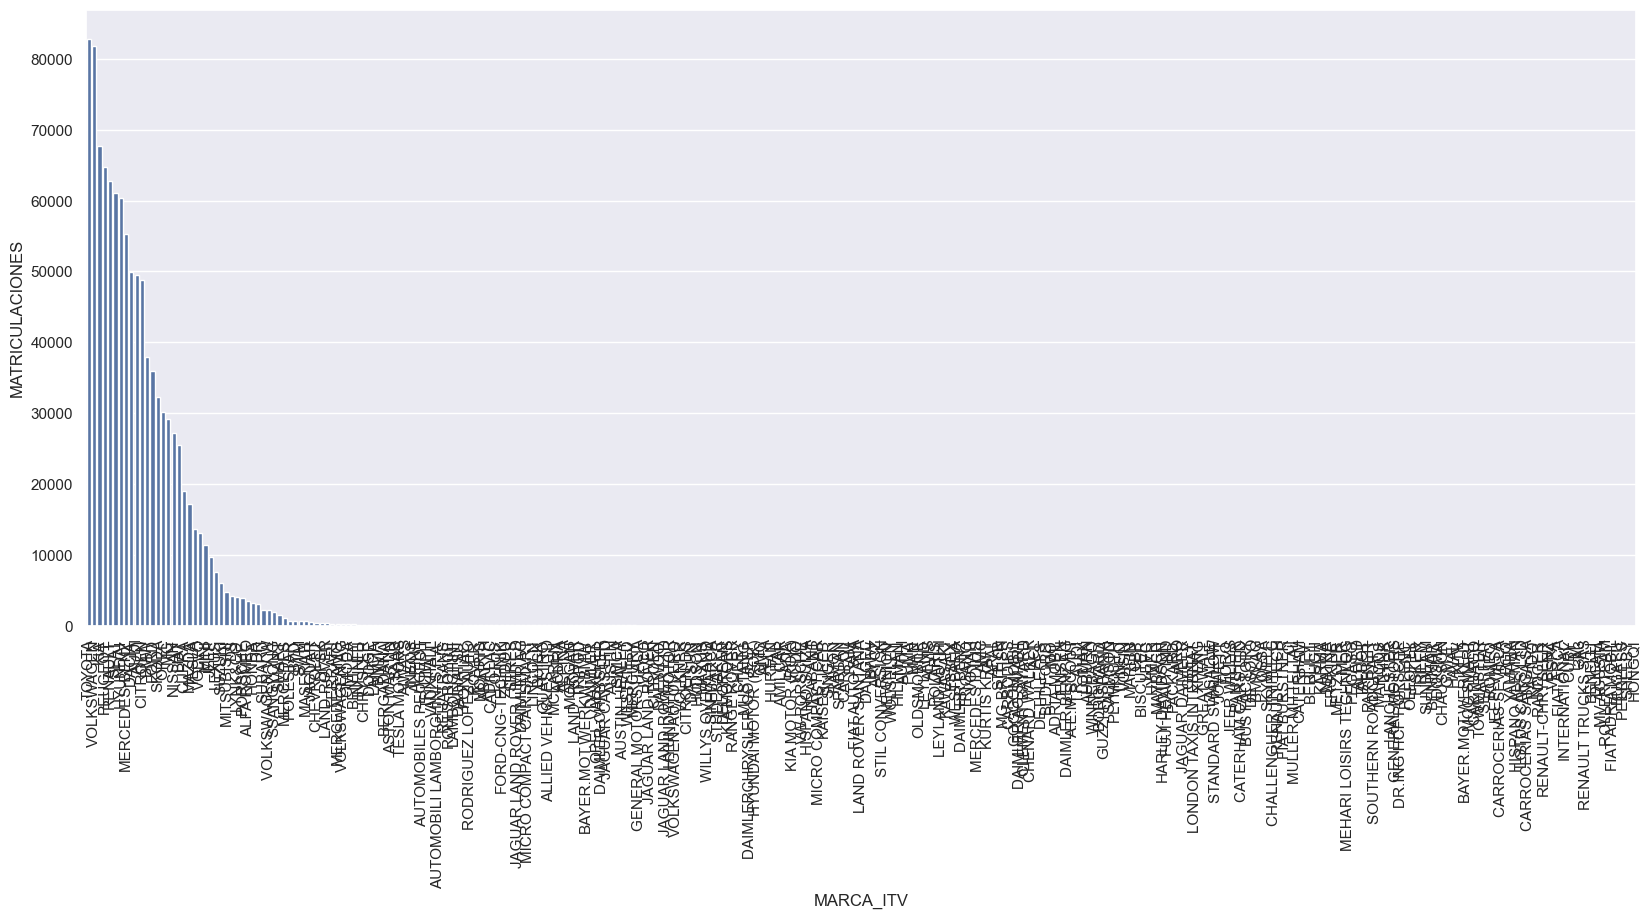

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='MARCA_ITV', y='MATRICULACIONES', data=df_1)
plt.xticks(rotation=90);

Dado que disponemos de muchas marcas, vamos a realizar esta misma visualización sólo para las Top 10 marcas que más vehículos vendieron este año, para poder visualizar mejor los resultados.

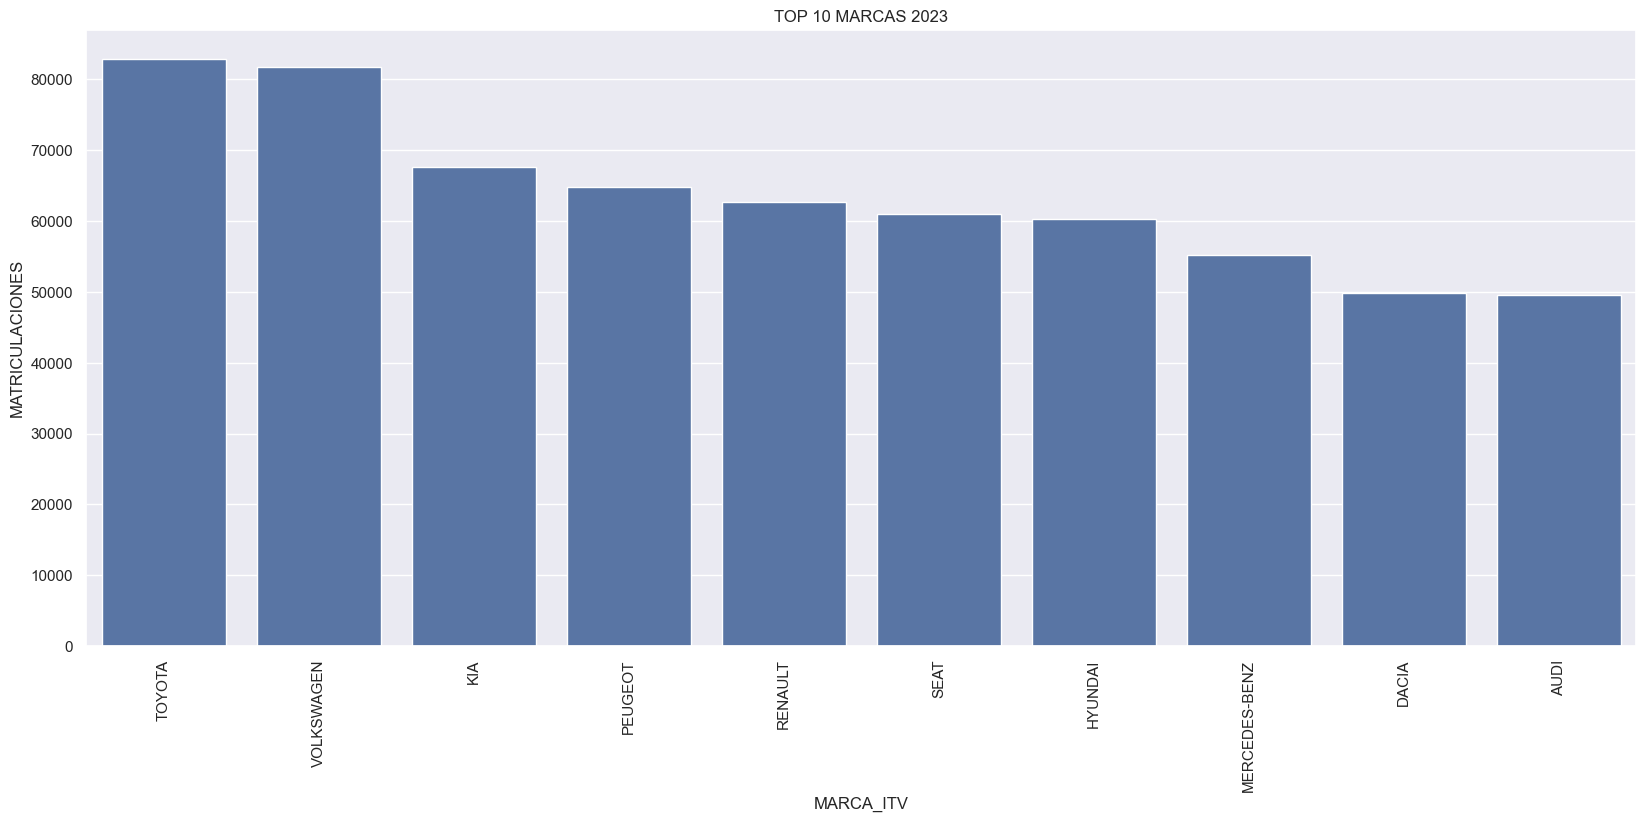

In [ ]:
sns.barplot(x='MARCA_ITV', y='MATRICULACIONES', data=df_1.head(10))
plt.title('TOP 10 MARCAS 2023')
plt.xticks(rotation=90);

Observamos cómo Toyota y Volkswagen son las marcas líderes con un volumen de matriculaciones de turismos superior a 80.000 unidades en 2023. Vemos cómo en el Top 10 predominan marcas asiáticas y europeas, no existiendo ninguna china ni americana.

### 2) ¿Qué modelos de vehículos fueron los más vendidos en el 2023?

Para responder a esta pregunta, excluimos del análisis todas aquellas matriculaciones que corresponden a matriculaciones no realizadas en el año 2023. Posteriormente, realizamos un conteo de vehículos por marca y modelo, pero también distinguiremos entre el tipo de propulsión del vehículo, de tal forma que veamos si entre los más matriculados aparece algún vehículo eléctrico.

In [ ]:
df_2 = df[df['ANO']==2023] # Filtramos por año
df_2 = df_2.groupby(['MARCA_ITV', 'MODELO_ITV', 'COD_PROPULSION_ITV']).size().reset_index(name='MATRICULACIONES') # Contamos número de aparicione por marca y modelo
df_2 = df_2.sort_values(by='MATRICULACIONES', ascending=False) # Ordenamos de mayor a menor

df_2.head(10)

,MARCA_ITV,MODELO_ITV,COD_PROPULSION_ITV,MATRICULACIONES
10779,SEAT,ARONA,Gasolina,21721
11479,TOYOTA,TOYOTA COROLLA,Gasolina,20395
8355,MG,MG ZS,Gasolina,19260
11467,TOYOTA,TOYOTA C-HR,Gasolina,18566
5183,KIA,SPORTAGE,Gasolina,16994
10814,SEAT,IBIZA,Gasolina,16798
8875,NISSAN,NISSAN QASHQAI,Gasolina,16045
3526,DACIA,SANDERO,Gas Licuado de Petróleo,15993
4727,HYUNDAI,TUCSON,Gasolina,15902
11545,TOYOTA,TOYOTA YARIS CROSS,Gasolina,15861


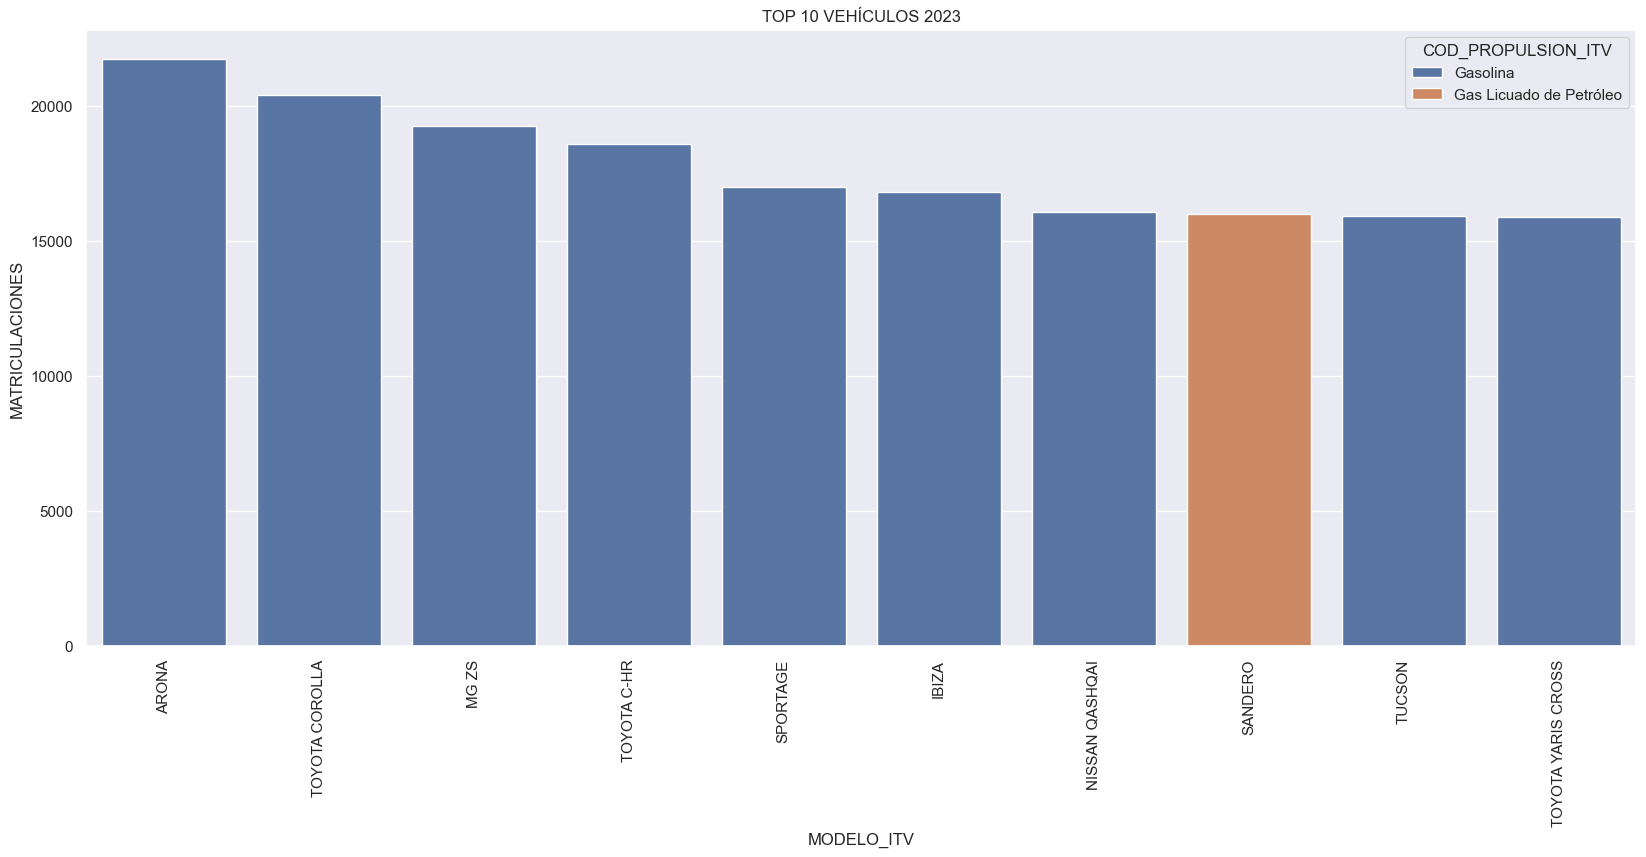

In [ ]:
sns.barplot(x='MODELO_ITV', y='MATRICULACIONES', data=df_2.head(10), hue='COD_PROPULSION_ITV')
plt.title('TOP 10 VEHÍCULOS 2023')
plt.xticks(rotation=90);

Tras realizar esta visualización, aparecen algunos aspectos interesantes:
* Los únicos vehículos de fabricación europea que aparecen en el Top 10 son el Arona y el Ibiza de la marca española SEAT. El resto son asiáticos.
* Nueve de los diez vehículos están propulsados por Gasolina.
* El único vehículo del Top 10 con un tipo de propulsión diferente es el DACIA Sandero GLP (Gas Licuado de Petróleo).

### 3) ¿Qué cuota de mercado absorbieron los vehículos eléctricos en el 2023?

Para responder a esta pregunta, centraremos nuestro análisis en las tres categorías principales de propulsión de vehículos: Gasolina, Diésel y Eléctrico. Clasificaremos el resto de tecnologías en la catergoría "Otros" y analizaremos a través de un gráfico de tarta el peso actual de las matriculaciones de VEs en el último año.

In [ ]:
df_3 = df[df['ANO']==2023] # Filtramos por año
df_3 = df_3['COD_PROPULSION_ITV'].value_counts().reset_index(name = "MATRICULACIONES") # Contamos por marca

# Agrupamos todos aquellos motores distintos de Gasolina, Diesel y Electrico en categoría "Otros"
otros = ~df_3['COD_PROPULSION_ITV'].isin(['Gasolina','Diesel','Eléctrico']) # Seleccionamos otros códigos de propulsión
total_otros = df_3.loc[otros, 'MATRICULACIONES'].sum() # Sumamos vehículos
fila_otros = pd.DataFrame({'COD_PROPULSION_ITV': ['Otros'], 'MATRICULACIONES': [total_otros]}) # Creamos fila "Otros"
df_3 = df_3.loc[~otros] # Eliminamos resto de códigos de propulsión
df_3 = pd.concat([df_3, fila_otros], ignore_index=True) # Añadimos fila "Otros"

df_3.head()

,COD_PROPULSION_ITV,MATRICULACIONES
0,Gasolina,743834
1,Diesel,213284
2,Eléctrico,57381
3,Otros,28285


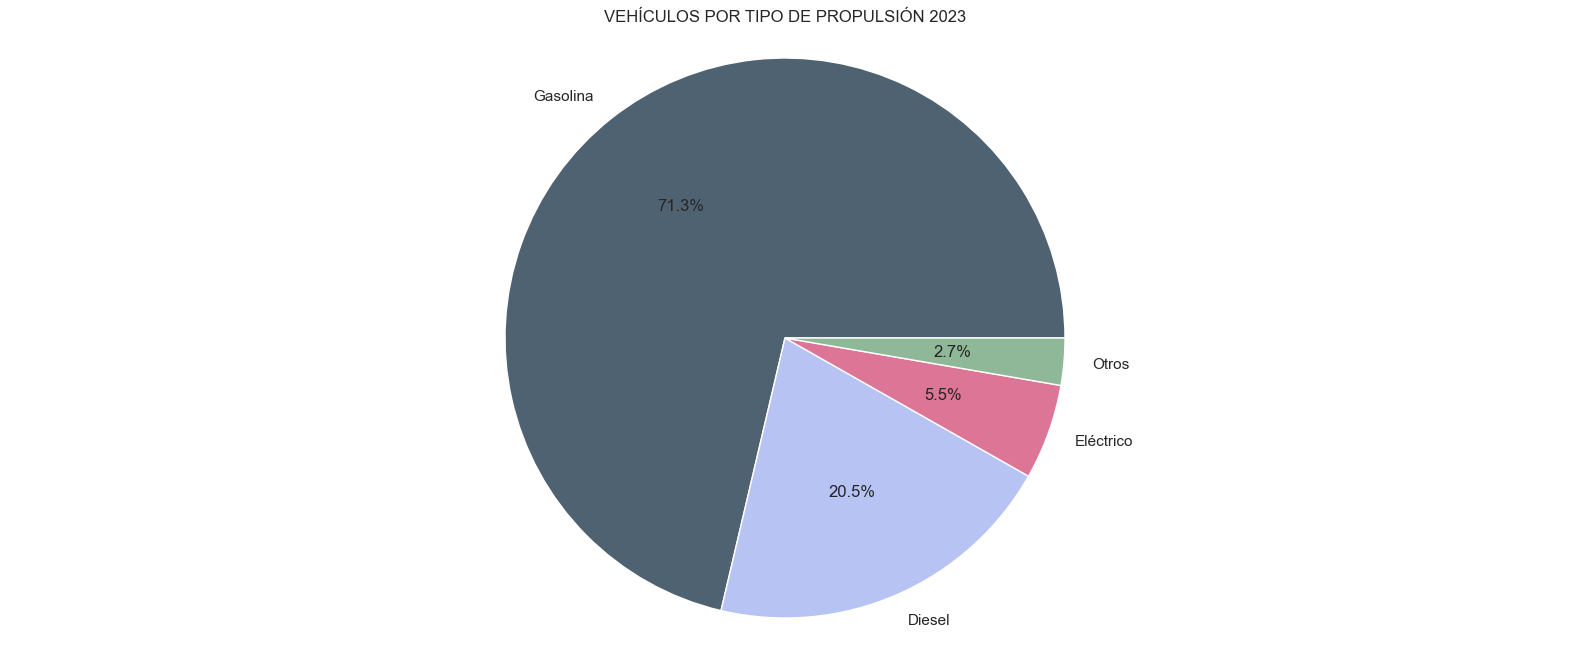

In [ ]:
colores = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'] # Colores para el gráfico
plt.pie(df_3['MATRICULACIONES'], labels=df_3['COD_PROPULSION_ITV'], autopct='%1.1f%%', colors=colores) # Gráfico de tipo tarta
plt.title('VEHÍCULOS POR TIPO DE PROPULSIÓN 2023')
plt.axis('equal');

Vemos cómo la inmensa mayoría del mercado (>70%) la absorbieron vehículos de gasolina, siendo los diésel la segunda opción, y como los vehículos eléctricos alcanzaron el 5.5%.

### 4) ¿Qué modelos de vehículos eléctricos fueron los más vendidos en el 2023?

Para responder a esta pregunta, agrupamos las matriculaciones por marca y modelo de vehículo, filtrando todas aquellas matriculaciones que no sean del 2023 ni de vehículos eléctricos.

In [ ]:
df_4 = df[(df['ANO']==2023) & (df['COD_PROPULSION_ITV']=='Eléctrico')] # Filtramos por año y propulsion
df_4 = df_4.groupby(['MARCA_ITV', 'MODELO_ITV']).size().reset_index(name='MATRICULACIONES') # Contamos número de apariciones por marca y modelo
df_4 = df_4.sort_values(by='MATRICULACIONES', ascending=False) # Ordenamos de mayor a menor

df_4.head(10)

,MARCA_ITV,MODELO_ITV,MATRICULACIONES
654,TESLA,MODEL Y,6880
649,TESLA,MODEL 3,6303
457,MG,MG4 ELECTRIC,3097
218,FIAT,500,2082
205,DACIA,SPRING,2061
274,KIA,NIRO,1474
460,MINI,COOPER SE,1350
182,CITROEN,NUEVO Ë-C4 ELÉCTRICO 1,1275
760,VOLVO,XC40,1180
272,KIA,EV6,1143


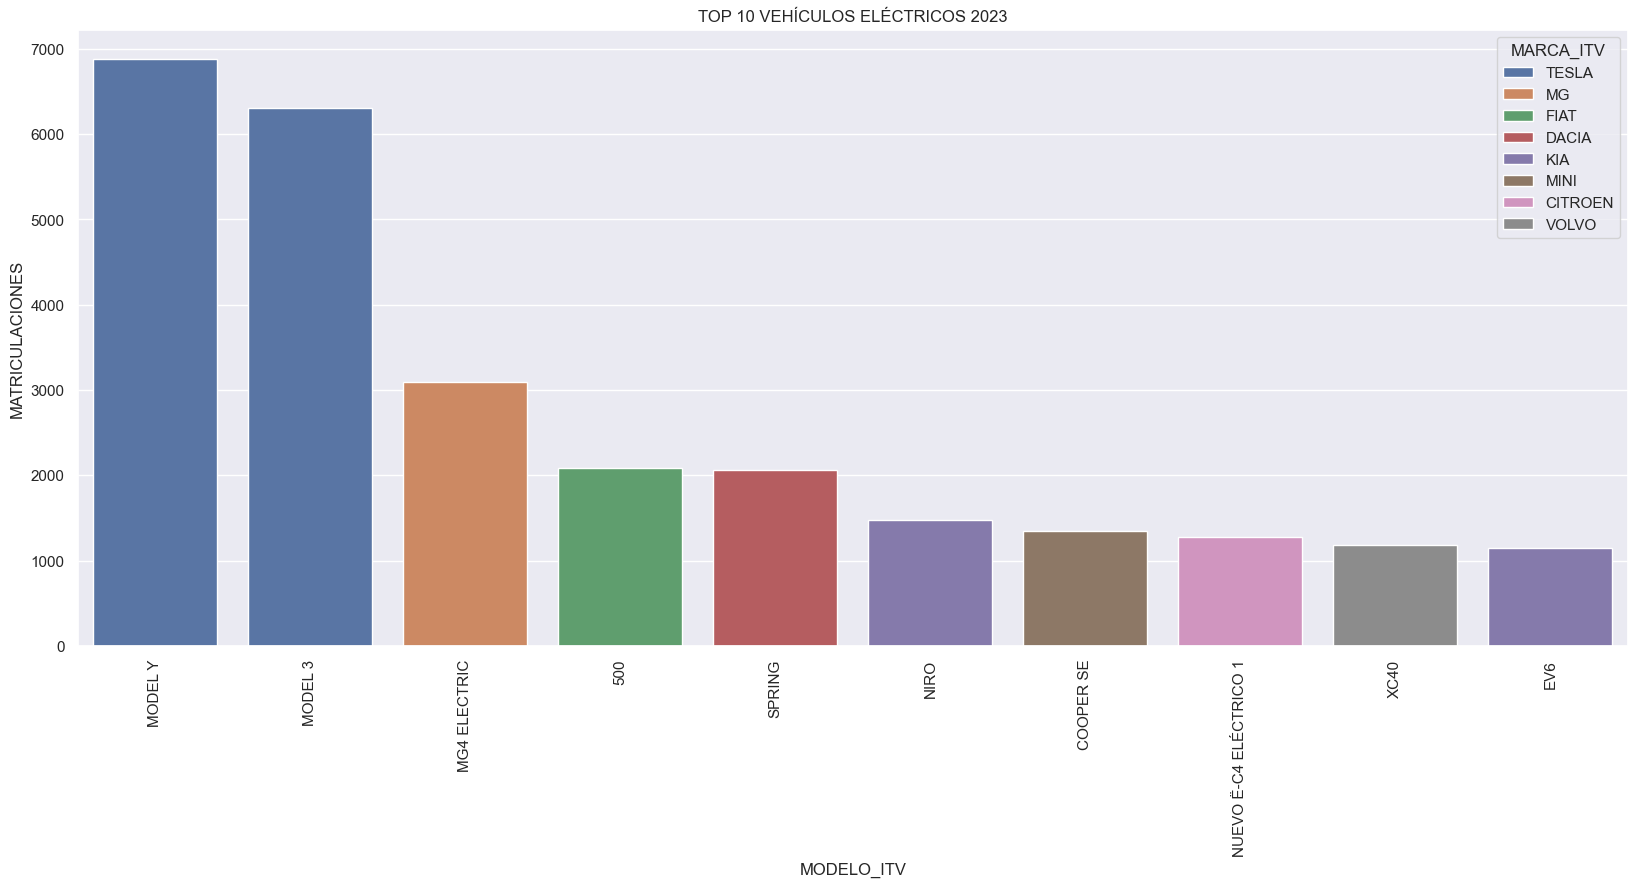

In [ ]:
sns.barplot(x='MODELO_ITV', y='MATRICULACIONES', data=df_4.head(10), hue='MARCA_ITV')
plt.title('TOP 10 VEHÍCULOS ELÉCTRICOS 2023')
plt.xticks(rotation=90);

Podemos observar en la gráfica anterior cómo TESLA es la empresa cuyos modelos lideran el ranking, siendo el Model Y y el Model 3 los más matriculados con una amplia diferencia frente al tercer vehículo eléctrico: el MG4.

### 5) ¿Cómo han evolucionado las matriculaciones de vehículos a lo largo del tiempo?

Comenzamos ahora a analizar la evolución de las matriculaciones de vehículos en el tiempo. Este tipo de análisis se considera un análisis de **series temporales**, pues disponemos de conjunto de observaciones recogidas o registradas en intervalos de tiempo consecutivos o regulares. La característica distintiva de una serie temporal es que el orden de estas observaciones es importante, lo que significa que hay una dependencia clara del tiempo en los datos.

Comenzaremos analizando la evolución global de matriculaciones para posteriormente analizar por tipo de propulsión.

In [ ]:
# Contamos el número de apariciones por cada año y mes
df_5_1 = df.groupby(['ANO', 'MES']).size().reset_index(name='MATRICULACIONES')
df_5_1.set_index(['ANO', 'MES'], inplace=True) # Creamos un índice para trabajar y ordenar por año y mes
df_5_1.head()

MATRICULACIONES
ANO  MES                 
2015 1              71295
     2              90309
     3             115883
     4              86285
     5              97790

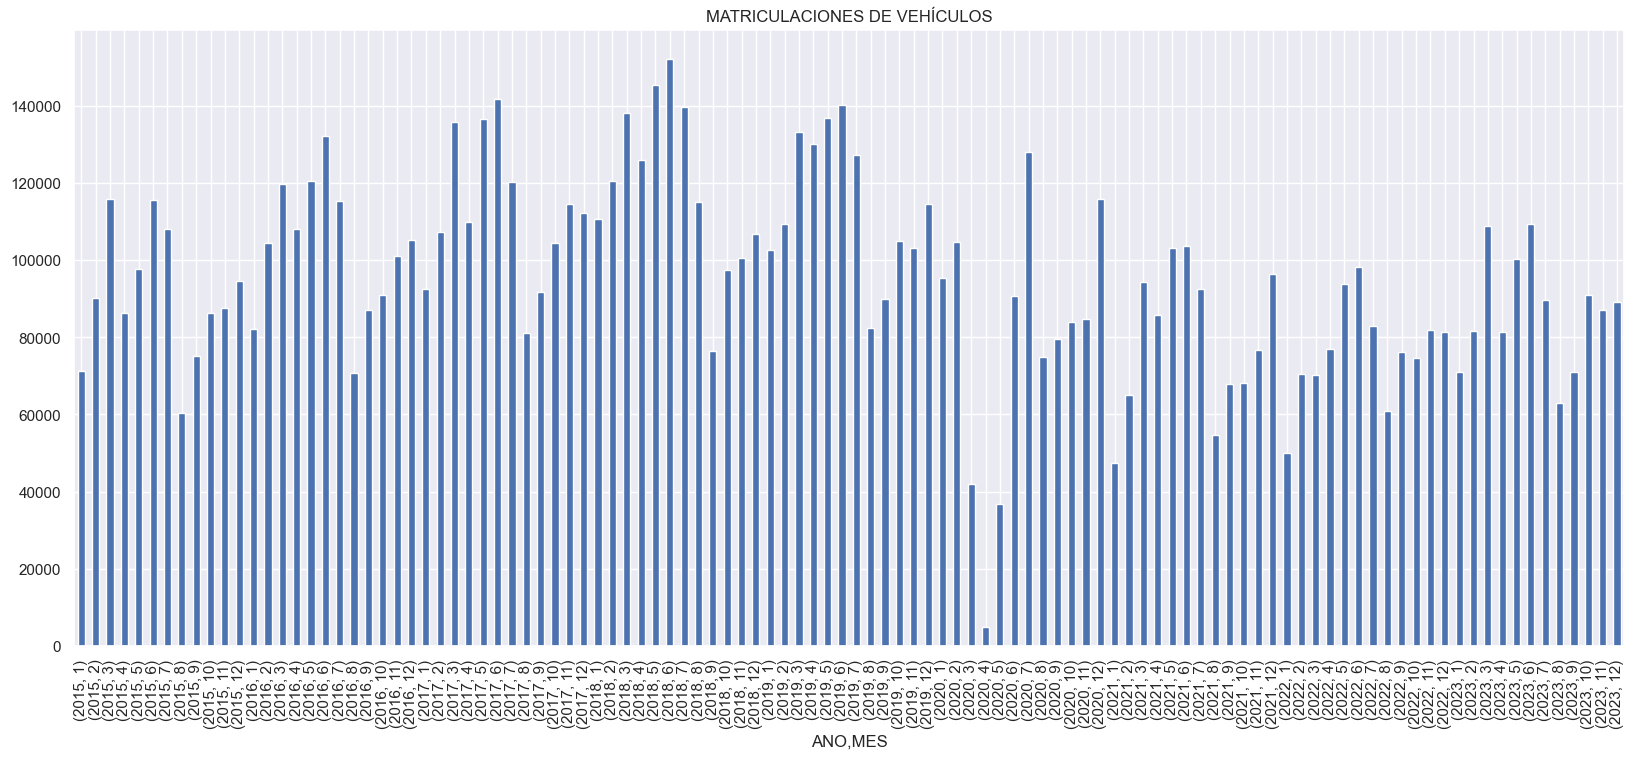

In [ ]:
# Representamos en un diagrama de barras
df_5_1['MATRICULACIONES'].plot(kind='bar')
plt.title('MATRICULACIONES DE VEHÍCULOS');

Podemos observar varios aspectos interesantes en este gráfico:
* Apreciamos un **comportamiento estacional** anual, es decir, observamos patrones o variaciones que se repiten a intervalos regulares de tiempo. Vemos cómo recurrentemente en junio/julio aparecen altos niveles de matriculación mientras que en agosto/septiembre decrecen drásticamente. Esto es muy relevante, pues el análisis de series temporales con factor estacional tiene ciertas particularidades.
* Es muy notable también la enorme caída de matriculaciones producida durante los primeros meses del COVID.
* Por último, vemos como los niveles de matriculación post-covid son inferiores a los previos.

Procederemos ahora a desarrollar el mismo análisis contemplado el tipo de propulsión.

In [ ]:
# Creamos un nuevo dataframe agrupando todos aquellos tipos de propulsion distintos a 'Gasolina','Diesel','Eléctrico' en 'Otros'
df_5_2 = df.copy()
df_5_2['COD_PROPULSION_ITV'] = df_5_2['COD_PROPULSION_ITV'].where(df_5_2['COD_PROPULSION_ITV'].isin(['Gasolina','Diesel','Eléctrico']), other='Otros')

# Agrupamos por 'AÑO' y 'MES' y luego contamos las apariciones de cada tipo de propulsión
df_5_2 = df_5_2.groupby(['ANO', 'MES'])['COD_PROPULSION_ITV'].value_counts().reset_index(name='MATRICULACIONES')

# Pivotamos para obtener matriculaciones por cada tipo de propulsion en cada mes analizado
df_5_2 = df_5_2.pivot_table(
    index=['ANO', 'MES'],
    columns='COD_PROPULSION_ITV',
    values='MATRICULACIONES',
    fill_value=0,
    aggfunc='sum'
)
df_5_2.head()

COD_PROPULSION_ITV  Diesel  Eléctrico  Gasolina  Otros
ANO  MES                                              
2015 1               48250         55     22787    203
     2               58821         51     31283    153
     3               73040        162     42380    300
     4               54507        111     31291    372
     5               61082        118     36275    309

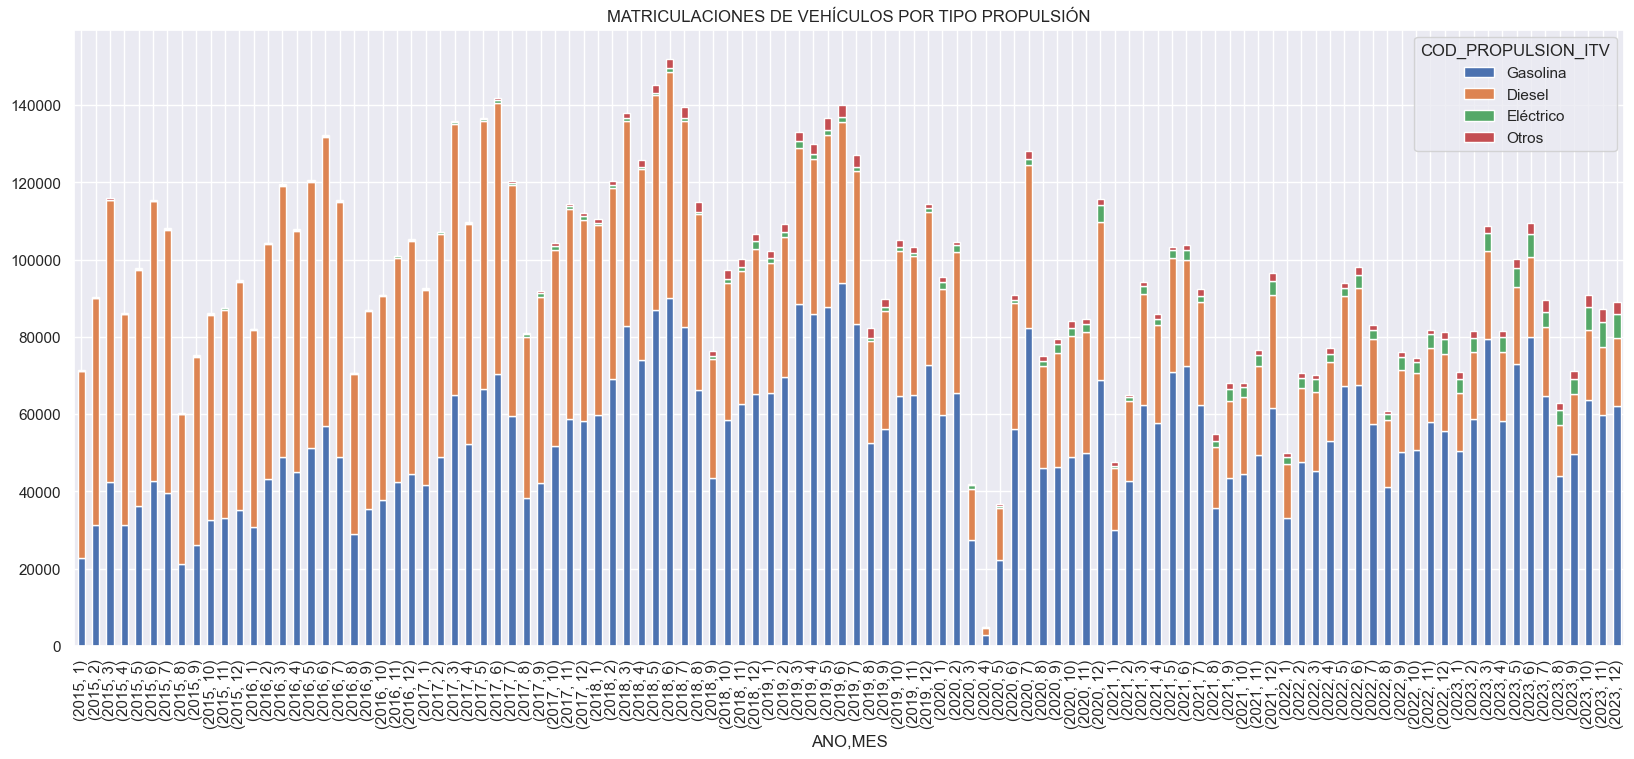

In [ ]:
# Representamos el número de vehículos matriculados por tipo de propulsion a lo largo del tiempo
df_5_2[['Gasolina','Diesel','Eléctrico', 'Otros']].plot(kind='bar',stacked=True)
plt.title('MATRICULACIONES DE VEHÍCULOS POR TIPO PROPULSIÓN');

Podemos observar rápidamente como entre los años 2015 y 2023 la matriculación de vehículos eléctricos va creciendo paulatinamente. Para observarlo de forma más clara, procederemos a realizar una visualización de los ratios de matriculación por tipo de propulsión.

In [ ]:
# Creamos una copia del dataframe anteriore
df_5_3 = df_5_2.copy()

# Calculamos el número total de matriculaciones por mes
df_5_3['TOTAL'] = df_5_3.iloc[:, 0:4].sum(axis=1)

#Calculamos el porcentaje de matriculaciones por tipo de propulsión cada mes
for columna in df_5_3.columns[0:4]:
    df_5_3[columna + '_%'] = (df_5_3[columna] / df_5_3['TOTAL']) * 100
df_5_3.head()

COD_PROPULSION_ITV  Diesel  Eléctrico  Gasolina  Otros   TOTAL   Diesel_%  \
ANO  MES                                                                    
2015 1               48250         55     22787    203   71295  67.676555   
     2               58821         51     31283    153   90308  65.133764   
     3               73040        162     42380    300  115882  63.029634   
     4               54507        111     31291    372   86281  63.173816   
     5               61082        118     36275    309   97784  62.466252   

COD_PROPULSION_ITV  Eléctrico_%  Gasolina_%   Otros_%  
ANO  MES                                               
2015 1                 0.077144   31.961568  0.284732  
     2                 0.056473   34.640342  0.169420  
     3                 0.139797   36.571685  0.258884  
     4                 0.128649   36.266385  0.431149  
     5                 0.120674   37.097071  0.316003

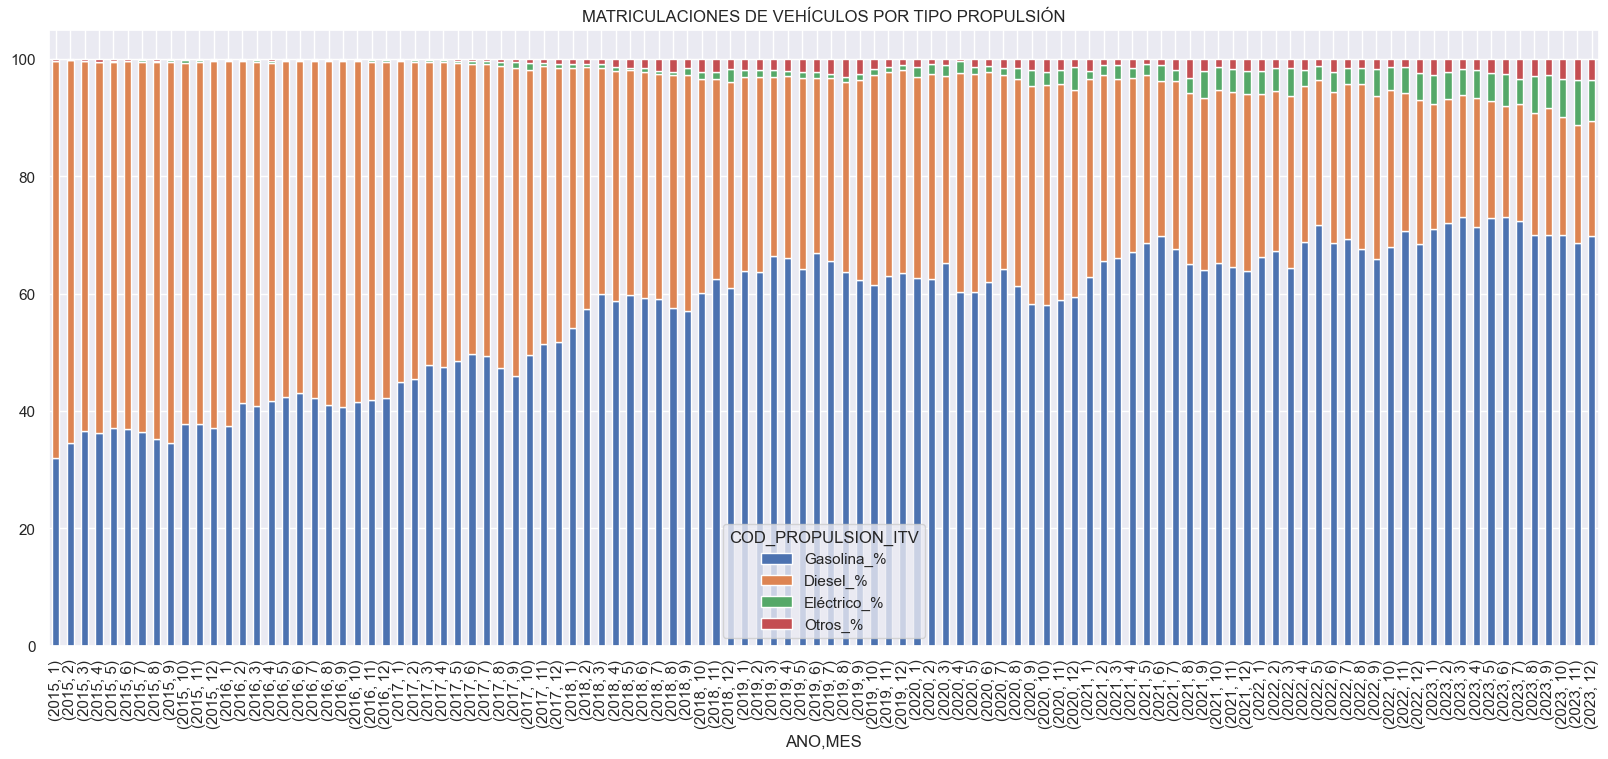

In [ ]:
# Representamos en un diagrama de barras
df_5_3[['Gasolina_%','Diesel_%','Eléctrico_%','Otros_%']].plot(kind='bar', stacked=True);
plt.title('MATRICULACIONES DE VEHÍCULOS POR TIPO PROPULSIÓN');

Vemos ahora de forma mucho más sencilla el efecto antes descrito. Es también notable en este gráfico el detrimento de vehículos diésel en favor de vehículos de tipo gasolina.

### 6) ¿Observamos algún tipo de tendencia respecto a la matriculación de vehículos eléctricos?

Para responder esta pregunta, analizaremos por separado la evolución de vehículos eléctricos y no eléctricos utilizando mapas de calor como herramienta visual.

In [ ]:
# Creamos dos nuevos datasets, uno exclusivo de vehículos eléctricos y otro con el resto de vehículos matriculados
df_6_1 = df[df['COD_PROPULSION_ITV'] != 'Eléctrico']
df_6_2 = df[df['COD_PROPULSION_ITV'] == 'Eléctrico']

# Contamos número de apariciones por cada año y mes
df_6_1 = df_6_1.groupby(['ANO', 'MES']).size().reset_index(name='MATRICULACIONES')
df_6_2 = df_6_2.groupby(['ANO', 'MES']).size().reset_index(name='MATRICULACIONES')

# Pivotamos para representar meses y años en ejes opuestos
df_6_1 = df_6_1.pivot_table(
    values='MATRICULACIONES',
    index='MES',
    columns='ANO',
    fill_value=0,
    aggfunc='sum'
)
df_6_2 = df_6_2.pivot_table(
    values='MATRICULACIONES',
    index='MES',
    columns='ANO',
    fill_value=0,
    aggfunc='sum'
)

# Convertimos datos para realizar la representación visual
df_6_2 = df_6_2[df_6_2.columns].astype(float)
df_6_1 = df_6_1[df_6_1.columns].astype(float)

df_6_1.head(12)

ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
MES,,,,,,,,,
1,71240.0,81932.0,92417.0,109883.0,101138.0,93631.0,46880.0,48011.0,67402.0
2,90257.0,104232.0,106963.0,119696.0,107769.0,102946.0,63987.0,67895.0,77814.0
3,115720.0,119274.0,135457.0,137164.0,131369.0,41135.0,92057.0,66817.0,103878.0
4,86170.0,107616.0,109479.0,125196.0,128775.0,4698.0,84332.0,74898.0,77604.0
5,97666.0,120274.0,136241.0,144671.0,135374.0,36303.0,101364.0,91645.0,95459.0
6,115387.0,132062.0,141095.0,151060.0,138615.0,89867.0,100966.0,94876.0,103376.0
7,107841.0,115142.0,119672.0,138706.0,126164.0,126435.0,90693.0,80762.0,85728.0
8,60136.0,70459.0,80407.0,114323.0,81591.0,73654.0,53275.0,59292.0,58916.0
9,74991.0,86834.0,90966.0,75331.0,88962.0,77419.0,64894.0,72712.0,67044.0


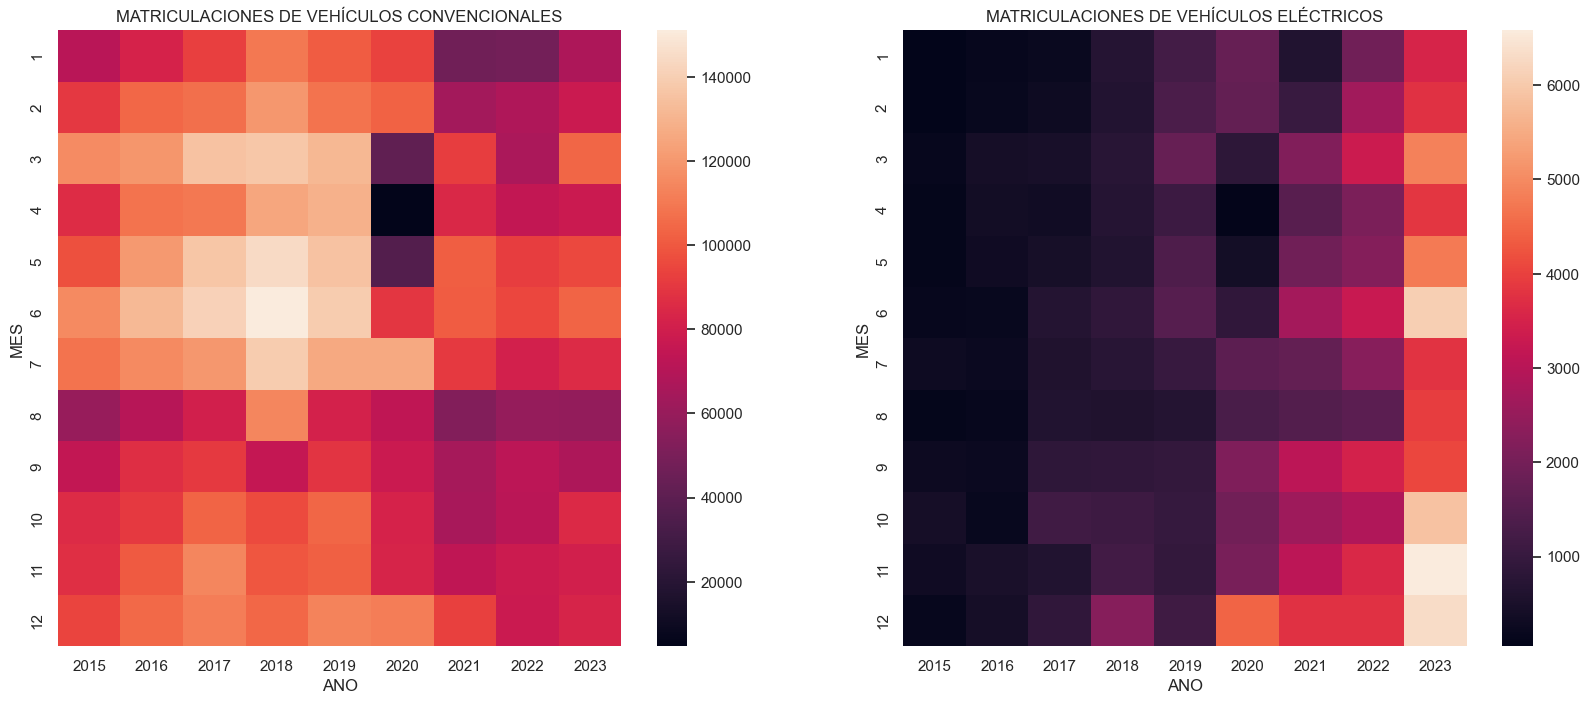

In [ ]:
# Creamos una figura con dos espacios para gráficos
fig, axs = plt.subplots(1, 2)

# Representamos ambos mapas de calor
sns.heatmap(df_6_1, ax=axs[0])
sns.heatmap(df_6_2, ax=axs[1])
axs[0].set_title('MATRICULACIONES DE VEHÍCULOS CONVENCIONALES')
axs[1].set_title('MATRICULACIONES DE VEHÍCULOS ELÉCTRICOS');

Podemos observar comportamientos muy diferenciados entre ambos gráficos. Observamos cómo el vehículo eléctrico presenta una tendencia de incremento de matriculaciones año a año y, a pesar de suponer el COVID un parón en la matriculación de vehículos, los años posteriores han mantenido la tendencia creciente.



### 7) ¿Cómo esperamos que evolucionen las matriculaciones de Vehículos eléctricos el próximo año?

Las respuestas anteriores nos han permitido familiarizarnos con el conjunto de datos y entender mejor los comportamientos de las matriculaciones de vehículos, entendiendo aspectos relevantes como el componente estacional y la tendencia alzista del VE. Esta pregunta nos requerirá un análisis más avanzado: debemos realizar una previsión futura.

En primer lugar, visualicemos la serie temporal de matriculaciones de VEs.

In [ ]:
#Filtramos por vehículos electricos
df_7 = df[df['COD_PROPULSION_ITV'] == 'Eléctrico']

# Agrupamos por 'AÑO' y 'MES' y luego contamos las apariciones de cada categoría en 'CATEGORIAS'
df_7 = df_7.groupby(['ANO', 'MES']).size().reset_index(name= 'MATRICULACIONES')

# Creamos una columna de tipo fecha
df_7['FECHA'] = pd.to_datetime(df_7['ANO'].astype(str) + '-' + df_7['MES'].astype(str))
df_7 = df_7.set_index("FECHA")
df_7.drop(columns=['ANO', 'MES'], inplace=True)

df_7.head()

,MATRICULACIONES
FECHA,
2015-01-01,55
2015-02-01,51
2015-03-01,162
2015-04-01,111
2015-05-01,118


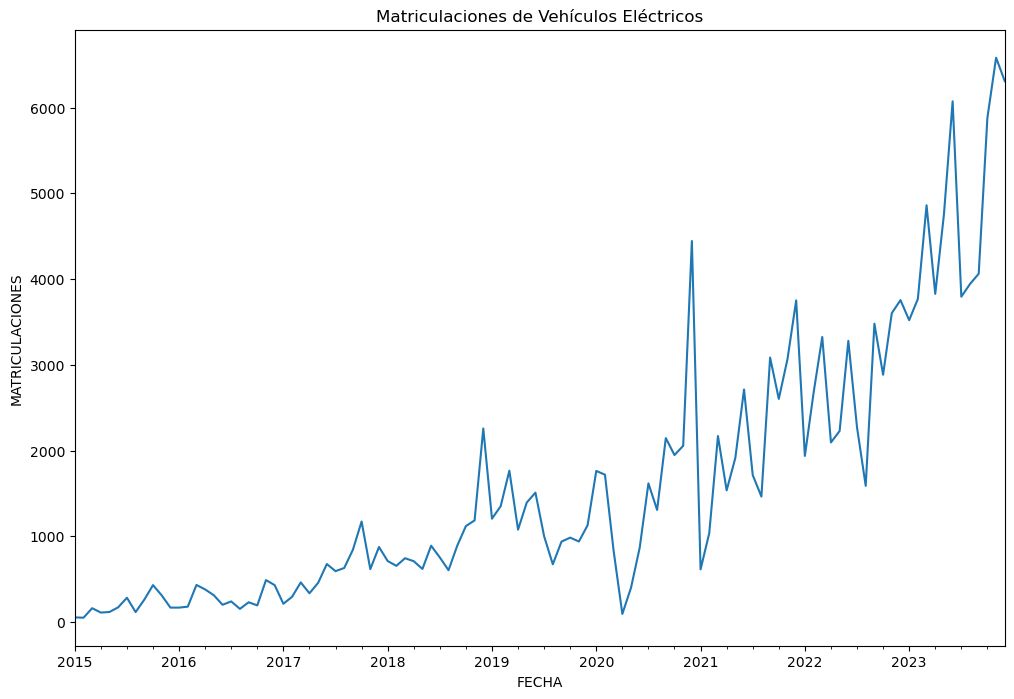

In [ ]:
# Representamos los datos ob
fig,ax = plt.subplots(figsize=(12,8),dpi=100)
df_7['MATRICULACIONES'].plot(title="Matriculaciones de Vehículos Eléctricos")
ax.set_ylabel('MATRICULACIONES');

Varios son los componentes que integran una serie temporal:
* Tendencia: Es el componente que muestra el movimiento a largo plazo de los datos, indicando un aumento o disminución general a lo largo del tiempo.
* Estacionalidad: Es el componente que muestra variaciones regulares y predecibles que ocurren en un período específico, como diario, semanal, mensual o trimestral.
* Irregularidad: También conocido como componente aleatorio o ruido, es el componente que no sigue ningún patrón regular y puede ser resultado de factores aleatorios o inesperados. Este componente es impredecible y varía de manera aleatoria a lo largo del tiempo.

En primer lugar, trataremos de detectar algún tipo de tendencia de forma visual. Para ello, calculamos la media móvil anual de las matriculaciones de vehículos eléctricos. Ideal para suavizar la estacionalidad anual, permitiendo observar la tendencia subyacente en los datos eliminando las fluctuaciones estacionales.

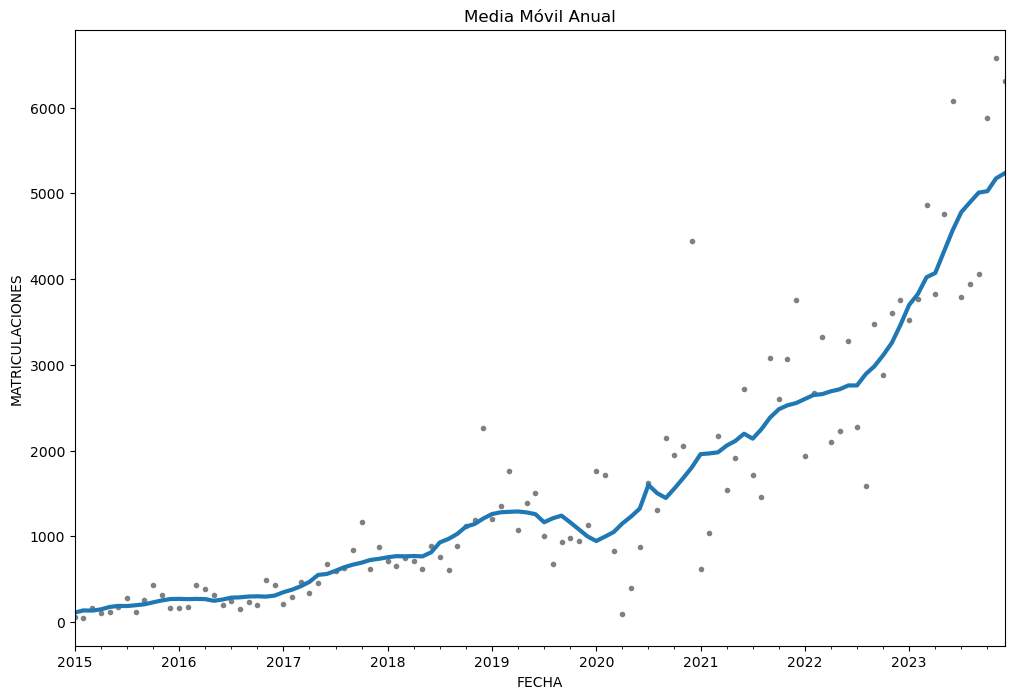

In [ ]:
# Calculamos la media móvil
media_movil = df_7.rolling(
    window=12,       # Ventana de 12 meses (anual)
    center=True,
    min_periods=6,
).mean()

# Mostramos su representación para analizar su comportamiento
fig,ax = plt.subplots(figsize=(12,8),dpi=100)
df_7.plot(ax=ax, style=".", color="0.5", legend=False)
media_movil.plot( ax=ax, linewidth=3, title="Media Móvil Anual", legend=False)
ax.set_ylabel('MATRICULACIONES');

Como podemos observar, al suavizar la representación gracias a la media móvil hay una tendencia creciente clara en matriculaciones de vehículo eléctrico.

Además del análisis visual, podemos utilizar tests estadísticos para determinar la estacionariedad de la serie temporal estudiada de forma cuantitativa.

Uno de los tests más utilizados para este fin es el [**Augmented Dickey-Fuller (ADF)**](https://es.wikipedia.org/wiki/Prueba_de_Dickey-Fuller_aumentada), test de tipo raíz unitaria. Un test de raíz unitaria es una prueba estadística que determina si una serie temporal es estacionaria alrededor de una tendencia o es diferencialmente estacionaria, es decir, si contiene una raíz unitaria. Hay varias pruebas de raíz unitaria y la de ADF es una de las más utilizadas. El planteamiento de este test es el siguiente:
* Hipótesis Nula (H0): Si no se rechaza, sugiere que la serie temporal tiene una raíz unitaria, significando que es no estacionaria, y por tanto tiene alguna estructura dependiente del tiempo.
* Hipótesis Alternativa (H1): La hipótesis nula es rechazada sugiriendo que la serie temporal no tiene una raíz unitaria y por tanto es estacionaria. No tiene estructura dependiente del tiempo.

Para interpretar este resultado, utilizaremos el valor p (*p-value*) de la prueba. Un valor p por debajo de un umbral (5%) sugiere que rechazamos la hipótesis nula y por tanto la serie es estacionaria. Por el contrario, un valor p por encima del umbral sugiere que no rechazamos la hipótesis nula y por tanto la serie no es estacionaria.

In [ ]:
# Augmented Dicky Fuller Test (ADF)
def adf_test(serie_temporal):
  resultado = adfuller(serie_temporal)
  adf_estadistico = resultado[0]
  valor_p = resultado[1]
  print('ADF Estadístico: %f' %adf_estadistico)
  print('p-value: %f' %valor_p)
  return adf_estadistico, valor_p

adf_statistic, p_value = adf_test(df_7['MATRICULACIONES'])

ADF Estadístico: 3.110878
p-value: 1.000000


Nuestro test ADF muestra un p-value elevado, muy superior al valor umbral (0,05), indicando por tanto que la serie no es estacionaria, exhibe algún tipo de tendencia como ya observamos anteriormente de forma visual.

En último lugar, procedemos a realizar la predicción de matriculaciones de vehículo eléctrico para el próximo año. Para ello, utilizaremos el modelo ARIMA estacional o **SARIMA**. El modelo SARIMA, que significa "Seasonal AutoRegressive Integrated Moving Average", es una extensión del modelo ARIMA diseñada para capturar tanto las tendencias y patrones no estacionales como las fluctuaciones estacionales en series temporales. Combina los conceptos de modelos autorregresivos (AR), integración (I) para hacer la serie estacionaria, y medias móviles (MA), junto con componentes estacionales equivalentes (SAR, SI, SMA) para modelar efectivamente datos que exhiben patrones estacionales recurrentes. Se especifica mediante los parámetros (p, d, q)(P, D, Q)m, donde p, d, q representan la parte no estacional y P, D, Q, m la parte estacional del modelo. Es ampliamente utilizado para el análisis y pronóstico de series temporales complejas que presentan tanto tendencias a largo plazo como ciclos estacionales.



Nos apoyaremos en la librería *pmdarima* para realizar de forma automatizada la configuración de este modelo adecuado a nuestro conjunto de datos.

In [ ]:
# Utilizamos la función autoarima para realizar de forma automatizada la configuración del modelo
pm.auto_arima(np.log(df_7['MATRICULACIONES']),
                      test='adf',        # ADF Test, anteriormente utilizado
                      m=12,              # Estacionalidad de 12 meses
                      seasonal=True,     # Configurado como modelo SARIMA
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=148.900, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=338.257, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=160.687, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=233.194, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=727.120, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=154.552, Time=0.37 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=153.001, Time=0.42 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=151.419, Time=1.02 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=155.635, Time=0.16 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=151.755, Time=0.78 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=149.195, Time=0.95 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=147.663, Time=0.39 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AI

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Con los resultados anteriormente obtenidos, creamos un modelo SARIMA y realizamos la predicción para los siguientes 12 meses.

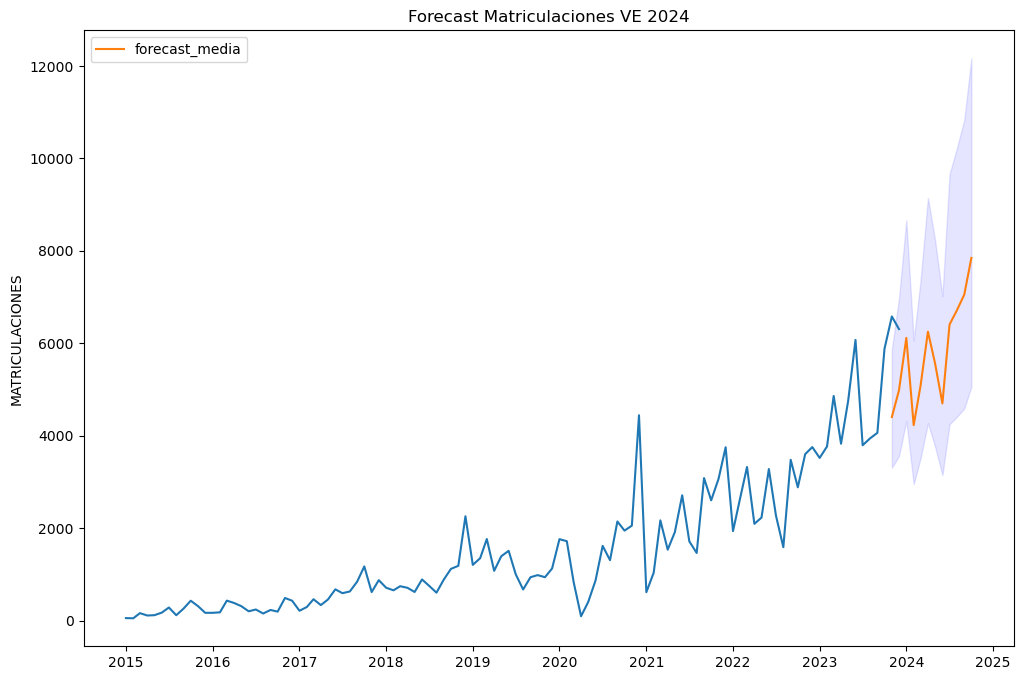

In [ ]:
# Creamos modelo SARIMA
modelo = sm.tsa.statespace.SARIMAX(np.log(df_7['MATRICULACIONES']), order=(1,0,2), seasonal_order=(1,0,1,12))
modelo_entrenado = modelo.fit(disp=False)

# Realizamos el forecast (predicción) a 12 meses
fc = modelo_entrenado.get_forecast(12)
fc = (fc.summary_frame(alpha=0.5))

# Obtenemos valores estadísticos como la media y los intervalos de confianza
fc_media = fc['mean']
fc_inferior = fc['mean_ci_lower']
fc_superior = fc['mean_ci_upper']

# Representamos predicción
fig,ax = plt.subplots(figsize=(12,8),dpi=100)
plt.plot(df_7.index,df_7['MATRICULACIONES'])
fc_meses = [datetime.datetime(2023,11,1) + relativedelta(months=x) for x in range(12)]
plt.plot(fc_meses, np.exp(fc_media), label = 'forecast_media', linewidth=1.5)
plt.legend(loc='upper left');
plt.fill_between(fc_meses, np.exp(fc_inferior), np.exp(fc_superior),color='b',alpha=0.1, label = '95% Confianza')
ax.set_title('Forecast Matriculaciones VE 2024')
ax.set_ylabel('MATRICULACIONES');


Como podemos observar, el modelo construido nos propone una continuación del crecimiento en las matriculaciones esperadas a lo largo del año serán de 70000, alcanzando valores cercanos a las 8000 matriculaciones solo en el mes de diciembre del 2024.

### 8) ¿Cuál es la reducción de emisiones de CO2 que podemos esperar gracias a las matriculaciones obtenidas durante el próximo año?

Para responder a esta pregunta, en primer lugar vamos a calcular la cantidad total de matriculaciones que predijimos en la respuesta anterior.

In [ ]:
# Sumamos todos los elementos de nuestro forecast y redondeamos el resultado
ve_2024 = round(np.exp(fc_media).sum())
ve_2024

69367

Como hemos comentado, podemos observar como las matriculaciones esperadas según el modelo que hemos creado se acercan a las 70000 a lo largo de 2024.

Para determinar la reducción en la huella de carbono gracias a la electrificación (tema actualmente de profundo debate en el ámbito tecnológico) utilizamos los siguientes criterios:
* Suponemos que cada matriculación de VE prevista sustituye la matriculación de un vehículo de combustión.
* Suponemos que todos los vehículos son de tipo BEV (eléctricos de batería).
* Suponemos, según el *Pathway Report** generado por los fabricantes Polestar y Rivian en 2023, las siguientes emisiones de CO2 a lo largo de su ciclo de vida:
  * 39 tCO2e - vehículos BEV.
  * 55 tCO2e - vehículos de combustión.


In [ ]:
# Calculamos la reducción de emisiones
tCO2e = ve_2024 * (55-39)
tCO2e

1109872

Así por tanto, si tenemos en cuenta estos datos, podemos estimar que gracias a las matriculaciones esperadas a lo largo de 2024 de nuevos VEs, podrían llegar a reducirse más de un millón de toneladas de CO2 a lo largo del ciclo de vida de estos vehículos. No obstante, es necesario destacar que se utiliza este informe únicamente a modo ejemplificativo, para mostrar cómo realizar este tipo de ejercicio. Para realizar un análisis exhaustivo y que permitiera obtener unas conclusiones más amplias, sería necesario tener en cuenta otros informes adicionales.